## Capstone Project Data Analyst: Road Accident Analysis

Project Discription

India has the highest number of road fatalities in the world. In 2016, for which global figures are available, India accounted for more than a third of global road accident deaths. The World Health Organization says such deaths are under-reported and estimated that in 2016, the figure for India was likely twice as big as that reported by the government.


#### Problem Statement -->¶

In this project, perform a detailed statistical data analysis on Road Accidents of India over a period of 2003 to 2016 years using various Python Libraries.


In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import sklearn
import csv
import os
import xlrd
from collections import defaultdict
import math as m
from jupyterthemes import jtplot

In [180]:
df = pd.read_excel('roadAccStats13-16.xlsx')

In [181]:
df1 = pd.read_csv('Details_of_road_accident_deaths_by_situation_state_2014.csv')

In [182]:
df2 = pd.read_csv('Persons_killed_due_to_Non-use_of_Safety_Device_2016.csv')

In [183]:
plt.rcParams['figure.figsize'] = [10, 5]

In [184]:
jtplot.style()
jtplot.style(theme = 'onedork')
jtplot.style(context = 'talk', fscale = 1.4, spines = False, gridlines = '--')
jtplot.style(ticks = True, grid = False, figsize=(6, 4.5))
jtplot.reset()

df dataset tells about the **road accidents counts in each stage for years 2013 to 2016.**


In [185]:
df.head()

SI. No.         States/UTs  \
0       1     Andhra Pradesh   
1       2  Arunachal Pradesh   
2       3              Assam   
3       4              Bihar   
4       5       Chhattisgarh   

   State/UT-Wise Total Number of Road Accidents during - 2013  \
0                                            43482.0            
1                                              308.0            
2                                             7211.0            
3                                            10200.0            
4                                            13657.0            

   State/UT-Wise Total Number of Road Accidents during - 2014  \
0                                              24440            
1                                                205            
2                                               7144            
3                                               9556            
4                                              13821            

   State/UT-Wise Total Number of Road Accidents during - 2015  \
0                                              24258            
1                                                284            
2                                               6959            
3                                               9555            
4                                              14446            

   State/UT-Wise Total Number of Road Accidents during - 2016  \
0                                              24888            
1                                                249            
2                                               7435            
3                                               8222            
4                                              13580            

   Share of States/UTs in Total Number of Road Accidents - 2013  \
0                                                8.9              
1                                                0.1              
2                                                1.5              
3                                                2.1              
4                                                2.8              

   Share of States/UTs in Total Number of Road Accidents - 2014  \
0                                                5.0              
1                                                0.0              
2                                                1.5              
3                                                2.0              
4                                                2.8              

   Share of States/UTs in Total Number of Road Accidents - 2015  \
0                                                4.8              
1                                                0.1              
2                                                1.4              
3                                                1.9              
4                                                2.9              

   Share of States/UTs in Total Number of Road Accidents - 2016  \
0                                                5.2              
1                                                0.1              
2                                                1.5              
3                                                1.7              
4                                                2.8              

   Total Number of Accidents Per Lakh Population - 2013  \
0                                               50.4      
1                                               24.3      
2                                               23.0      
3                                               10.2      
4                                               54.8      

   Total Number of Accidents Per Lakh Population - 2014  \
0                                               28.1      
1                                               16.0      
2                                               22.5      
3                                         

In [186]:
df.shape

(37, 20)

In [187]:
df.dtypes

SI. No.                                                          object
States/UTs                                                       object
State/UT-Wise Total Number of Road Accidents during - 2013      float64
State/UT-Wise Total Number of Road Accidents during - 2014        int64
State/UT-Wise Total Number of Road Accidents during - 2015        int64
State/UT-Wise Total Number of Road Accidents during - 2016        int64
Share of States/UTs in Total Number of Road Accidents - 2013    float64
Share of States/UTs in Total Number of Road Accidents - 2014    float64
Share of States/UTs in Total Number of Road Accidents - 2015    float64
Share of States/UTs in Total Number of Road Accidents - 2016    float64
Total Number of Accidents Per Lakh Population - 2013            float64
Total Number of Accidents Per Lakh Population - 2014            float64
Total Number of Accidents Per Lakh Population - 2015            float64
Total Number of Accidents Per Lakh Population - 2016            

In [188]:
type(df['SI. No.'][0])

int

In [189]:
type(df['States/UTs'][0])

str

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 20 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   SI. No.                                                       37 non-null     object 
 1   States/UTs                                                    37 non-null     object 
 2   State/UT-Wise Total Number of Road Accidents during - 2013    36 non-null     float64
 3   State/UT-Wise Total Number of Road Accidents during - 2014    37 non-null     int64  
 4   State/UT-Wise Total Number of Road Accidents during - 2015    37 non-null     int64  
 5   State/UT-Wise Total Number of Road Accidents during - 2016    37 non-null     int64  
 6   Share of States/UTs in Total Number of Road Accidents - 2013  37 non-null     float64
 7   Share of States/UTs in Total Number of Road Accidents - 2014  37 non-null

### Calculating the Usefulness of colums.

In [191]:
row,column=df.shape

In [192]:
# CALCULATE Usefullness of columns
round(((row - df.isnull().sum())/ row) * 100,2)

SI. No.                                                         100.0
States/UTs                                                      100.0
State/UT-Wise Total Number of Road Accidents during - 2013       97.3
State/UT-Wise Total Number of Road Accidents during - 2014      100.0
State/UT-Wise Total Number of Road Accidents during - 2015      100.0
State/UT-Wise Total Number of Road Accidents during - 2016      100.0
Share of States/UTs in Total Number of Road Accidents - 2013    100.0
Share of States/UTs in Total Number of Road Accidents - 2014    100.0
Share of States/UTs in Total Number of Road Accidents - 2015    100.0
Share of States/UTs in Total Number of Road Accidents - 2016    100.0
Total Number of Accidents Per Lakh Population - 2013             97.3
Total Number of Accidents Per Lakh Population - 2014             97.3
Total Number of Accidents Per Lakh Population - 2015             97.3
Total Number of Accidents Per Lakh Population - 2016             97.3
Total Number of Road

In [193]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
dtype: bool

Check for repeatition of values.

In [194]:
df['States/UTs'].value_counts()

States/UTs
Andhra Pradesh               1
Odisha                       1
Rajasthan                    1
Sikkim                       1
Tamil Nadu                   1
Telangana                    1
Tripura                      1
Uttarakhand                  1
Uttar Pradesh                1
West Bengal                  1
Andaman & Nicobar Islands    1
Chandigarh                   1
Dadra & Nagar Haveli         1
Daman & Diu                  1
Delhi                        1
Lakshadweep                  1
Puducherry                   1
Punjab                       1
Nagaland                     1
Arunachal Pradesh            1
Mizoram                      1
Assam                        1
Bihar                        1
Chhattisgarh                 1
Goa                          1
Gujarat                      1
Haryana                      1
Himachal Pradesh             1
Jammu & Kashmir              1
Jharkhand                    1
Karnataka                    1
Kerala                      

**No repeatition present.**


*df1* dataset shows **vehicle types involved in accidents around the country.**


In [195]:
df1.head()

States/UTs  Year                                 CrimeHead  \
0  Andhra Pradesh  2014                       Truck/Lorry (Total)   
1  Andhra Pradesh  2014       Truck/Lorry - Normal Goods Carriers   
2  Andhra Pradesh  2014  Truck/Lorry - Trailer/Container Carriers   
3  Andhra Pradesh  2014                     Truck/Lorry - Tankers   
4  Andhra Pradesh  2014                      Truck/Lorry - Others   

   Offenders (Driver/Pedestrian) Died_Male  \
0                                      445   
1                                      357   
2                                       12   
3                                       10   
4                                       66   

   Offenders (Driver/Pedestrian) Died_Female  \
0                                         30   
1                                         25   
2                                          0   
3                                          0   
4                                          5   

   Offenders (Driver/Pedestrian) Died_Transgender  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Offenders (Driver/Pedestrian) Died_Total  Victims Died_Male  \
0                                       475                871   
1                                       382                577   
2                                        12                 25   
3                                        10                102   
4                                        71                167   

   Victims Died_Female  Victims Died_Transgender  Victims Died_Total  
0                  135                         0                1006  
1                  101                         0                 678  
2                    0                         0                  25  
3                   15                         0                 117  
4                   19                         0                 186

In [197]:
df1['CrimeHead'].nunique()

37

In [198]:
df1.shape

(1443, 11)

In [199]:
df1.dtypes

States/UTs                                        object
Year                                               int64
CrimeHead                                         object
Offenders (Driver/Pedestrian) Died_Male            int64
Offenders (Driver/Pedestrian) Died_Female          int64
Offenders (Driver/Pedestrian) Died_Transgender     int64
Offenders (Driver/Pedestrian) Died_Total           int64
Victims Died_Male                                  int64
Victims Died_Female                                int64
Victims Died_Transgender                           int64
Victims Died_Total                                 int64
dtype: object

In [200]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1443 entries, 0 to 1442
Data columns (total 11 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   States/UTs                                      1443 non-null   object
 1   Year                                            1443 non-null   int64 
 2   CrimeHead                                       1443 non-null   object
 3   Offenders (Driver/Pedestrian) Died_Male         1443 non-null   int64 
 4   Offenders (Driver/Pedestrian) Died_Female       1443 non-null   int64 
 5   Offenders (Driver/Pedestrian) Died_Transgender  1443 non-null   int64 
 6   Offenders (Driver/Pedestrian) Died_Total        1443 non-null   int64 
 7   Victims Died_Male                               1443 non-null   int64 
 8   Victims Died_Female                             1443 non-null   int64 
 9   Victims Died_Transgender                        1443

In [201]:
df1.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1438    False
1439    False
1440    False
1441    False
1442    False
Length: 1443, dtype: bool

In [203]:
row,column=df.shape

In [204]:
round(((row-df.isnull().sum())/row)*100,2)

SI. No.                                                         100.0
States/UTs                                                      100.0
State/UT-Wise Total Number of Road Accidents during - 2013       97.3
State/UT-Wise Total Number of Road Accidents during - 2014      100.0
State/UT-Wise Total Number of Road Accidents during - 2015      100.0
State/UT-Wise Total Number of Road Accidents during - 2016      100.0
Share of States/UTs in Total Number of Road Accidents - 2013    100.0
Share of States/UTs in Total Number of Road Accidents - 2014    100.0
Share of States/UTs in Total Number of Road Accidents - 2015    100.0
Share of States/UTs in Total Number of Road Accidents - 2016    100.0
Total Number of Accidents Per Lakh Population - 2013             97.3
Total Number of Accidents Per Lakh Population - 2014             97.3
Total Number of Accidents Per Lakh Population - 2015             97.3
Total Number of Accidents Per Lakh Population - 2016             97.3
Total Number of Road


This dataset is about **Number of accidents** per state, accidents sharing multiple states and TOTAL number of accidents overall 
per year per state.
### Calculating the mean of State wise Total number of Road Accidents.

In [206]:
mean13 = np.mean(df['State/UT-Wise Total Number of Road Accidents during - 2013'])
print("Mean of accidents happened in all states in year 2013: {}".format(mean13))

Mean of accidents happened in all states in year 2013: 27026.444444444445


In [207]:
mean14 = np.mean(df['State/UT-Wise Total Number of Road Accidents during - 2014'])
print("Mean of accidents happened in all states in year 2014 : {}".format(mean14))

Mean of accidents happened in all states in year 2014 : 26454.054054054053


In [208]:
mean15 = np.mean(df['State/UT-Wise Total Number of Road Accidents during - 2015'])
print("Mean of accidents happened in all states in year 2015 : {}".format(mean15))

Mean of accidents happened in all states in year 2015 : 27103.945945945947


In [209]:
mean16 = np.mean(df['State/UT-Wise Total Number of Road Accidents during - 2016'])
print("Mean of accidents happened in all states in 2016 {}".format(mean16))

Mean of accidents happened in all states in 2016 25981.18918918919


In [210]:
labels = 'Total Number of Road Accidents during - 2013', 'Total Number of Road Accidents during - 2014', 'Total Number of Road Accidents during - 2015', 'State/UT-Wise Total Number of Road Accidents during - 2016'
sizes = [mean13, mean14, mean15, mean16]
plt.pie(sizes,labels=labels,autopct ='%.4f%%',startangle=140)
plt.title("Total Number of Accidents per year")
plt.show()

It is clearly visible that, the percentage of road accidents are **almost constant during all years.**
It indicates that the government is making less efforts to prevent accidents by creating wider, good quality roads or creating new safety rules.

### Calculating mean of total number of accidents per lakh population over the years.

In [211]:
acc13 = np.mean(df['Total Number of Accidents Per Lakh Population - 2013'])
print("Mean of accidents per lakh population in 2013 :",acc13)

Mean of accidents per lakh population in 2013 : 41.91111111111111


In [212]:
acc14 = np.mean(df['Total Number of Accidents Per Lakh Population - 2014'])
print("Mean of accidents per lakh population in 2014 :",acc14)

Mean of accidents per lakh population in 2014 : 39.87777777777777


In [213]:
acc15 = np.mean(df['Total Number of Accidents Per Lakh Population - 2015'])
print("Mean of accidents per lakh population in 2015 :",acc15)

Mean of accidents per lakh population in 2015 : 40.83333333333332


In [214]:
acc16 = np.mean(df['Total Number of Accidents Per Lakh Population - 2016'])
print("Mean of accidents per lakh population in 2016 :",acc16)

Mean of accidents per lakh population in 2016 : 39.63611111111111


In [215]:
labels = ('2013','2014','2015','2016')
sizes = [acc13, acc14, acc15, acc16]
plt.pie(sizes, labels = labels, autopct = '%.2f%%')
plt.title("Mean Accidents per 1L population for each year.")
plt.show()

A similar rate is obtained as previous.


In [216]:
plt.figure(figsize = (20,10))
plt.rcParams.update({'font.size':18})
y = df['State/UT-Wise Total Number of Road Accidents during - 2013']
yd = df['States/UTs']
plt.bar(d, y, align = 'center')
plt.xticks(d, yd, rotation = 90)
plt.xlabel('States')
plt.ylabel('Number of Accidents')
plt.title('Total number of Accidents in each State.')
plt.show()

**Maharashtra** and **Tamil Nadu** have the highest number of accidents. Further investigation needs to be done to understand the case.
**Arunachal, Manipur, Meghalaya, Mizoram, Nagaland, Tripura** have the least number of accidents. They surprisingly all belong to the **north-eastern area.**



This dataset shows the number of **offenders** and **victims** who died according to gender as well the as the total deaths.

In [217]:
df1.head(2)

States/UTs  Year                            CrimeHead  \
0  Andhra Pradesh  2014                  Truck/Lorry (Total)   
1  Andhra Pradesh  2014  Truck/Lorry - Normal Goods Carriers   

   Offenders (Driver/Pedestrian) Died_Male  \
0                                      445   
1                                      357   

   Offenders (Driver/Pedestrian) Died_Female  \
0                                         30   
1                                         25   

   Offenders (Driver/Pedestrian) Died_Transgender  \
0                                               0   
1                                               0   

   Offenders (Driver/Pedestrian) Died_Total  Victims Died_Male  \
0                                       475                871   
1                                       382                577   

   Victims Died_Female  Victims Died_Transgender  Victims Died_Total  
0                  135                         0                1006  
1                  101                         0                 678

In [218]:
df1.dtypes

States/UTs                                        object
Year                                               int64
CrimeHead                                         object
Offenders (Driver/Pedestrian) Died_Male            int64
Offenders (Driver/Pedestrian) Died_Female          int64
Offenders (Driver/Pedestrian) Died_Transgender     int64
Offenders (Driver/Pedestrian) Died_Total           int64
Victims Died_Male                                  int64
Victims Died_Female                                int64
Victims Died_Transgender                           int64
Victims Died_Total                                 int64
dtype: object

In [219]:
meanOffMale=(np.mean(df1['Offenders (Driver/Pedestrian) Died_Male']))
meanOffMale

251.59251559251558

In [220]:
meanOffFemale=(np.mean(df1['Offenders (Driver/Pedestrian) Died_Female']))
meanOffFemale

21.717255717255718

In [221]:
meanOffTrans=(np.mean(df1['Offenders (Driver/Pedestrian) Died_Transgender']))
meanOffTrans

0.0

In [222]:
sizes=[meanOffMale, meanOffFemale, meanOffTrans]
labels=['Died Male','Died Female', 'Died Trans']
plt.pie(sizes, labels = labels, autopct = '%.1f%%')
plt.title("Percentage of offenders who died according to gender.")
plt.show()

### Victims who died according to gender.

In [223]:
meanVictMale=(np.mean(df1['Victims Died_Male']))
meanVictMale

705.8731808731809

In [224]:
meanVictFemale=(np.mean(df1['Victims Died_Female']))
meanVictFemale

138.59667359667358

In [225]:
meanVictTrans=(np.mean(df1['Victims Died_Transgender']))
meanVictTrans

0.13513513513513514

In [226]:
sizes=[meanVictMale, meanVictFemale, meanVictTrans]
labels='Victims Died_Male','Victims Died_Female','Victims Died_Transgender'
plt.pie(sizes,labels=labels,autopct='%.4f%%')
plt.title("Percentage of Victims according to Gender who died.")
plt.show()

In [227]:
meanOffTotal=(np.mean(df1['Offenders (Driver/Pedestrian) Died_Total']))
meanOffTotal

273.3097713097713

In [228]:
meanVictTotal=(np.mean(df1['Victims Died_Total']))
meanVictTotal

844.6049896049896

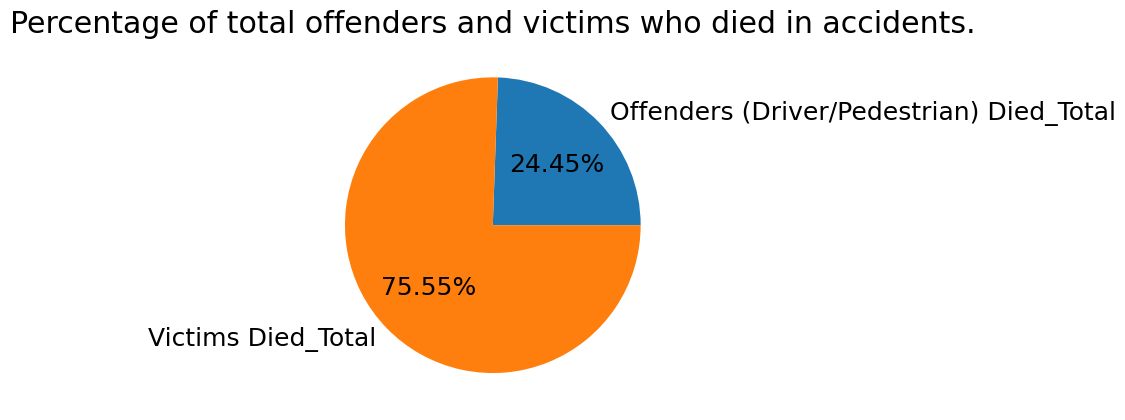

In [229]:
labels='Offenders (Driver/Pedestrian) Died_Total','Victims Died_Total'
sizes=[meanOffTotal, meanVictTotal]
plt.title("Percentage of total offenders and victims who died in accidents.")
plt.pie(sizes,labels=labels, autopct='%.2f%%')
plt.show()

This dataset is about the deaths that occured due to the **ignorance for safety accessories like Helmets, Belts** per gender.

In [230]:
df2.head(2)

S. No.          State/ UT  Non-wearing of Helmet - Male  \
0      1     Andhra Pradesh                           459   
1      2  Arunachal Pradesh                            10   

   Non-wearing of Helmet - Female  Non-wearing of Helmet - Total  \
0                              18                            477   
1                               4                             14   

   Non-wearing of seat belt - Male  Non-wearing of seat belt - Female  \
0                              222                                 15   
1                                0                                  0   

   Non-wearing of seat belt - Total  
0                               237  
1                                 0

In [231]:
helmetMale=(np.mean(df2['Non-wearing of Helmet - Male']))
helmetMale

465.72972972972974

In [232]:
helmetFemale=(np.mean(df2['Non-wearing of Helmet - Female']))
helmetFemale

82.10810810810811

In [233]:
labels='Non-wearing of Helmet-Male','Non-wearing of Helmet-Female'
sizes=[helmetMale, helmetFemale]
plt.pie(sizes,labels=labels,autopct='%1.1f%%')
plt.title("Percentage of Deaths occuring due to non-wearing of helmets between male and female.")
plt.show()


This data set shows the number of accidents happening per state from the year 2003 to 2016.


In [234]:
df3=pd.read_excel('accidents03-16.xlsx')
df3.head(2)

States/Uts    2003    2004    2005     2006     2007     2008  \
0     Andhra Pradesh  8616.0  9343.0  9126.0  11378.0  11885.0  12233.0   
1  Arunachal Pradesh    65.0    79.0    63.0     87.0     81.0     90.0   

      2009     2010     2011     2012     2013  2014  2015  2016  
0  12676.0  13932.0  13783.0  13560.0  13175.0  7277  7524  7851  
1    114.0    108.0     96.0     94.0    120.0    92   117   103

In [235]:
df3.tail()

States/Uts     2003     2004     2005     2006      2007      2008  \
32  Daman & Diu     19.0     23.0     21.0     24.0      29.0      29.0   
33        Delhi   1730.0   1846.0   1771.0   2129.0    2081.0    2015.0   
34  Lakshadweep      0.0      0.0      0.0      1.0       0.0       0.0   
35   Puducherry    182.0    176.0    224.0    209.0     242.0     207.0   
36    All India  73589.0  79357.0  83491.0  93917.0  101161.0  106591.0   

        2009      2010      2011      2012      2013    2014    2015    2016  
32      32.0      30.0      33.0      26.0      30.0      15      38      32  
33    2272.0    2104.0    2007.0    1822.0    1778.0    1629    1582    1548  
34       1.0       0.0       0.0       NaN       0.0       0       0       1  
35     214.0     224.0     230.0     178.0     223.0     145     229     235  
36  110993.0  119558.0  121618.0  123093.0  122589.0  125828  131726  136071

In [236]:
df3['States/Uts']

0                Andhra Pradesh
1             Arunachal Pradesh
2                         Assam
3                         Bihar
4                  Chhattisgarh
5                           Goa
6                       Gujarat
7                       Haryana
8              Himachal Pradesh
9               Jammu & Kashmir
10                    Jharkhand
11                    Karnataka
12                       Kerala
13               Madhya Pradesh
14                  Maharashtra
15                      Manipur
16                    Meghalaya
17                      Mizoram
18                     Nagaland
19                       Odisha
20                       Punjab
21                    Rajasthan
22                       Sikkim
23                   Tamil Nadu
24                    Telangana
25                      Tripura
26                  Uttarakhand
27                Uttar Pradesh
28                  West Bengal
29    Andaman & Nicobar Islands
30                   Chandigarh
31      

In [237]:
df8=pd.DataFrame(columns=['Year','Count'])

In [238]:
df8['Year']=df3[df3['States/Uts'] == 'All India'].columns[1:]

In [239]:
df8=df3[df3['States/Uts']=="All India"]
df9=df8.T

In [240]:
df9.to_csv('accidentRate.csv')

<Figure size 2000x1000 with 0 Axes>

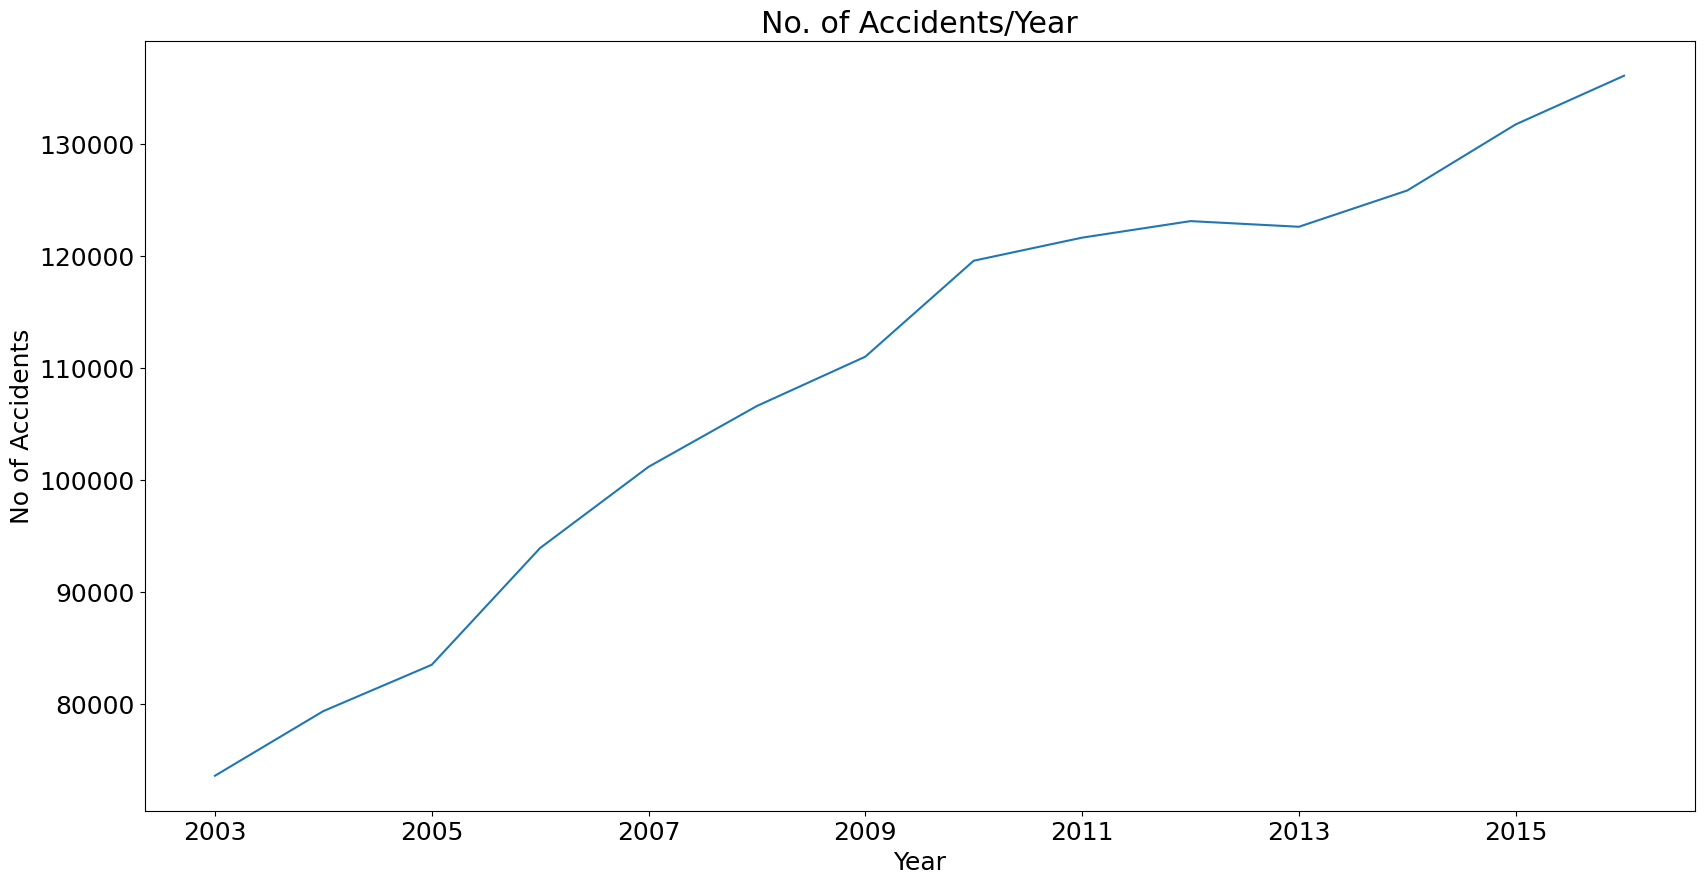

In [241]:
plt.figure(figsize = (20,10))
plt.rcParams.update({'font.size' : 18})
df9.iloc[1:].plot(figsize = (20,10),legend =  False)
plt.xlabel("Year")
plt.ylabel("No of Accidents")
plt.title("No. of Accidents/Year")
plt.show()


This data set contains number of **accidents/deaths/injuries occuring as per number of lanes.**

In [242]:
df4=pd.read_csv('laneAccidents.csv')
df4.head(2)

S.No           State/UT  Single Lane - Accident - 2014  \
0    1     Andhra Pradesh                         8634.0   
1    2  Arunachal Pradesh                           90.0   

   Single Lane - Accident - 2014 per 1L people  Single Lane - Killed - 2014  \
0                                    16.473750                       2958.0   
1                                     6.504173                         60.0   

   Single Lane - Killed - 2014 per 1L people  Single Lane - Injured - 2014  \
0                                   5.643891                       13541.0   
1                                   4.336115                         152.0   

   Single Lane - Injured - 2014 per 1L people  Two Lanes - Accident - 2014  \
0                                   25.836350                      10327.0   
1                                   10.984826                        115.0   

   Two Lanes - Accident - 2014 per 1L people  ...  \
0                                  19.704009  ...   
1                                   8.310888  ...   

   3 Lanes or more w.o Median - Killed - 2014 per 1L people  \
0                                           0.755572          
1                                           0.000000          

   3 Lanes or more w.o Median - Injured - 2014  \
0                                       1199.0   
1                                          0.0   

   3 Lanes or more w.o Median - Injured - 2014 per 1L people  \
0                                           2.287703           
1                                           0.000000           

   4 Lanes with Median - Accident - 2014  \
0                                 4291.0   
1                                    0.0   

   4 Lanes with Median - Accident - 2014 per 1L people  \
0                                           8.187267     
1                                           0.000000     

   4 Lanes with Median - Killed - 2014  \
0                               1560.0   
1                                  0.0   

   4 Lanes with Median - Killed - 2014 per 1L people  \
0                                           2.976494   
1                                           0.000000   

   4 Lanes with Median - Injured - 2014  \
0                                5069.0   
1                                   0.0   

   4 Lanes with Median - Injured - 2014 per 1L people  Population  
0                                           9.671698     52410653  
1                                           0.000000      1383727  

[2 rows x 27 columns]

In [243]:
df4.dtypes

S.No                                                           object
State/UT                                                       object
Single Lane - Accident - 2014                                 float64
Single Lane - Accident - 2014 per 1L people                   float64
Single Lane - Killed - 2014                                   float64
Single Lane - Killed - 2014 per 1L people                     float64
Single Lane - Injured - 2014                                  float64
Single Lane - Injured - 2014 per 1L people                    float64
Two Lanes - Accident - 2014                                   float64
Two Lanes - Accident - 2014 per 1L people                     float64
Two Lanes - Killed - 2014                                     float64
Two Lanes - Killed - 2014 per 1L people                       float64
Two Lanes - Injured - 2014                                    float64
Two Lanes - Injured - 2014 per 1L people                      float64
3 Lanes or more w.o 

In [244]:
df4.dropna(axis = 0, how ='any', inplace = True)

*Number of **ACCIDENTS** for 1,2,3,4 lanes per 1L population.*

In [245]:
singleLaneAcc=df4['Single Lane - Accident - 2014 per 1L people']

In [246]:
twoLaneAcc=df4['Two Lanes - Accident - 2014 per 1L people']

In [247]:
threeLaneAcc=df4['3 Lanes or more w.o Median - Accident - 2014 per 1L people']

In [248]:
fourLaneAcc=df4['4 Lanes with Median - Accident - 2014 per 1L people']

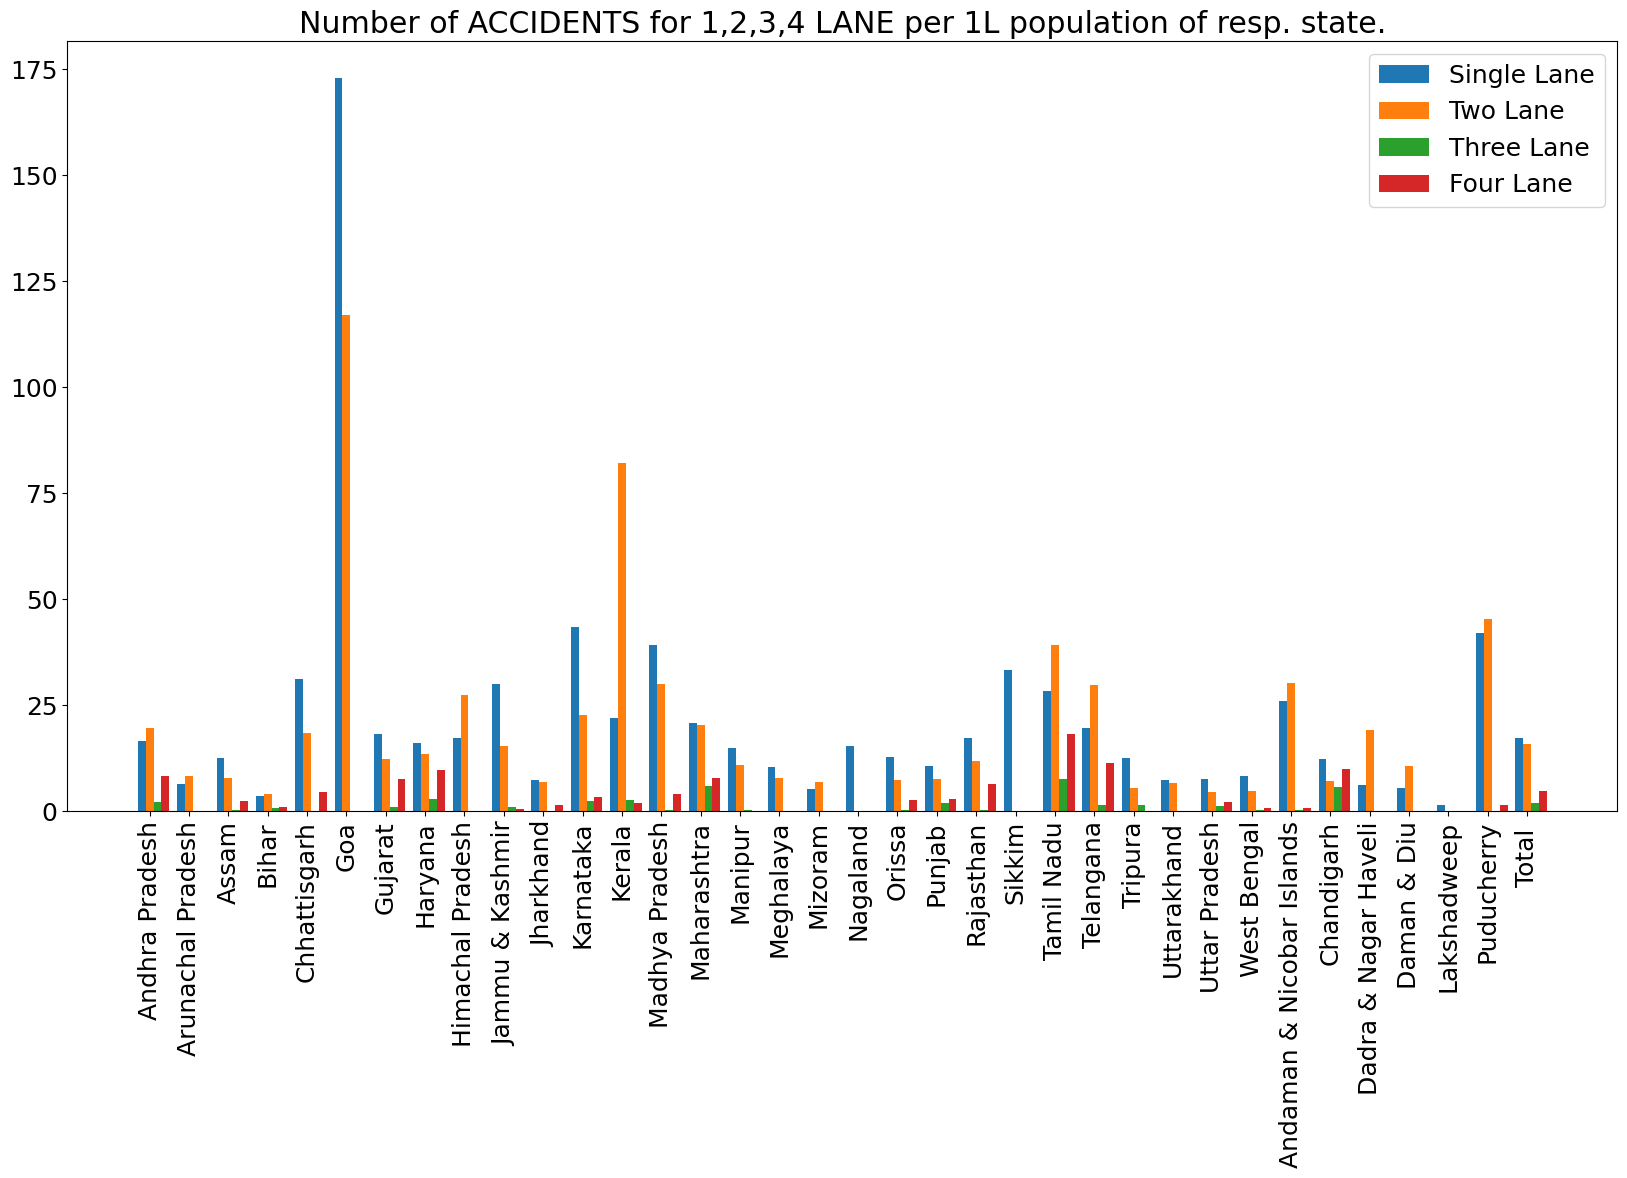

In [249]:
plt.figure(figsize = (20,10))
plt.rcParams.update({'font.size':18})
UT = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36])
plt.bar(UT-0.2, singleLaneAcc, label='Single Lane', width = 0.2,align = 'center')
plt.bar(UT, twoLaneAcc, label = 'Two Lane', width = 0.2,align = 'center')
plt.bar(UT+0.2, threeLaneAcc, label = 'Three Lane', width = 0.2,align = 'center')
plt.bar(UT+0.4, fourLaneAcc, label = 'Four Lane', width =0.2,align = 'center')
plt.xticks(UT, df4['State/UT'], rotation = 'vertical' )
plt.legend(loc = 'best')
plt.title("Number of ACCIDENTS for 1,2,3,4 LANE per 1L population of resp. state.")
plt.show()

*Number of people **INJURED** for 1,2,3,4 number of lanes per 1L population.*


In [250]:
singleInjured=df4['Single Lane - Injured - 2014 per 1L people']

In [251]:
twoInjured=df4['Two Lanes - Injured - 2014 per 1L people']

In [252]:
threeInjured=df4['3 Lanes or more w.o Median - Injured - 2014 per 1L people']

In [253]:
fourInjured=df4['4 Lanes with Median - Injured - 2014 per 1L people']

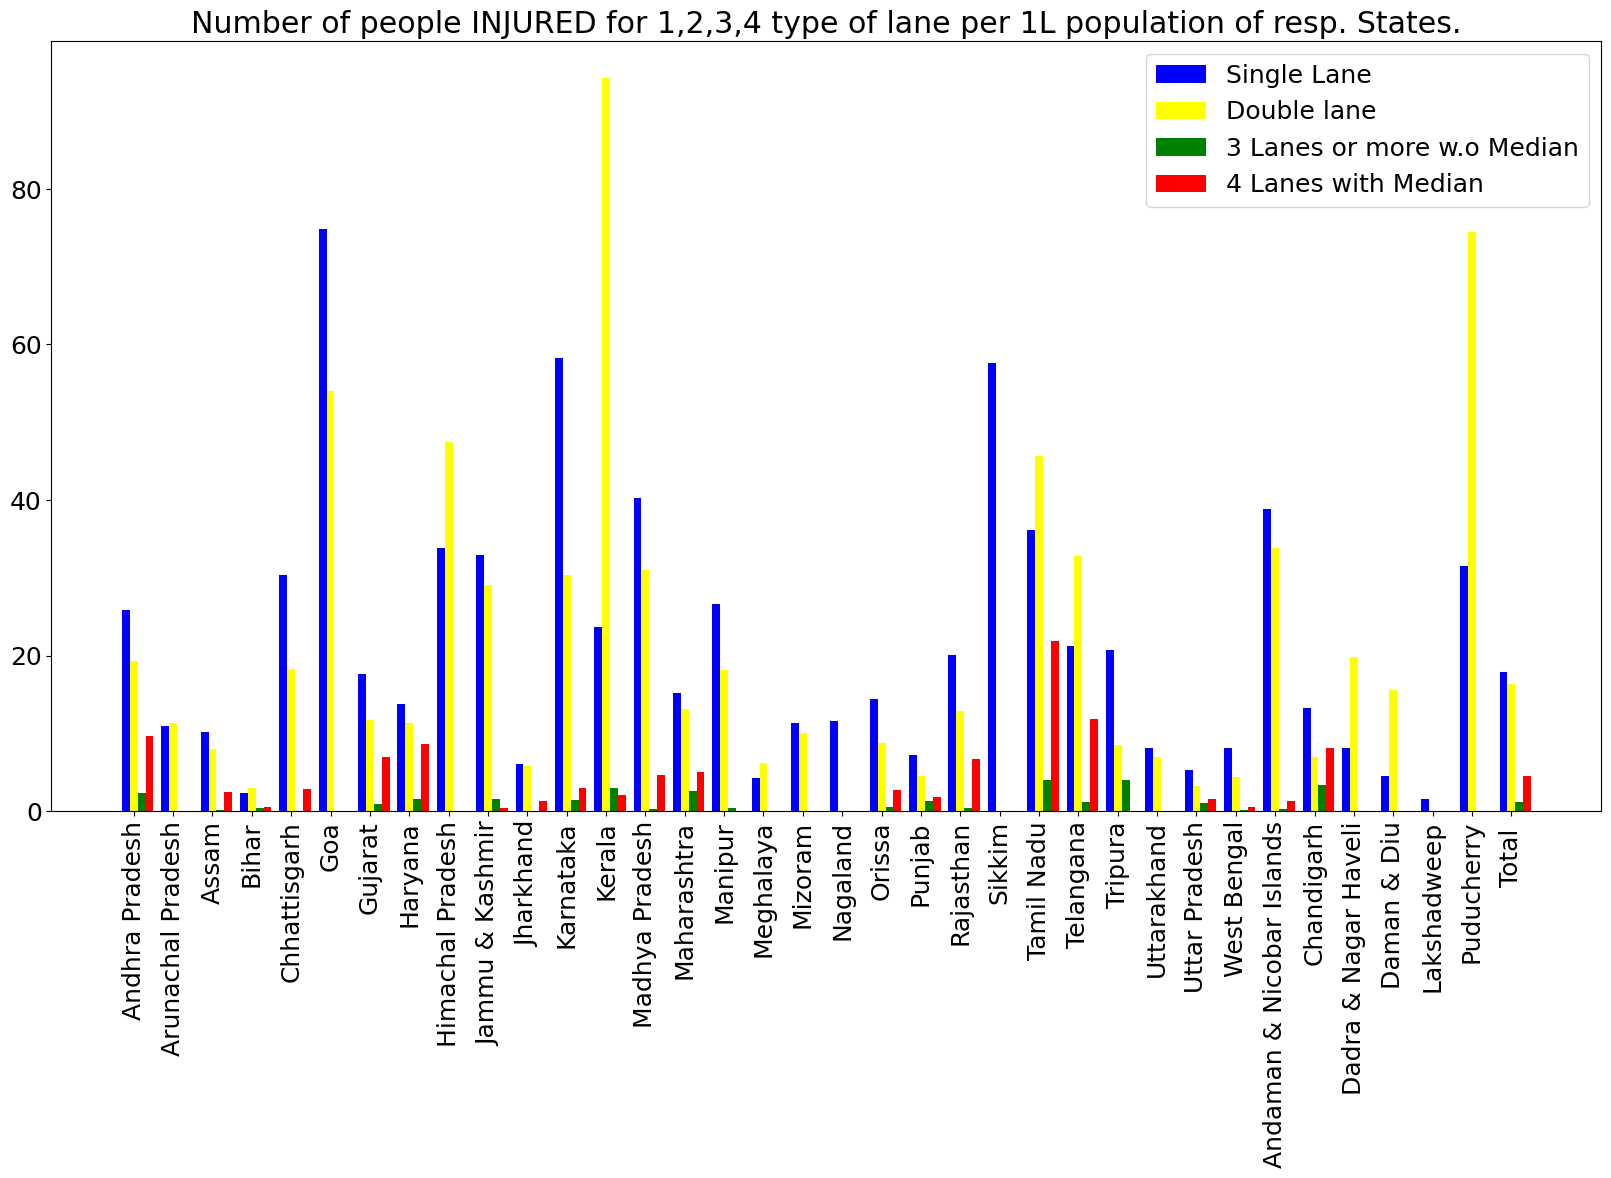

In [254]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':18})
plt.bar(UT-0.2, singleInjured, width=0.2, color='b',align='center',label='Single Lane')
plt.bar(UT, twoInjured, width=0.2, color='yellow',align='center',label='Double lane')
plt.bar(UT+0.2, threeInjured, width=0.2, color='g',align='center',label='3 Lanes or more w.o Median')
plt.bar(UT+0.4, fourInjured, width=0.2, color='red',align='center',label='4 Lanes with Median')
plt.xticks(UT, df4['State/UT'], rotation='vertical')
plt.title("Number of people INJURED for 1,2,3,4 type of lane per 1L population of resp. States.")
plt.legend(loc = "best")
plt.show()

*Number of people **KILLED** for 1,2,3,4 Lanes per 1L  population.*

In [255]:
singleLaneKilled=df4['Single Lane - Killed - 2014 per 1L people']

In [256]:
twoLaneKilled=df4['Two Lanes - Killed - 2014 per 1L people']

In [257]:
threeLaneKilled=df4['3 Lanes or more w.o Median - Killed - 2014 per 1L people']

In [258]:
fourLaneKilled=df4['4 Lanes with Median - Killed - 2014 per 1L people']

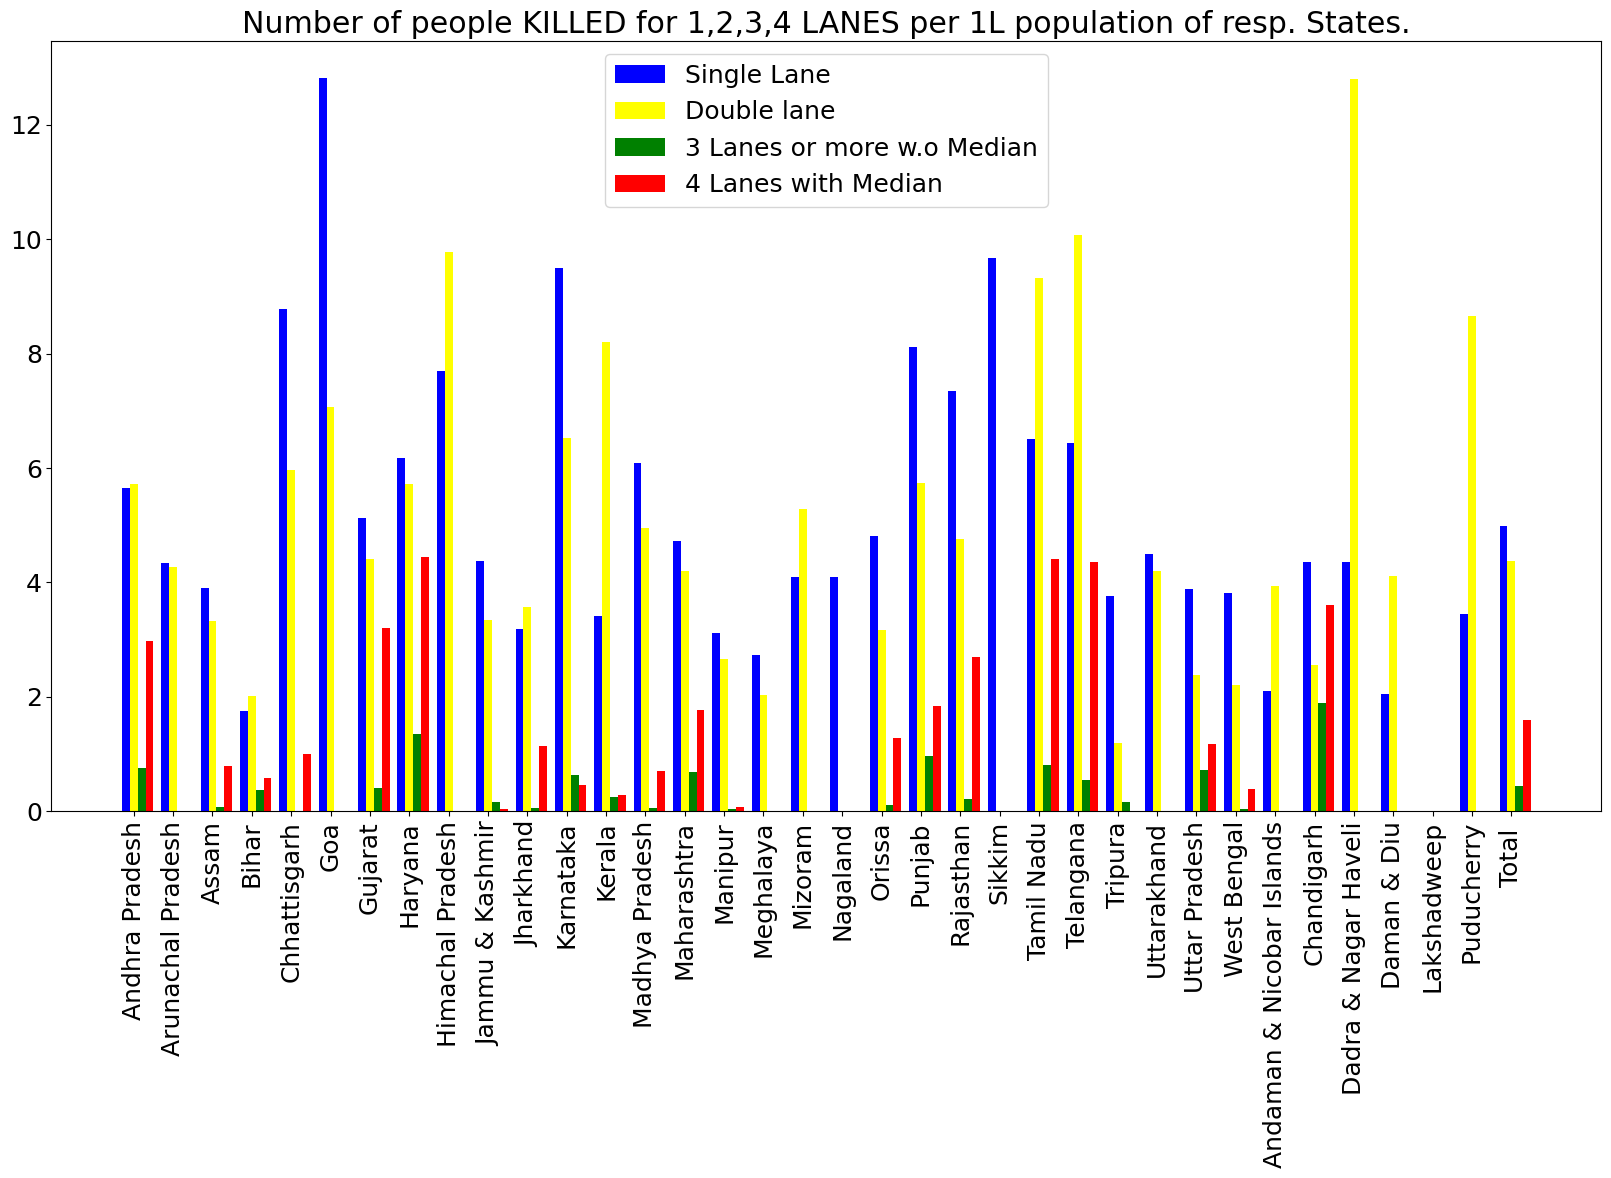

In [259]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':18})
plt.bar(UT-0.2, singleLaneKilled, width=0.2, color='b', align='center',label='Single Lane')
plt.bar(UT, twoLaneKilled, width=0.2, color='yellow', align='center',label='Double lane')
plt.bar(UT+0.2, threeLaneKilled, width=0.2, color='g',align='center',label='3 Lanes or more w.o Median')
plt.bar(UT+0.4, fourLaneKilled, width=0.2, color='red',align='center',label='4 Lanes with Median')
plt.xticks(UT, df4['State/UT'], rotation='vertical')
plt.title("Number of people KILLED for 1,2,3,4 LANES per 1L population of resp. States.")
plt.legend(loc = "best")
plt.show()

*Number of accidents, people injured, killed on **SINGLE LANE** per 1L population.*

In [260]:
singleLaneTotalInjured=df4['Single Lane - Injured - 2014 per 1L people']

In [261]:
singleLaneTotalKilled=df4['Single Lane - Killed - 2014 per 1L people']

In [262]:
singleLaneTotalAccidents=df4['Single Lane - Accident - 2014 per 1L people']

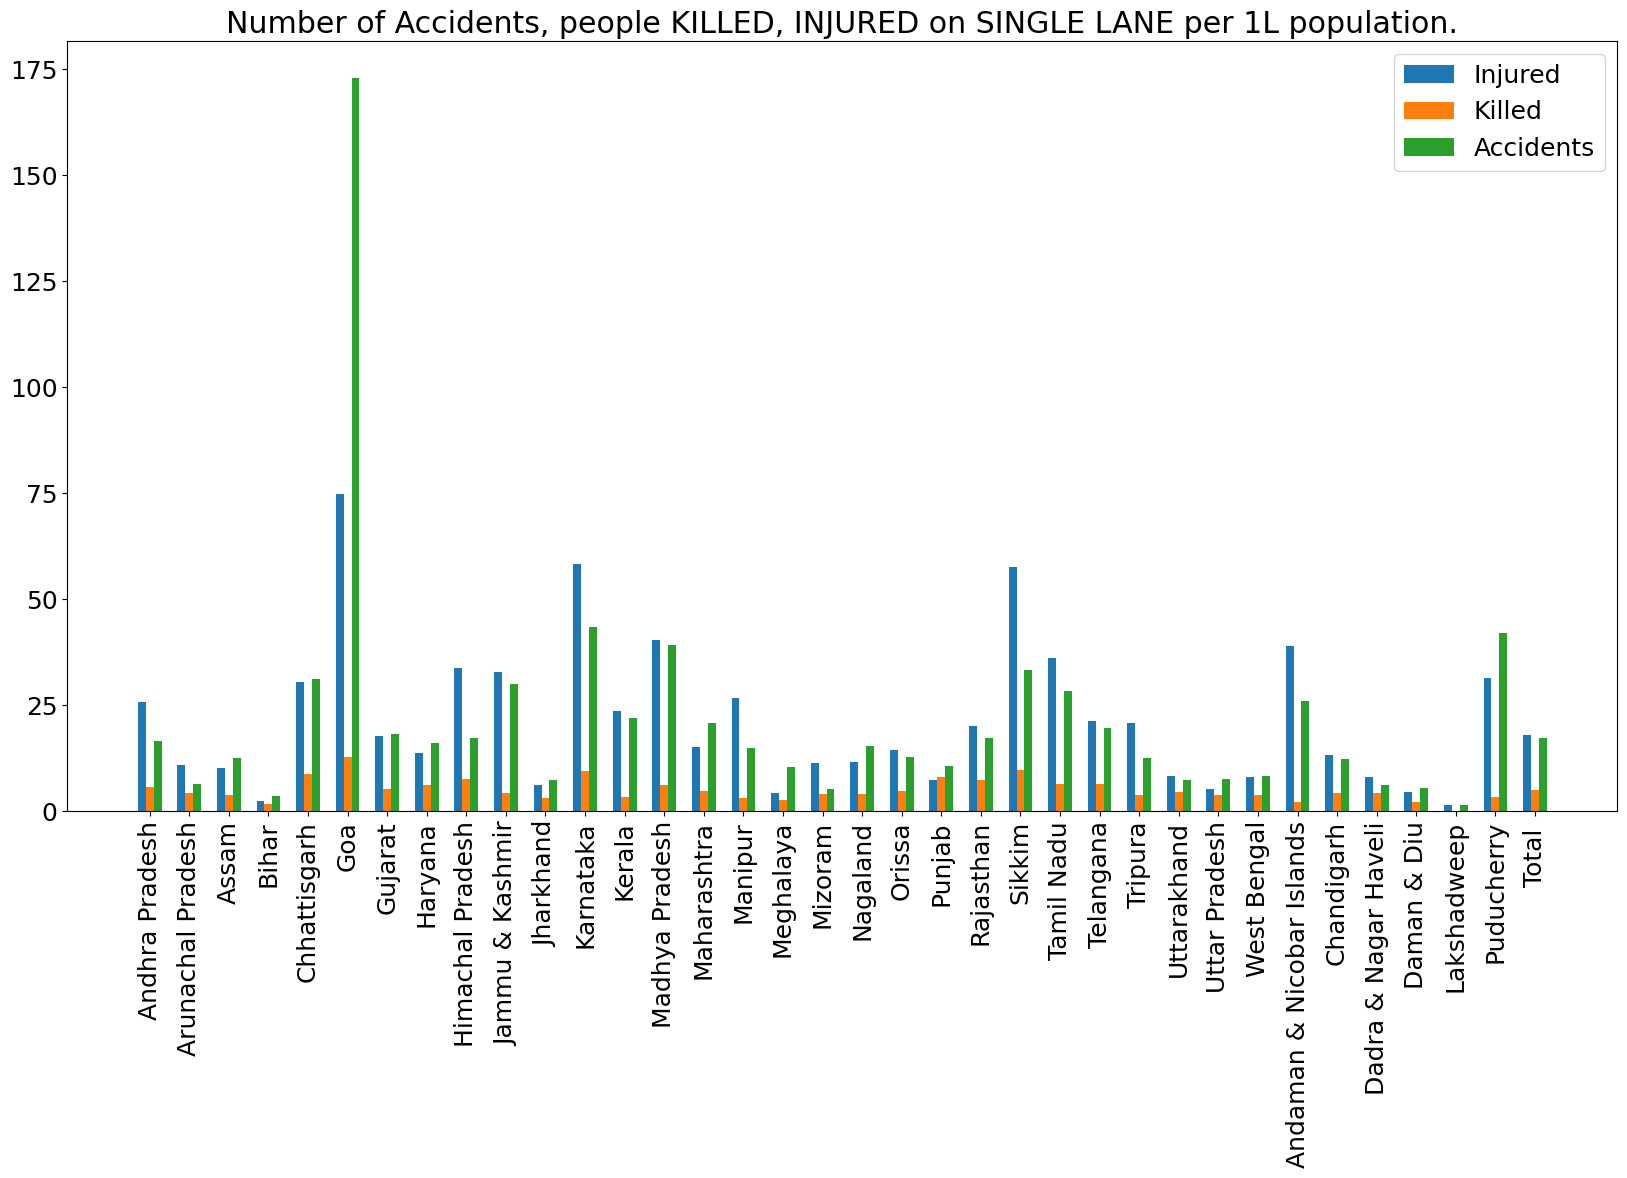

In [263]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':18})
plt.bar(UT-0.2, singleLaneTotalInjured, width=0.2, align='center', label='Injured')
plt.bar(UT, singleLaneTotalKilled, width=0.2, align='center', label='Killed')
plt.bar(UT+0.2, singleLaneTotalAccidents, width=0.2, align='center', label="Accidents")
plt.xticks(UT, df4['State/UT'], rotation='vertical')
plt.title("Number of Accidents, people KILLED, INJURED on SINGLE LANE per 1L population.")
plt.legend(loc = "best")
plt.show()

*Number of accidents, people injured, killed on **DOUBLE LANE** per 1L population.*

In [264]:
twoLaneTotalInjured = df4['Two Lanes - Injured - 2014 per 1L people']

In [265]:
twoLaneTotalKilled = df4['Two Lanes - Killed - 2014 per 1L people']

In [266]:
twoLaneTotalAccidents = df4['Two Lanes - Accident - 2014 per 1L people']

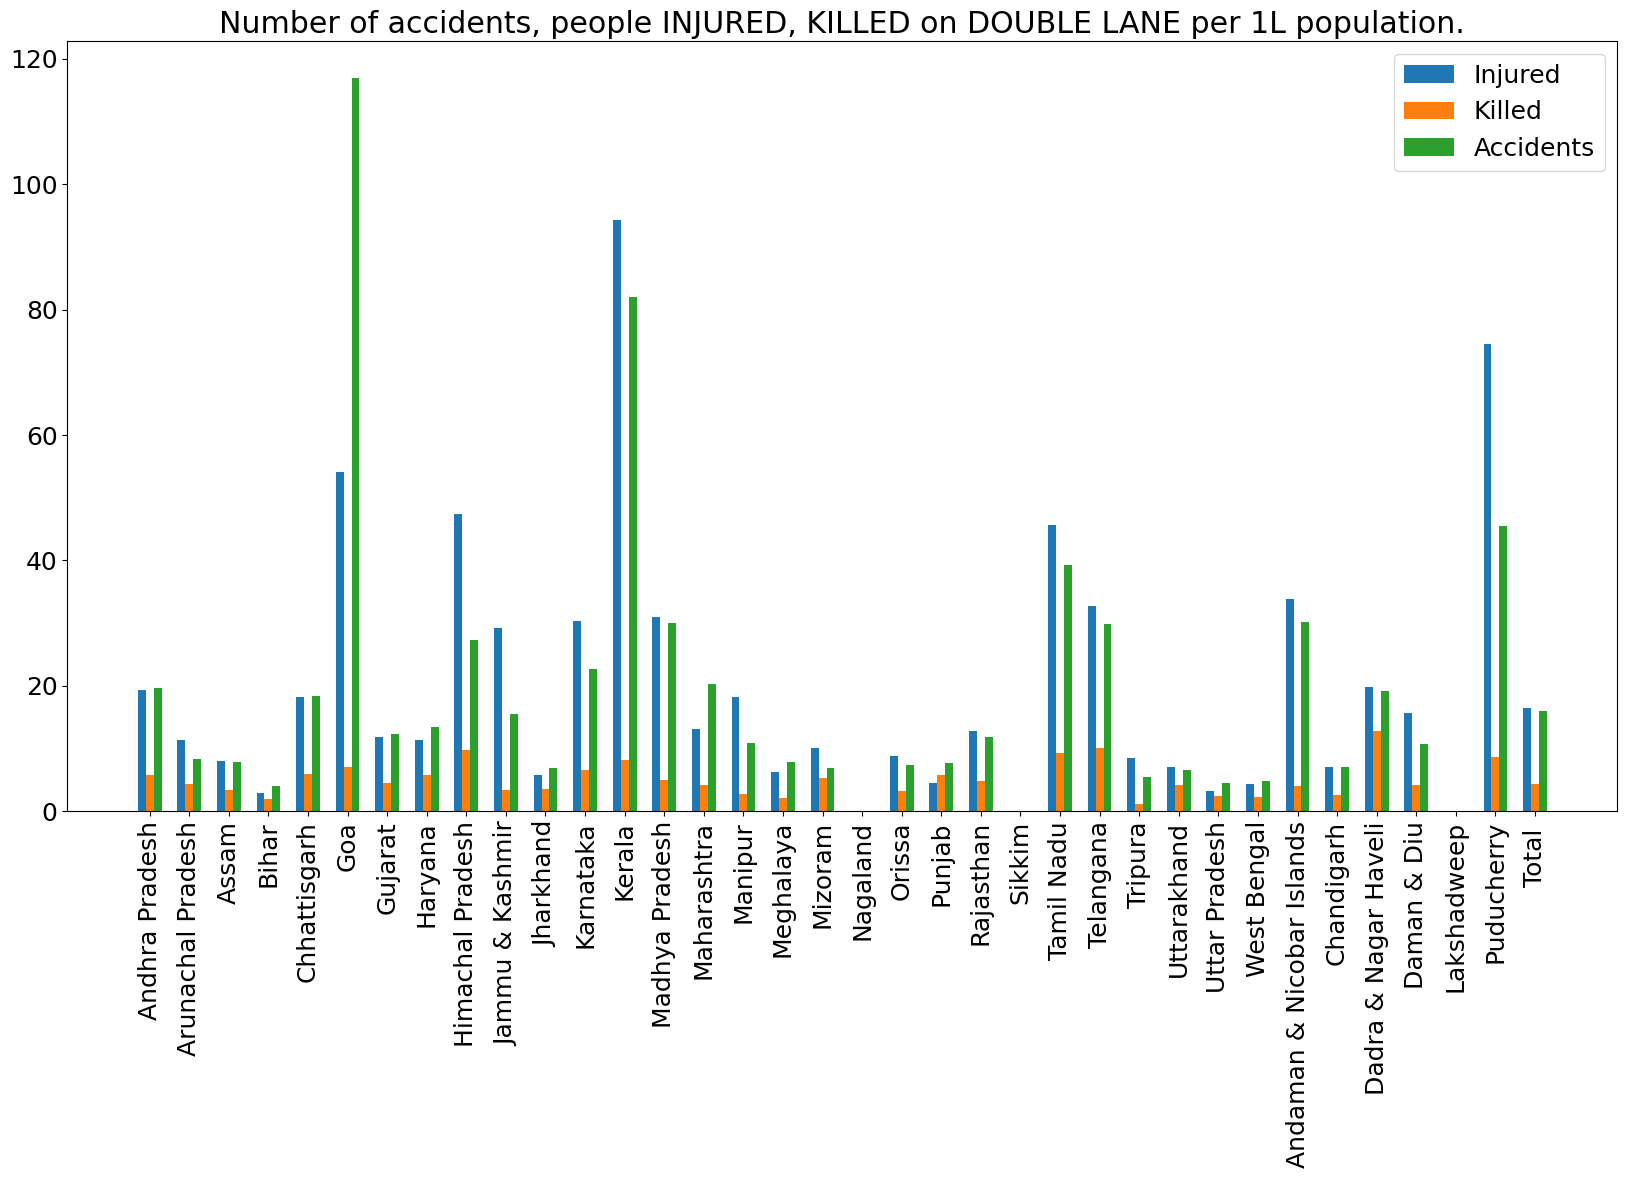

In [267]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':18})
plt.bar(UT-0.2, twoLaneTotalInjured, width=0.2, align='center', label='Injured')
plt.bar(UT, twoLaneTotalKilled, width=0.2, align='center', label='Killed')
plt.bar(UT+0.2, twoLaneTotalAccidents, width=0.2, align='center', label="Accidents")
plt.xticks(UT, df4['State/UT'], rotation='vertical')
plt.title("Number of accidents, people INJURED, KILLED on DOUBLE LANE per 1L population.")
plt.legend(loc = "best")
plt.show()

### *Number of accidents, people injured, killed for **THREE LANE** per 1L population.*

In [268]:
threeLaneTotalInjured=df4['3 Lanes or more w.o Median - Injured - 2014 per 1L people']

In [269]:
threeLaneTotalKilled=df4['3 Lanes or more w.o Median - Killed - 2014 per 1L people']

In [270]:
threeLaneTotalAccidents=df4['3 Lanes or more w.o Median - Accident - 2014 per 1L people']

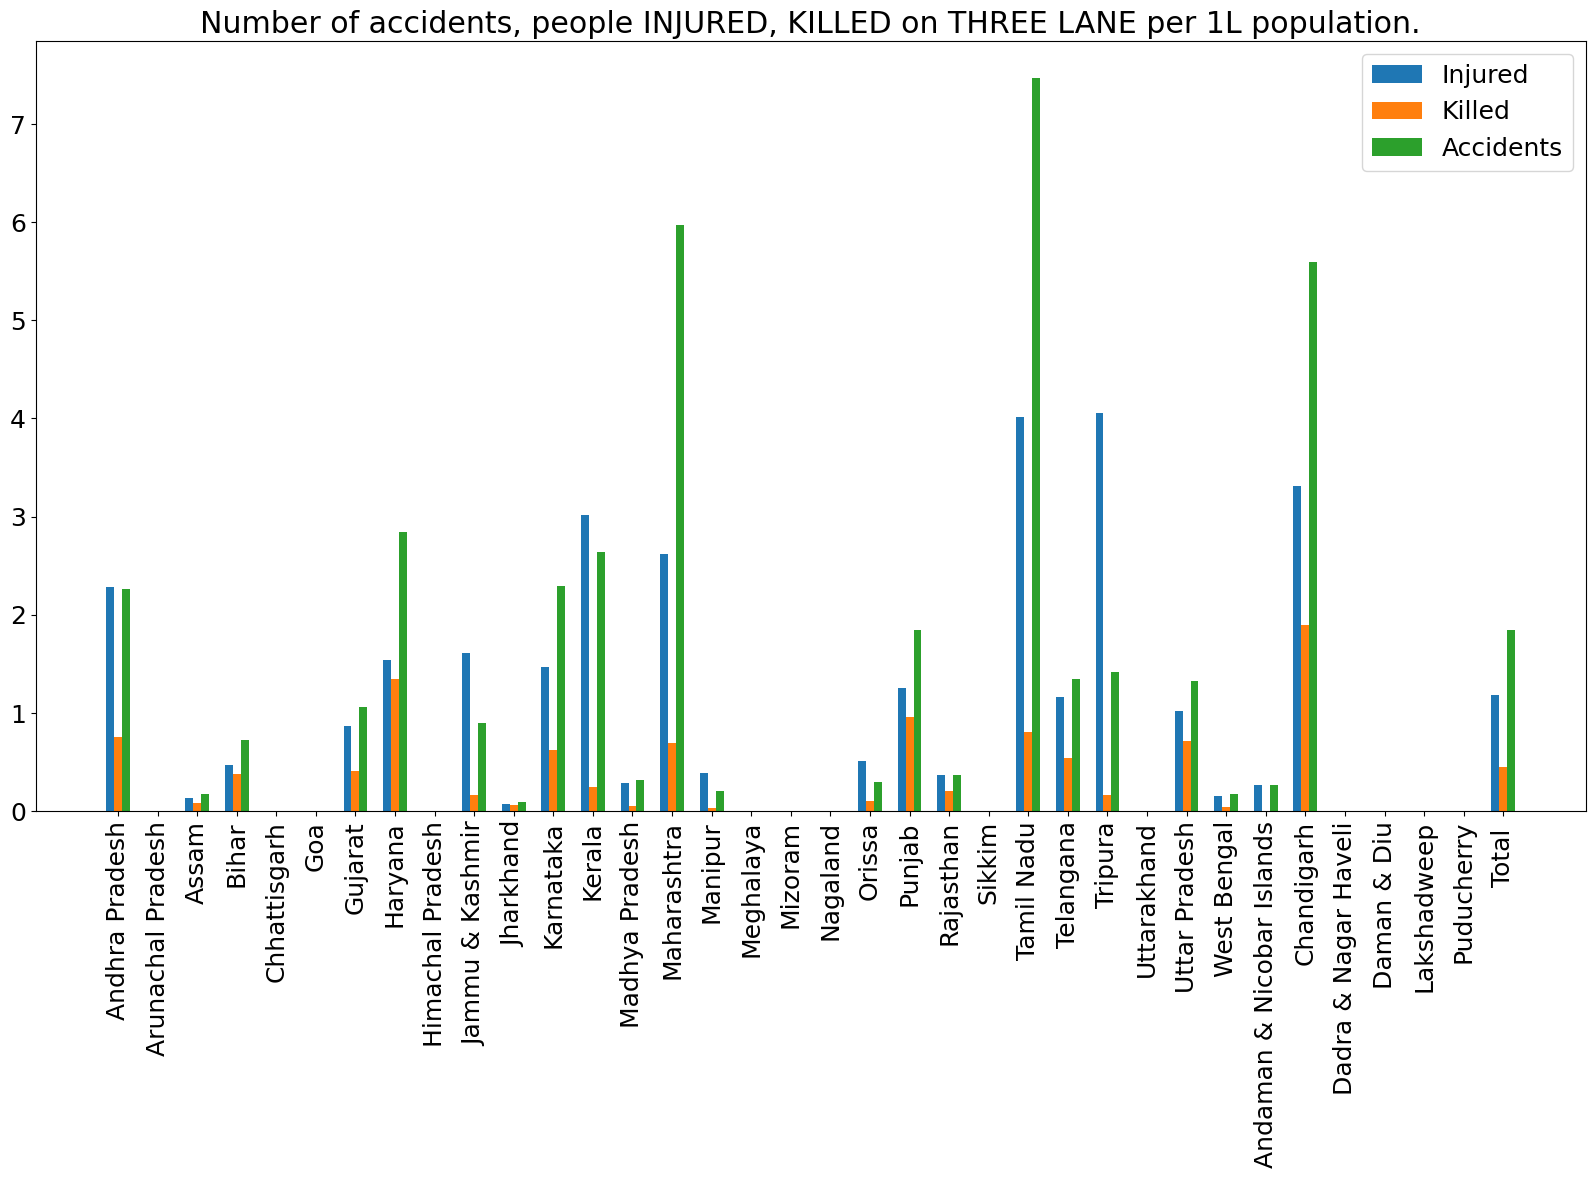

In [271]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':18})
plt.bar(UT-0.2, threeLaneTotalInjured, width=0.2, align='center', label='Injured')
plt.bar(UT, threeLaneTotalKilled, width=0.2, align='center', label='Killed')
plt.bar(UT+0.2, threeLaneTotalAccidents, width=0.2, align='center', label="Accidents")
plt.xticks(UT, df4['State/UT'], rotation='vertical')
plt.title("Number of accidents, people INJURED, KILLED on THREE LANE per 1L population.")
plt.legend(loc = "best")
plt.show()

### *Number of accidents, people INJURED, KILLED on **FOUR LANE** per 1L population.*

In [272]:
fourLaneTotalInjured=df4['4 Lanes with Median - Injured - 2014 per 1L people']

In [273]:
fourLaneTotalKilled=df4['4 Lanes with Median - Killed - 2014 per 1L people']

In [274]:
fourLaneTotalAccidents=df4['4 Lanes with Median - Accident - 2014 per 1L people']

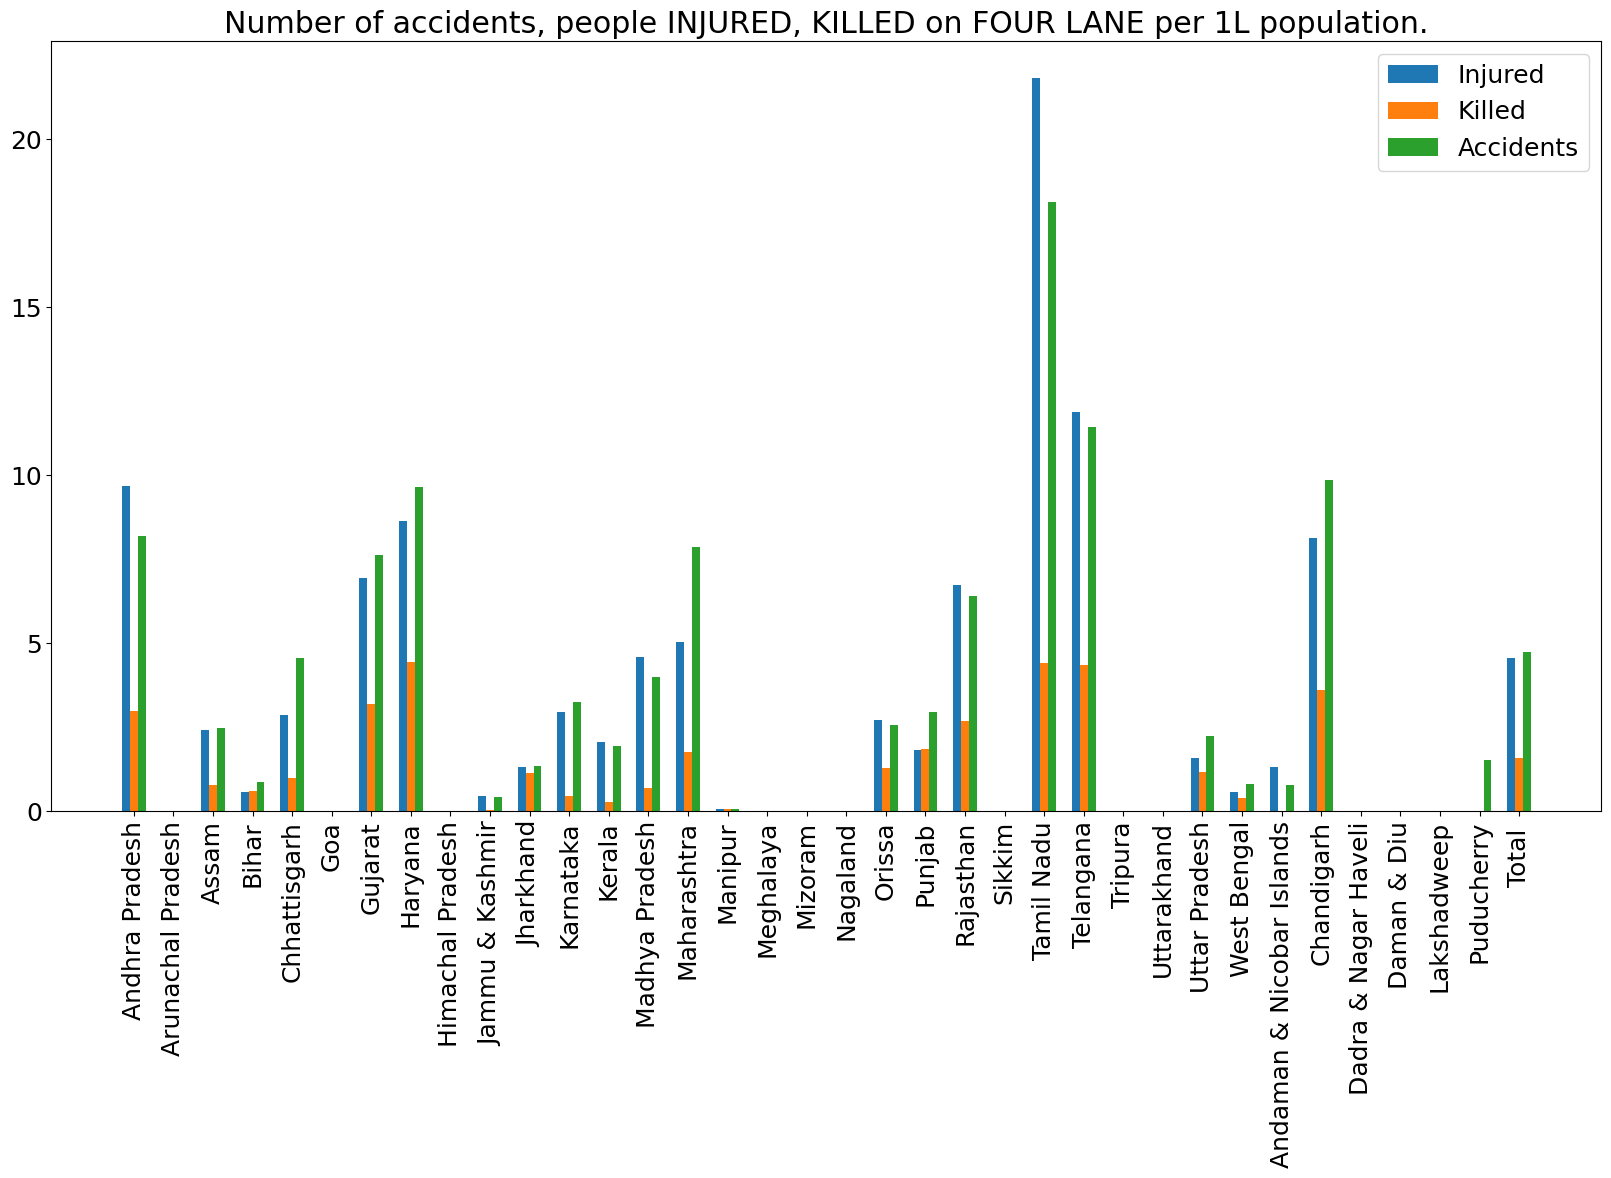

In [275]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':18})
plt.bar(UT-0.2, fourLaneTotalInjured, width=0.2, align='center', label='Injured')
plt.bar(UT, fourLaneTotalKilled, width=0.2, align='center', label='Killed')
plt.bar(UT+0.2, fourLaneTotalAccidents, width=0.2, align='center', label="Accidents")
plt.xticks(UT, df4['State/UT'], rotation='vertical')
plt.title("Number of accidents, people INJURED, KILLED on FOUR LANE per 1L population.")
plt.legend(loc = "best")
plt.show()

### *Total number of accidents, people INJURED, KILLED **irrespective of lanes** per 1L population per state*

In [276]:
df4['Sum Total Number of Persons Killed - 2014 per 1L people']=df4['Single Lane - Killed - 2014 per 1L people']+df4['Two Lanes - Killed - 2014 per 1L people']+df4['3 Lanes or more w.o Median - Killed - 2014 per 1L people']+df4['4 Lanes with Median - Killed - 2014 per 1L people']
totalKilled = df4['Sum Total Number of Persons Killed - 2014 per 1L people']

In [277]:
df4['Sum Total Number of Persons Injured - 2014 per 1L people']=df4['Single Lane - Injured - 2014 per 1L people']+df4['Two Lanes - Injured - 2014 per 1L people']+df4['3 Lanes or more w.o Median - Injured - 2014 per 1L people']+df4['4 Lanes with Median - Injured - 2014 per 1L people']
totalInjured = df4['Sum Total Number of Persons Injured - 2014 per 1L people']

In [278]:
df4['Sum Total Road Accidents - 2014 per 1L people']=df4['Single Lane - Accident - 2014 per 1L people']+df4['Two Lanes - Accident - 2014 per 1L people']+df4['3 Lanes or more w.o Median - Accident - 2014 per 1L people']+df4['4 Lanes with Median - Accident - 2014 per 1L people']
totalAccidents = df4['Sum Total Road Accidents - 2014 per 1L people']

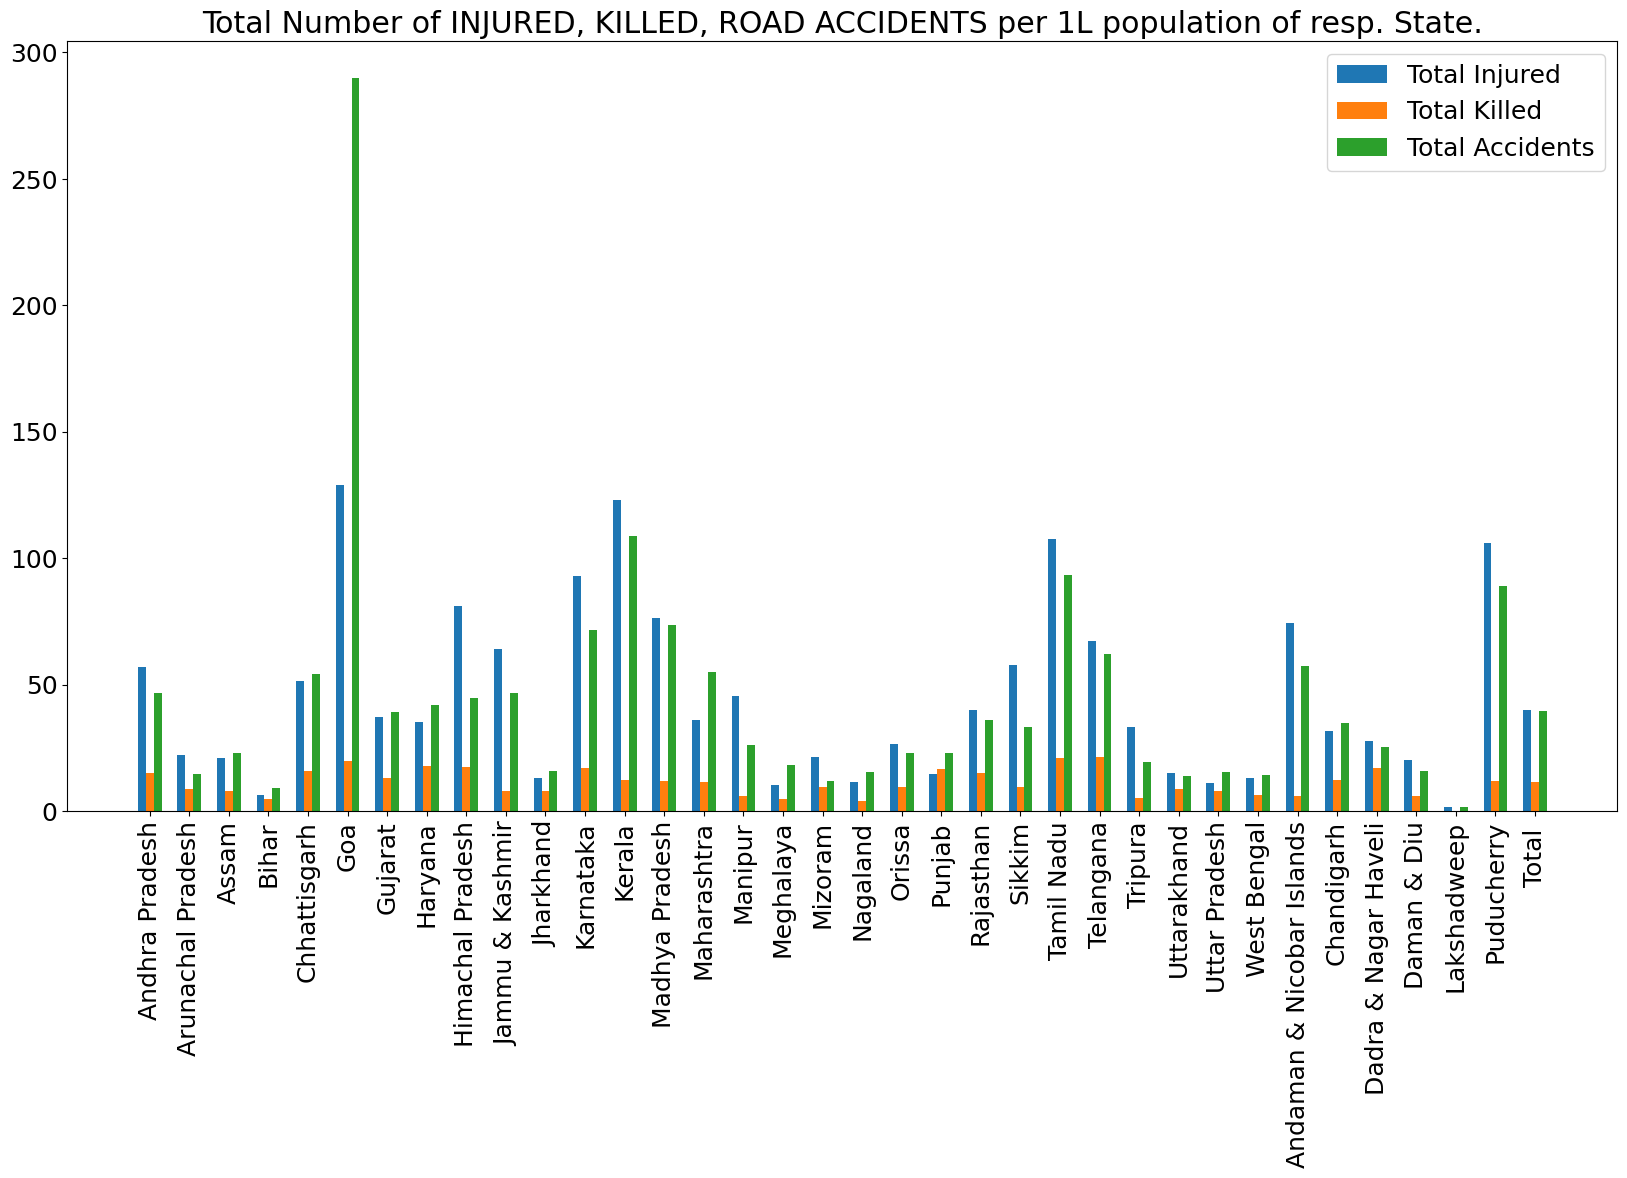

In [279]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':18})
plt.bar(UT-0.2, totalInjured, width=0.2, align='center', label='Total Injured')
plt.bar(UT, totalKilled, width=0.2, align='center', label='Total Killed')
plt.bar(UT+0.2, totalAccidents, width=0.2, align='center', label="Total Accidents")
plt.xticks(UT, df4['State/UT'], rotation='vertical')
plt.title("Total Number of INJURED, KILLED, ROAD ACCIDENTS per 1L population of resp. State.")
plt.legend(loc = "best")
plt.show()

### This dataset shows the count of accidents, deaths, injuries occured due to **various faults and reasons like Fault of Driver, weather condition, boulder, poor light etc.**

In [280]:
df5 = pd.read_csv('reasonOfAccident.csv')
df5.head()

Sl. No         States/UTs  \
0      1     Andhra Pradesh   
1      2  Arunachal Pradesh   
2      3              Assam   
3      4              Bihar   
4      5       Chhattisgarh   

   Fault of Driver-Total No. of Road Accidents - 2014  \
0                                            21359.0    
1                                               30.0    
2                                             6895.0    
3                                             5008.0    
4                                             9108.0    

   Fault of Driver-Total No. of Road Accidents - 2014 per 1L people  \
0                                          40.753165                  
1                                           2.168058                  
2                                          22.095410                  
3                                           4.810784                  
4                                          35.654451                  

   Fault of Driver-Number of Persons-Killed - 2014  \
0                                             6743   
1                                               19   
2                                             2429   
3                                             2646   
4                                             2458   

   Fault of Driver-Number of Persons-Killed - 2014 per 1L people  \
0                                          12.865705               
1                                           1.373103               
2                                           7.783865               
3                                           2.541800               
4                                           9.622161               

   Fault of Driver-Number of Persons-Injured - 2014  \
0                                           26287.0   
1                                              30.0   
2                                            6281.0   
3                                            3374.0   
4                                            8710.0   

   Fault of Driver-Number of Persons-Injured - 2014 per 1L people  \
0                                          50.155834                
1                                           2.168058                
2                                          20.127813                
3                                           3.241131                
4                                          34.096428                

   Fault of Driver of other vehicles-Total No. of Road Accidents - 2014  \
0                                              288.0                      
1                                               20.0                      
2                                                2.0                      
3                                              608.0                      
4                                              726.0                      

   Fault of Driver of other vehicles-Total No. of Road Accidents - 2014 per 1L people  \
0                                           0.549507                                    
1                                           1.445372                                    
2                                           0.006409                                    
3                                           0.584057                                    
4                                           2.842021                                    

   ...  Falling of boulders-Number of Persons-Killed - 2014 per 1L people  \
0  ...                                           0.001908                   
1  ...                                           0.000000                   
2  ...                                           0.000000                   
3  ...                                           0.042267                   
4  ...                                           0.027402                   

   Falling of boulders-Number of Persons-Injured - 2014  \
0                                               12.0     

In [281]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 63 columns):
 #   Column                                                                                 Non-Null Count  Dtype  
---  ------                                                                                 --------------  -----  
 0   Sl. No                                                                                 37 non-null     object 
 1   States/UTs                                                                             37 non-null     object 
 2   Fault of Driver-Total No. of Road Accidents - 2014                                     36 non-null     float64
 3   Fault of Driver-Total No. of Road Accidents - 2014 per 1L people                       36 non-null     float64
 4   Fault of Driver-Number of Persons-Killed - 2014                                        37 non-null     int64  
 5   Fault of Driver-Number of Persons-Killed - 2014 per 1L people                   

In [282]:
driverFault = df5['Fault of Driver-Number of Persons-Killed - 2014 per 1L people']
otherDriversFault = df5['Fault of Driver of other vehicles-Number of Persons-Killed - 2014 per 1L people']
pedestrianFault = df5['Fault of Pedestrian-Number of Persons-Killed - 2014 per 1L people']
conditionOfVehicleFault = df5['Defect in Condition of Motor Vehicle-Number of Persons-Killed - 2014 per 1L people']
roadConditionFault = df5['Defect in Road Condition-Number of Persons-Killed - 2014 per 1L people']
weatherConditionFault = df5['Weather Condition-Number of Persons-Killed - 2014 per 1L people']
passengerFault = df5['Fault of Passenger-Number of Persons-Killed - 2014 per 1L people']
poorLightFault = df5['Poor light-Number of Persons-Killed - 2014 per 1L people']
bouldersFault = df5['Falling of boulders-Number of Persons-Killed - 2014 per 1L people']
otherCauses = df5['Other causes/causes not known-Number of Persons-Killed - 2014 per 1L people']

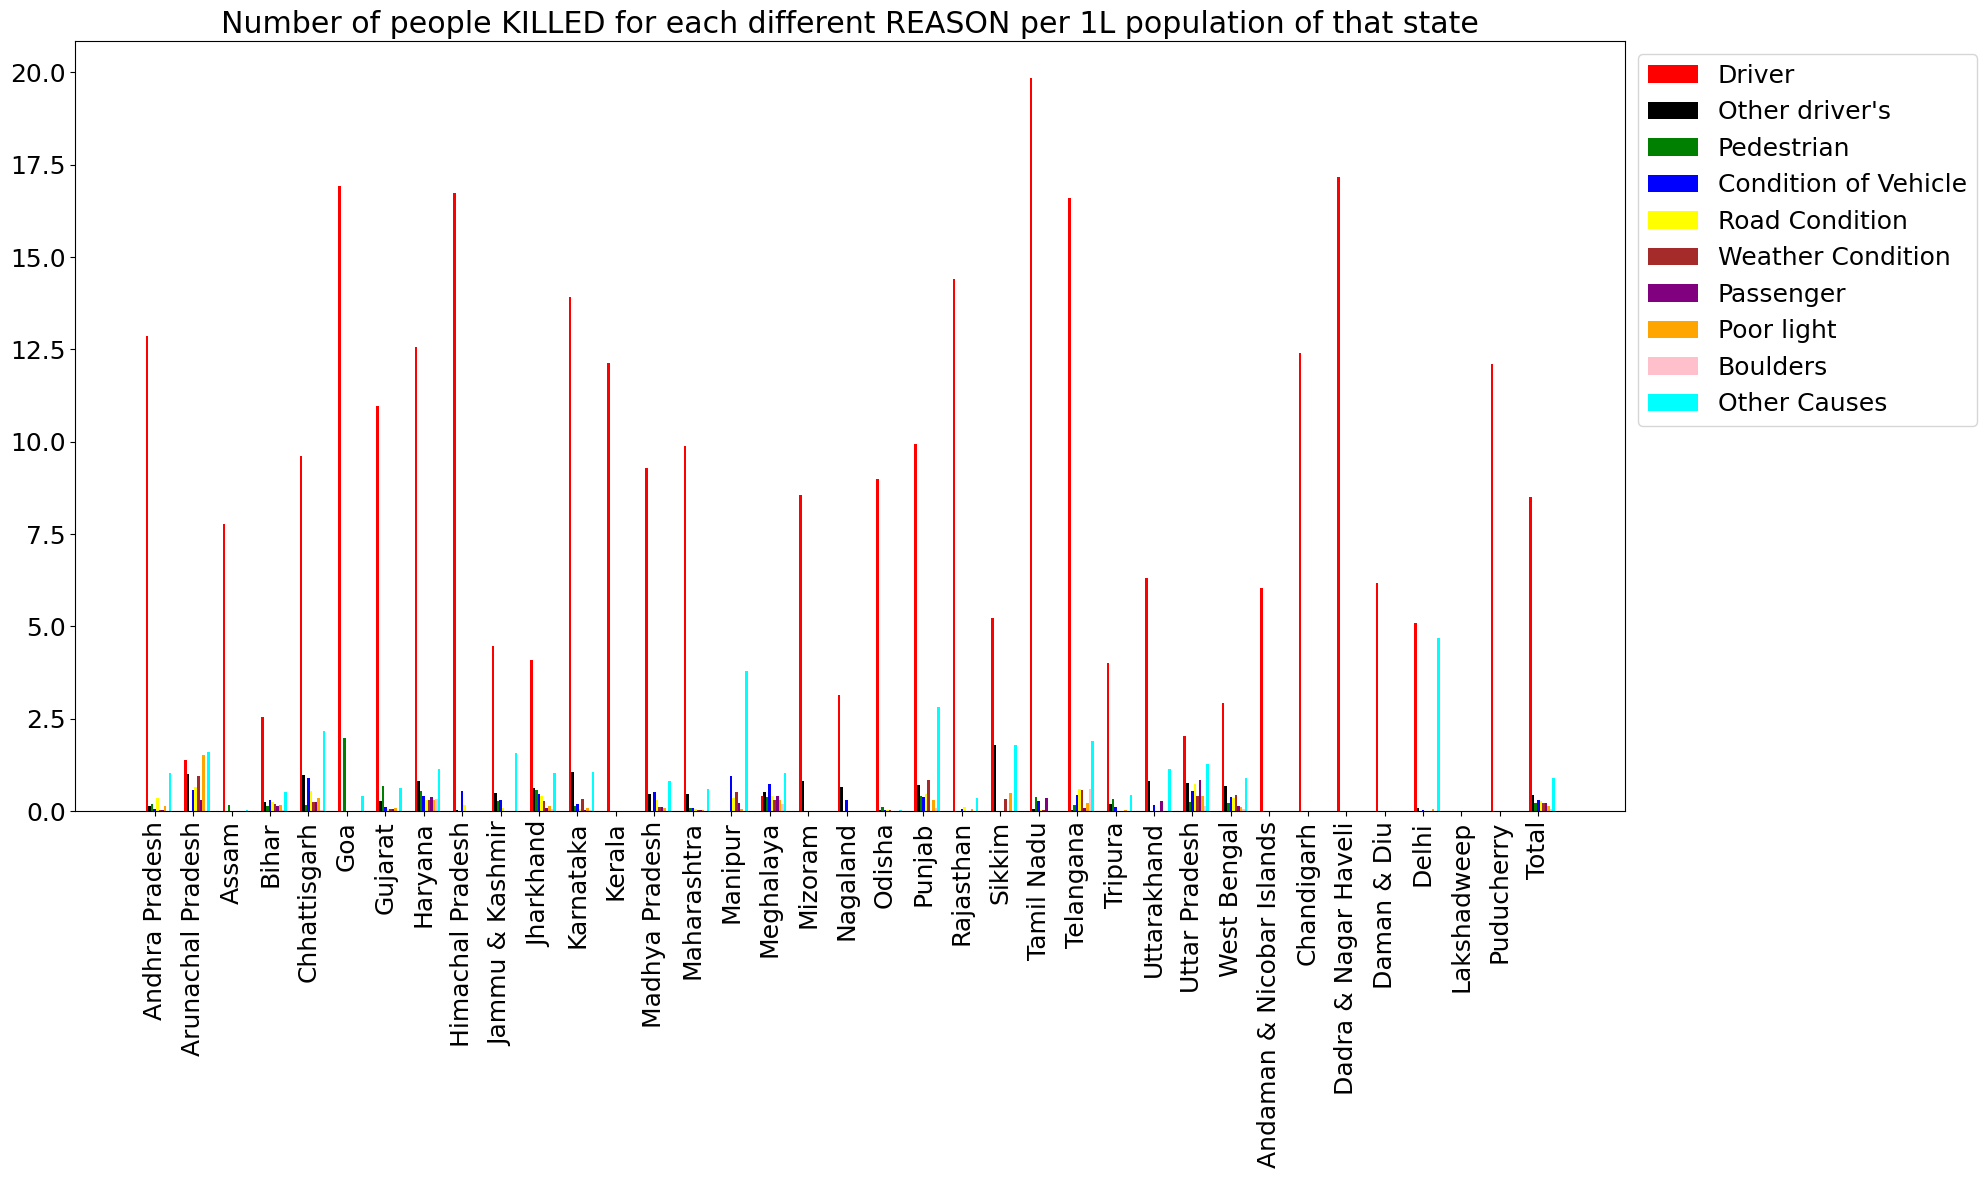

In [283]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':18})
UT=np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37])
UT=UT*3
plt.bar(UT-0.6, driverFault, width = 0.2, color = 'r', align = 'center', label = 'Driver')
plt.bar(UT-0.4, otherDriversFault,width=0.2, color='black', align='center', label='Other driver\'s')
plt.bar(UT-0.2, pedestrianFault,width=0.2, color='g', align='center', label='Pedestrian')
plt.bar(UT, conditionOfVehicleFault,width=0.2, color='b', align='center', label='Condition of Vehicle')
plt.bar(UT+0.2, roadConditionFault,width=0.2, color='yellow', align='center', label='Road Condition')
plt.bar(UT+0.4, weatherConditionFault,width=0.2, color='brown', align='center', label='Weather Condition')
plt.bar(UT+0.6, passengerFault,width=0.2, color='purple', align='center', label='Passenger')
plt.bar(UT+0.8, poorLightFault,width=0.2, color='orange', align='center', label='Poor light')
plt.bar(UT+1.0, bouldersFault,width=0.2, color='pink', align='center', label='Boulders')
plt.bar(UT+1.2, otherCauses,width=0.2, color='cyan', align='center', label='Other Causes')
plt.xticks(UT,df['States/UTs'],rotation='vertical')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.title("Number of people KILLED for each different REASON per 1L population of that state")
plt.show()

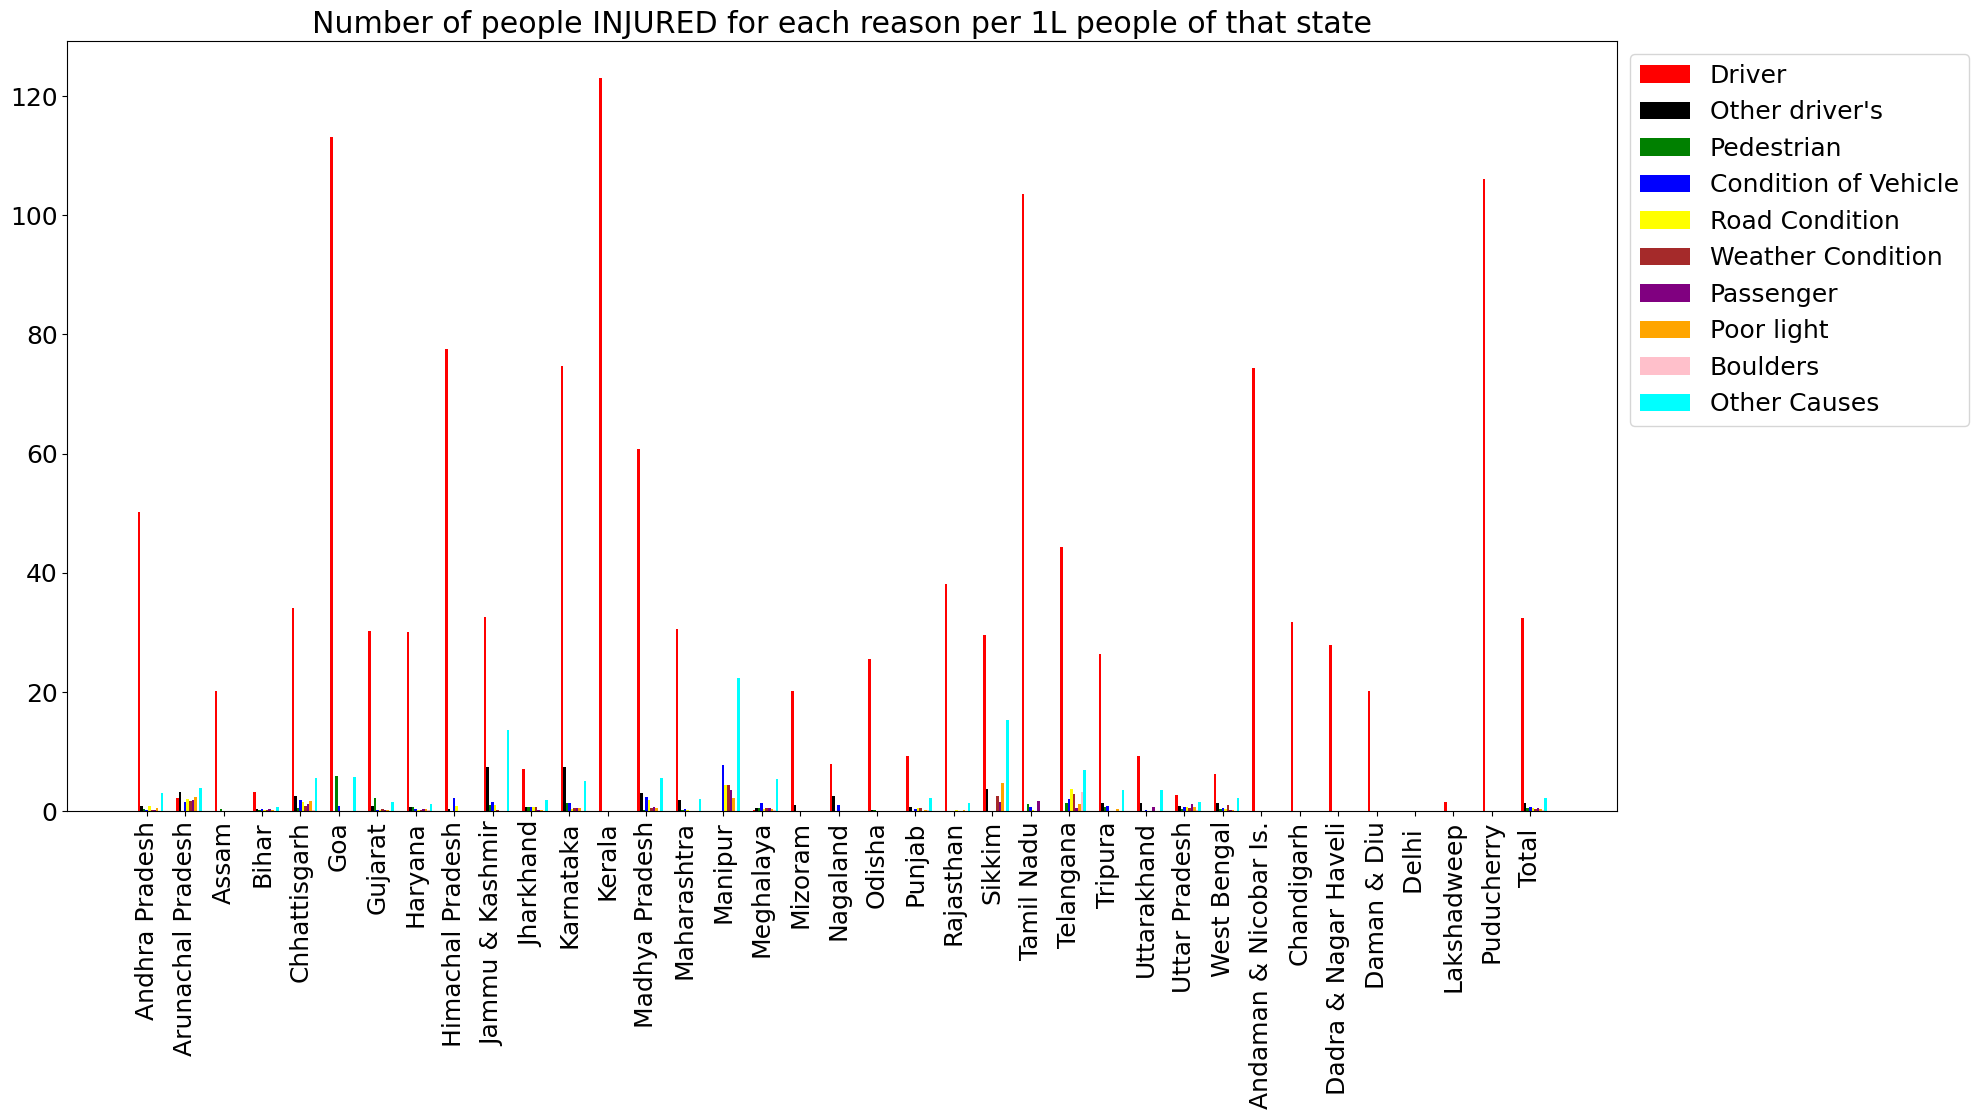

In [284]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':18})
plt.bar(UT-0.6, df5['Fault of Driver-Number of Persons-Injured - 2014 per 1L people'], width=0.2,color='r',align='center',label='Driver')
plt.bar(UT-0.4, df5['Fault of Driver of other vehicles-Number of Persons-Injured - 2014 per 1L people'], width=0.2,color='black',align='center',label='Other driver\'s')
plt.bar(UT-0.2, df5['Fault of Pedestrian-Number of Persons-Injured - 2014 per 1L people'], width=0.2,color='g',align='center',label='Pedestrian')
plt.bar(UT, df5['Defect in Condition of Motor Vehicle-Number of Persons-Injured - 2014 per 1L people'], width=0.2,color='b',align='center',label='Condition of Vehicle')
plt.bar(UT+0.2, df5['Defect in Road Condition-Number of Persons-Injured - 2014 per 1L people'], width=0.2,color='yellow',align='center',label='Road Condition')
plt.bar(UT+0.4, df5['Weather Condition-Number of Persons-Injured - 2014 per 1L people'], width=0.2,color='brown',align='center',label='Weather Condition')
plt.bar(UT+0.6, df5['Fault of Passenger-Number of Persons-Injured - 2014 per 1L people'], width=0.2,color='purple',align='center',label='Passenger')
plt.bar(UT+0.8, df5['Poor light-Number of Persons-Injured - 2014 per 1L people'], width=0.2, color='orange',align='center',label='Poor light')
plt.bar(UT+1.0, df5['Falling of boulders-Number of Persons-Injured - 2014 per 1L people'], width=0.2,color='pink',align='center',label='Boulders')
plt.bar(UT+1.2, df5['Other causes/causes not known-Number of Persons-Injured - 2014 per 1L people'], width=0.2,color='cyan',align='center',label='Other Causes')
plt.xticks(UT,df5['States/UTs'],rotation='vertical')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.title("Number of people INJURED for each reason per 1L people of that state")
plt.show()

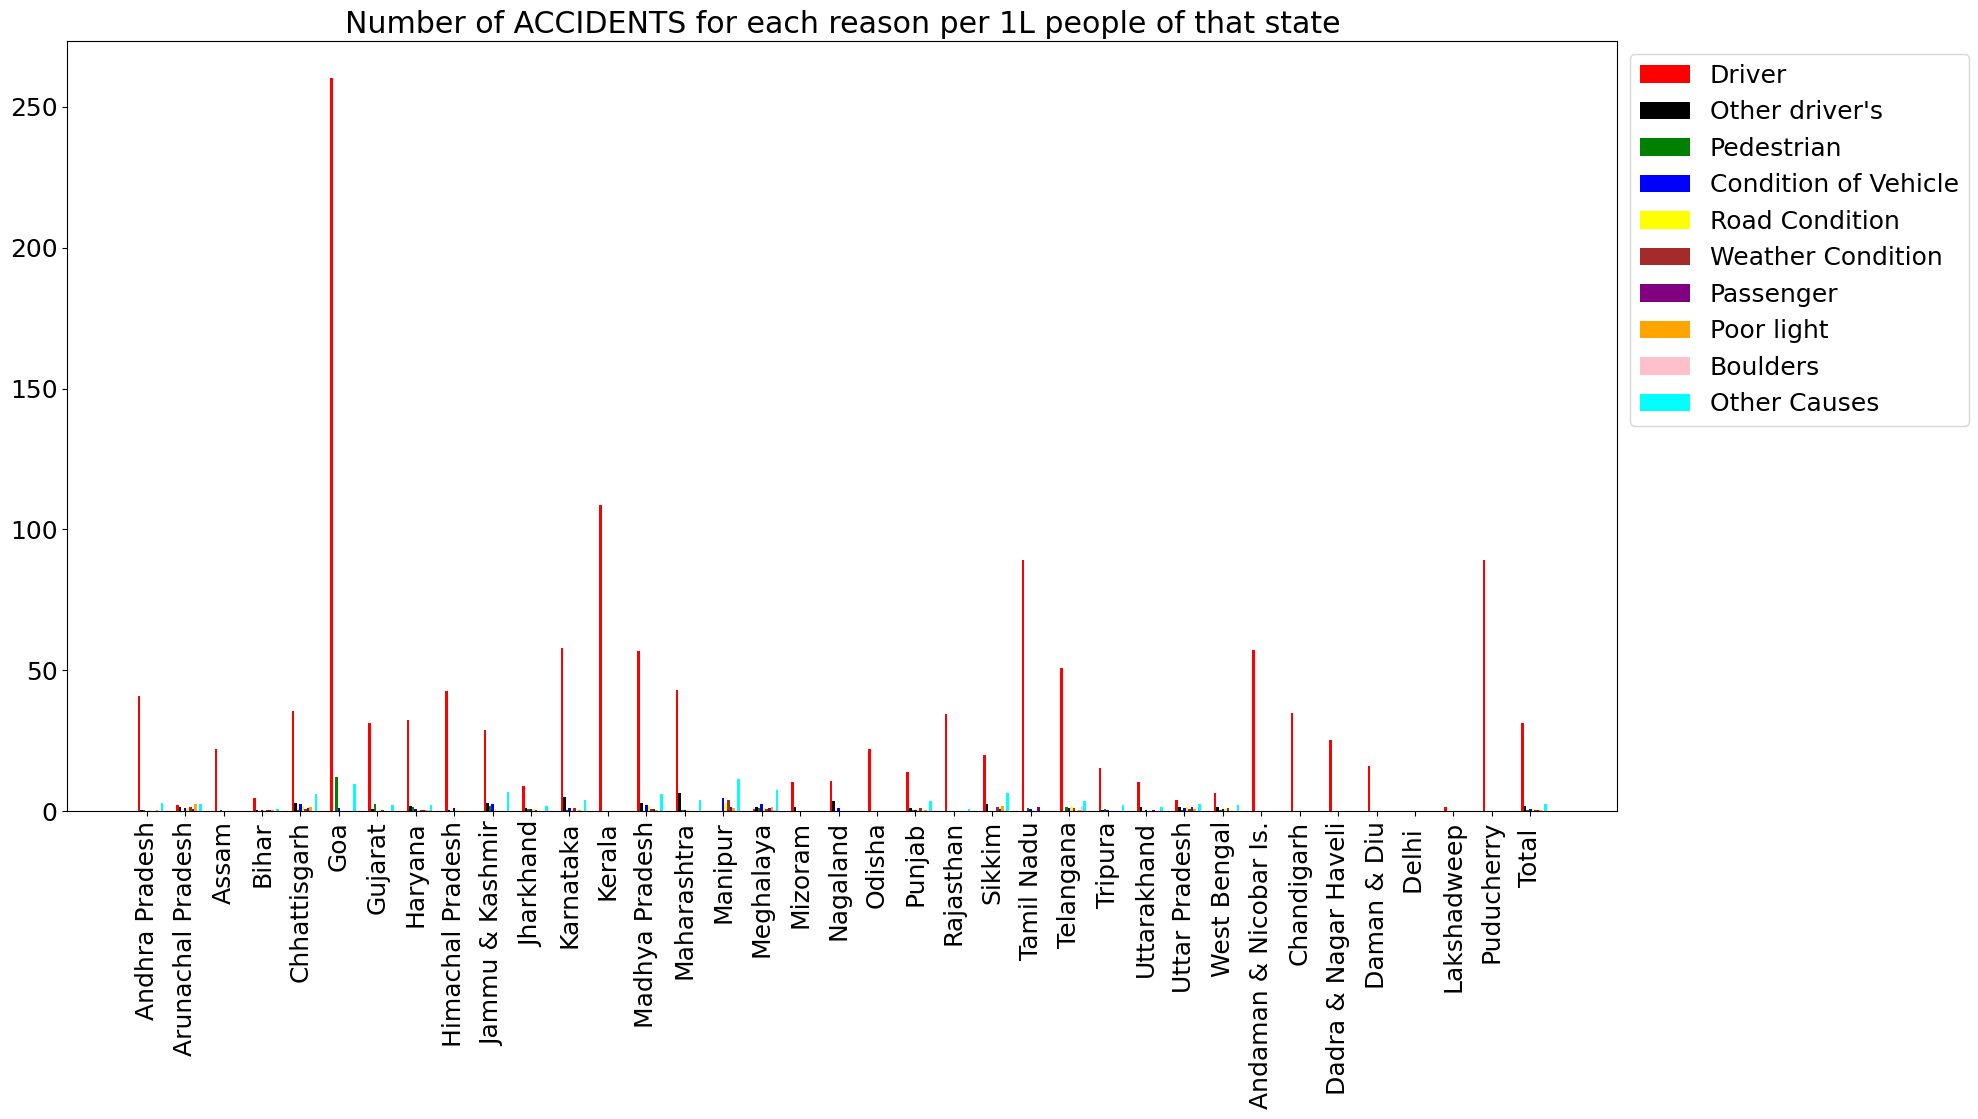

In [285]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':18})
plt.bar(UT-0.6,df5['Fault of Driver-Total No. of Road Accidents - 2014 per 1L people'],width=0.2,color='r',align='center',label='Driver')
plt.bar(UT-0.4,df5['Fault of Driver of other vehicles-Total No. of Road Accidents - 2014 per 1L people'],width=0.2,color='black',align='center',label='Other driver\'s')
plt.bar(UT-0.2,df5['Fault of Pedestrian-Total No. of Road Accidents - 2014 per 1L people'],width=0.2,color='g',align='center',label='Pedestrian')
plt.bar(UT,df5['Defect in Condition of Motor Vehicle-Total No. of Road Accidents - 2014 per 1L people'],width=0.2,color='b',align='center',label='Condition of Vehicle')
plt.bar(UT+0.2,df5['Defect in Road Condition-Total No. of Road Accidents - 2014 per 1L people'],width=0.2,color='yellow',align='center',label='Road Condition')
plt.bar(UT+0.4,df5['Weather Condition-Total No. of Road Accidents - 2014 per 1L people'],width=0.2,color='brown',align='center',label='Weather Condition')
plt.bar(UT+0.6,df5['Fault of Passenger-Total No. of Road Accidents - 2014 per 1L people'],width=0.2,color='purple',align='center',label='Passenger')
plt.bar(UT+0.8,df5['Poor light-Total No. of Road Accidents - 2014 per 1L people'],width=0.2,color='orange',align='center',label='Poor light')
plt.bar(UT+1.0,df5['Falling of boulders-Total No. of Road Accidents - 2014 per 1L people'],width=0.2,color='pink',align='center',label='Boulders')
plt.bar(UT+1.2,df5['Other causes/causes not known-Total No. of Road Accidents - 2014 per 1L people'],width=0.2,color='cyan',align='center',label='Other Causes')
plt.xticks(UT,df5['States/UTs'],rotation='vertical')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.title("Number of ACCIDENTS for each reason per 1L people of that state")
plt.show()

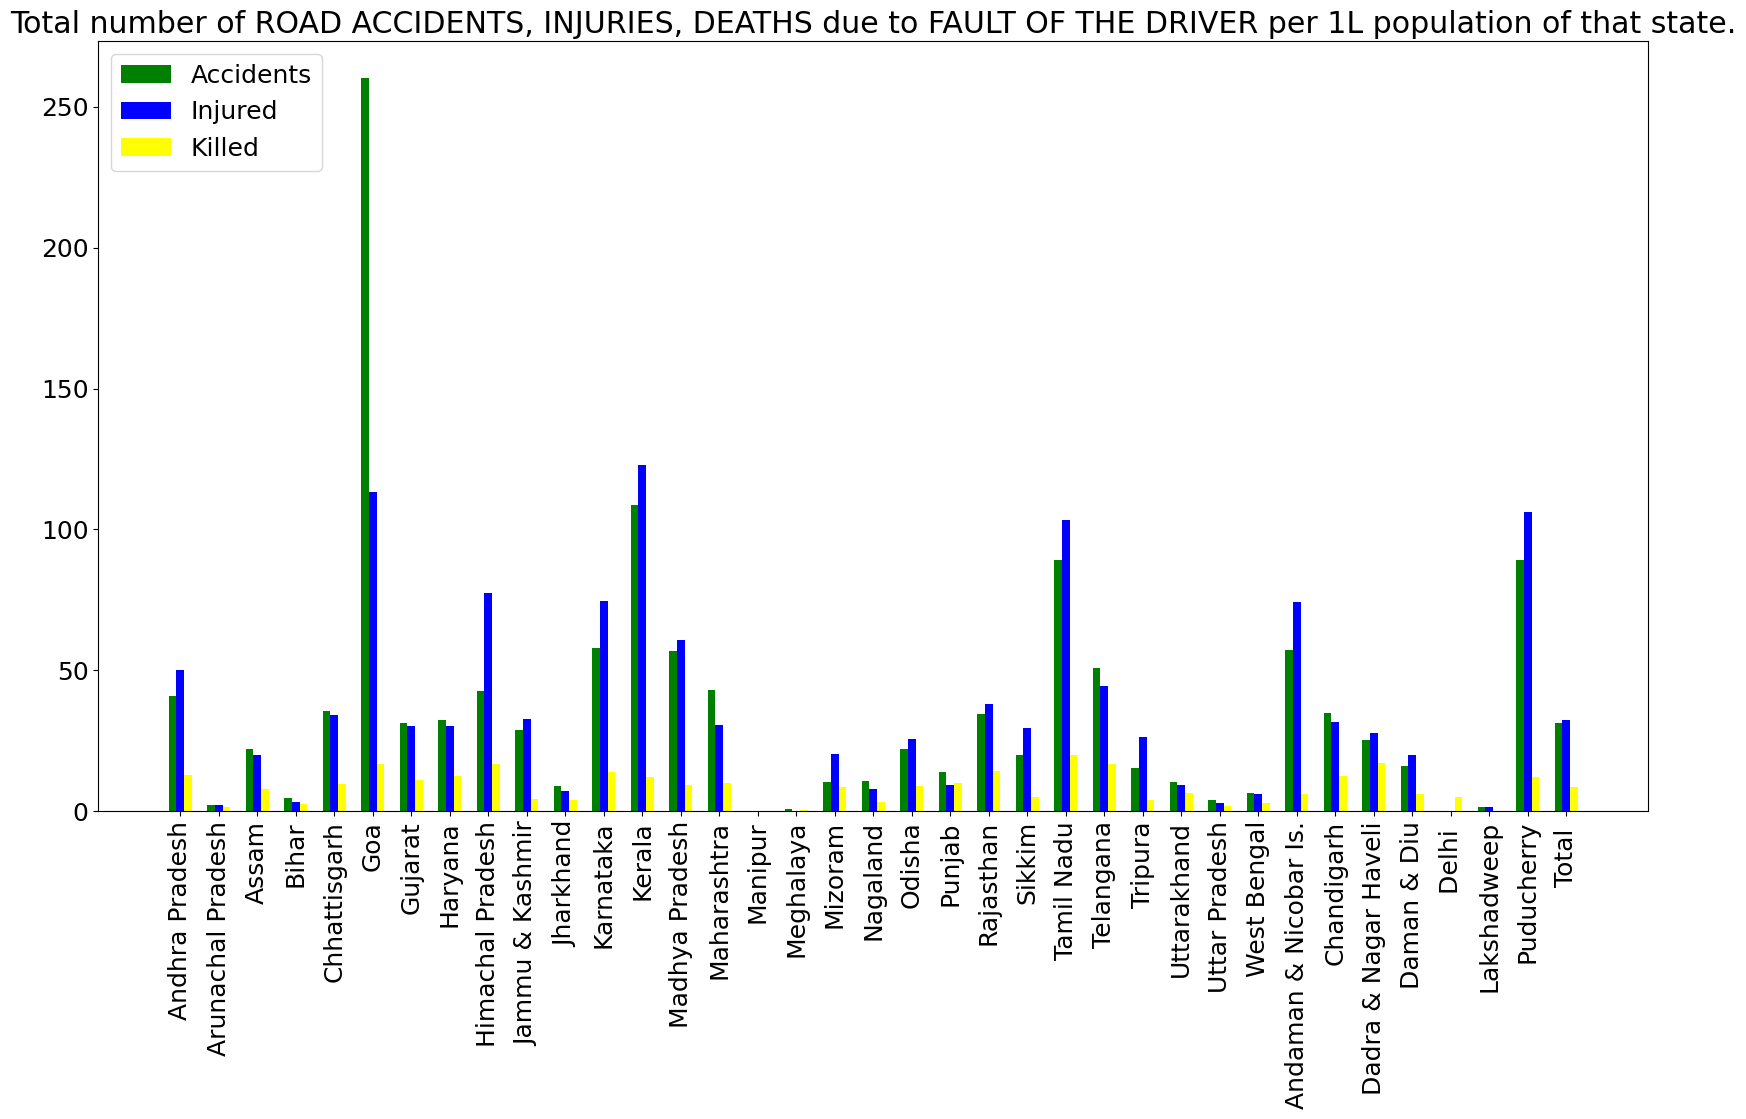

In [286]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':18})
UT=np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37])
plt.bar(UT-0.2,df5['Fault of Driver-Total No. of Road Accidents - 2014 per 1L people'],width=0.2,color='g',align='center',label='Accidents')
plt.bar(UT,df5['Fault of Driver-Number of Persons-Injured - 2014 per 1L people'],width=0.2,color='b',align='center',label='Injured')
plt.bar(UT+0.2,df5['Fault of Driver-Number of Persons-Killed - 2014 per 1L people'],width=0.2,color='yellow',align='center',label='Killed')
plt.xticks(UT,df5['States/UTs'],rotation='vertical')
plt.legend(loc="best")
plt.title("Total number of ROAD ACCIDENTS, INJURIES, DEATHS due to FAULT OF THE DRIVER per 1L population of that state.")
plt.show()

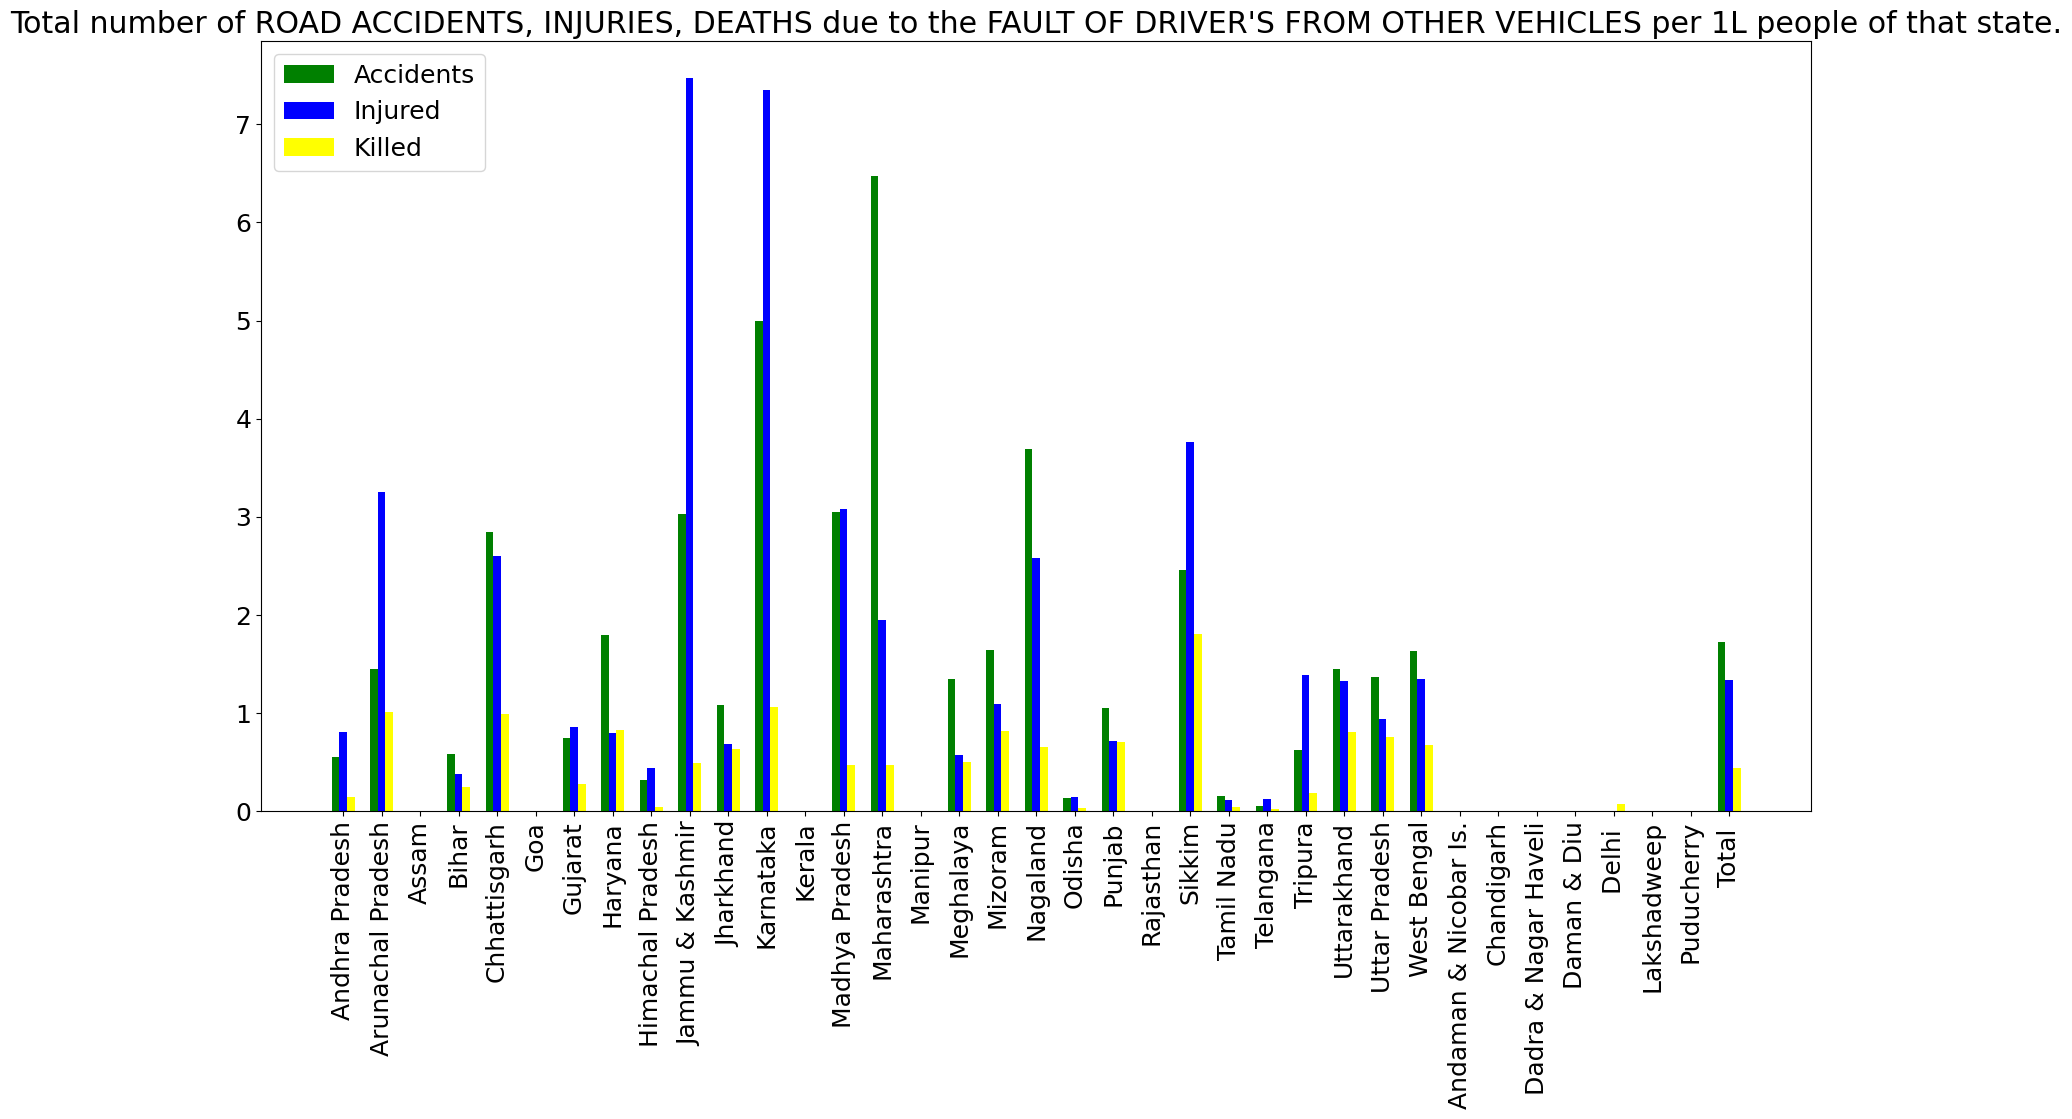

In [287]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':18})
plt.bar(UT-0.2,df5['Fault of Driver of other vehicles-Total No. of Road Accidents - 2014 per 1L people'],width=0.2,color='g',align='center',label='Accidents')
plt.bar(UT,df5['Fault of Driver of other vehicles-Number of Persons-Injured - 2014 per 1L people'],width=0.2,color='b',align='center',label='Injured')
plt.bar(UT+0.2,df5['Fault of Driver of other vehicles-Number of Persons-Killed - 2014 per 1L people'],width=0.2,color='yellow',align='center',label='Killed')
plt.xticks(UT,df5['States/UTs'],rotation='vertical')
plt.legend(loc="best")
plt.title("Total number of ROAD ACCIDENTS, INJURIES, DEATHS due to the FAULT OF DRIVER'S FROM OTHER VEHICLES per 1L people of that state.")
plt.show()

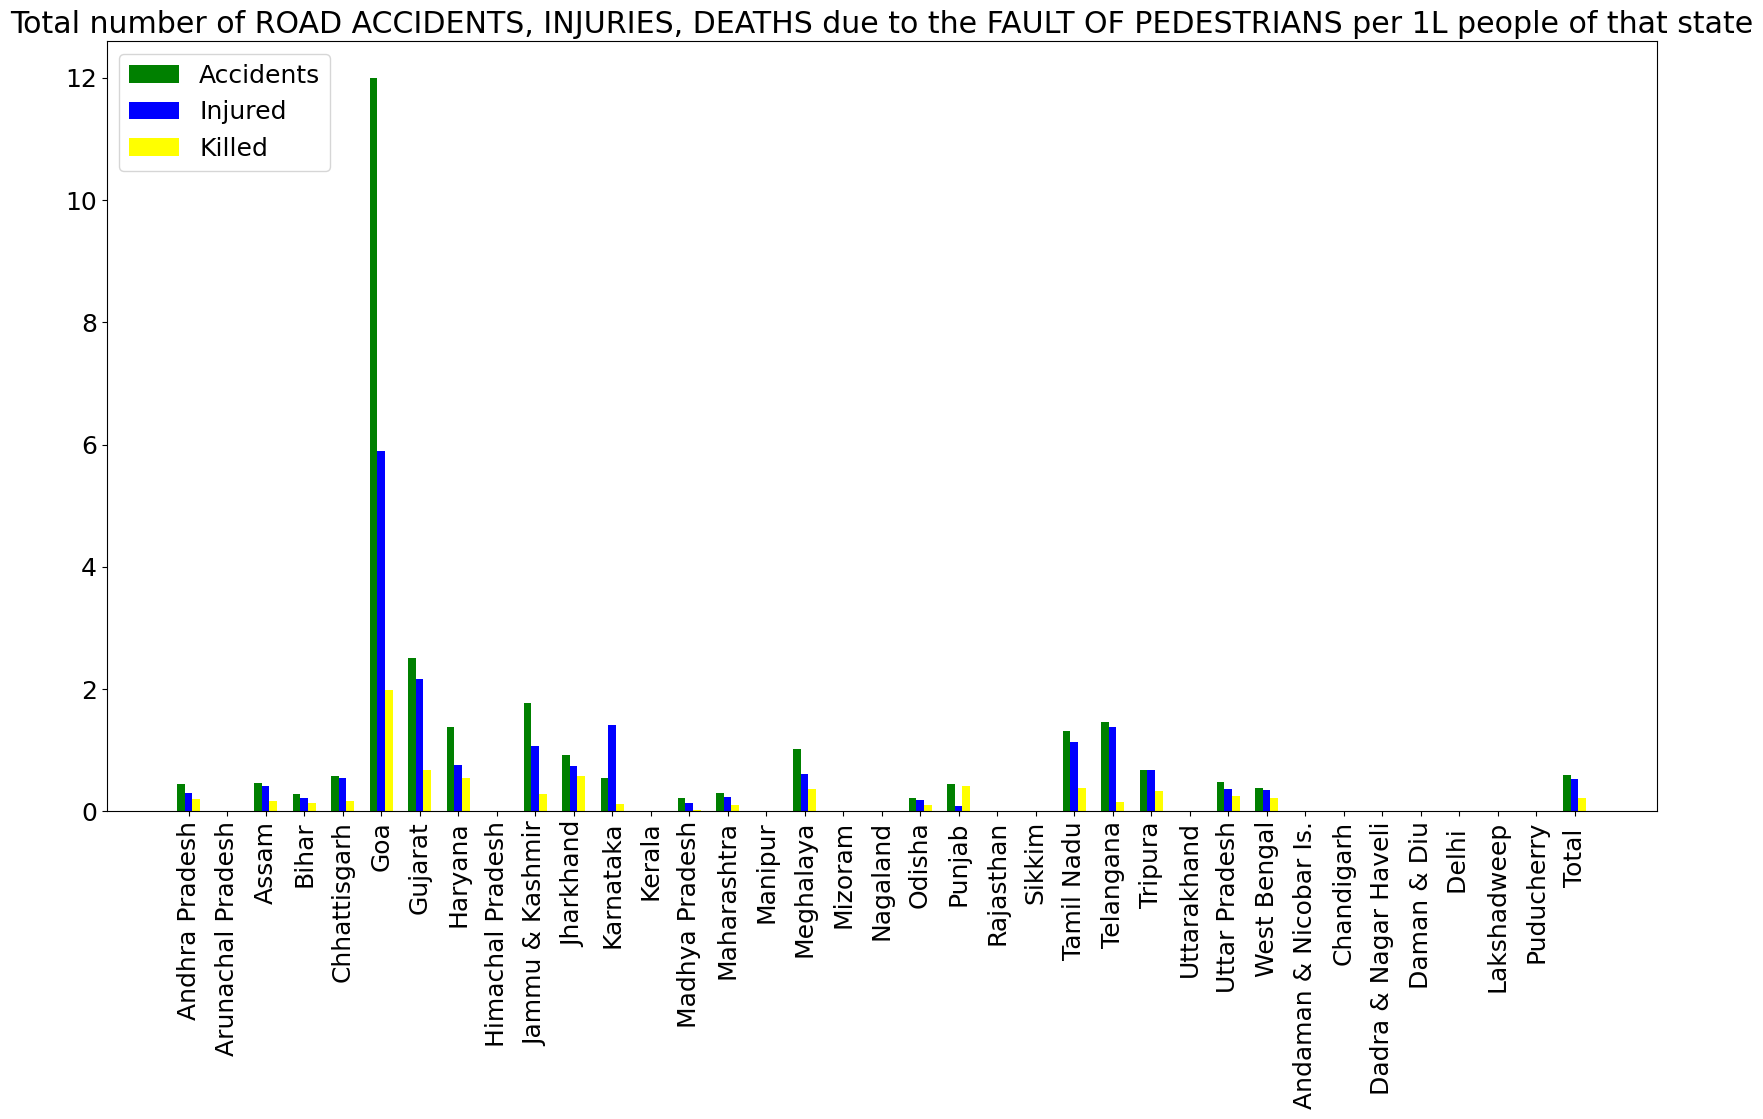

In [288]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':18})
plt.bar(UT-0.2,df5['Fault of Pedestrian-Total No. of Road Accidents - 2014 per 1L people'],width=0.2,color='g',align='center',label='Accidents')
plt.bar(UT,df5['Fault of Pedestrian-Number of Persons-Injured - 2014 per 1L people'],width=0.2,color='b',align='center',label='Injured')
plt.bar(UT+0.2,df5['Fault of Pedestrian-Number of Persons-Killed - 2014 per 1L people'],width=0.2,color='yellow',align='center',label='Killed')
plt.xticks(UT,df5['States/UTs'],rotation='vertical')
plt.legend(loc="best")
plt.title("Total number of ROAD ACCIDENTS, INJURIES, DEATHS due to the FAULT OF PEDESTRIANS per 1L people of that state")
plt.show()

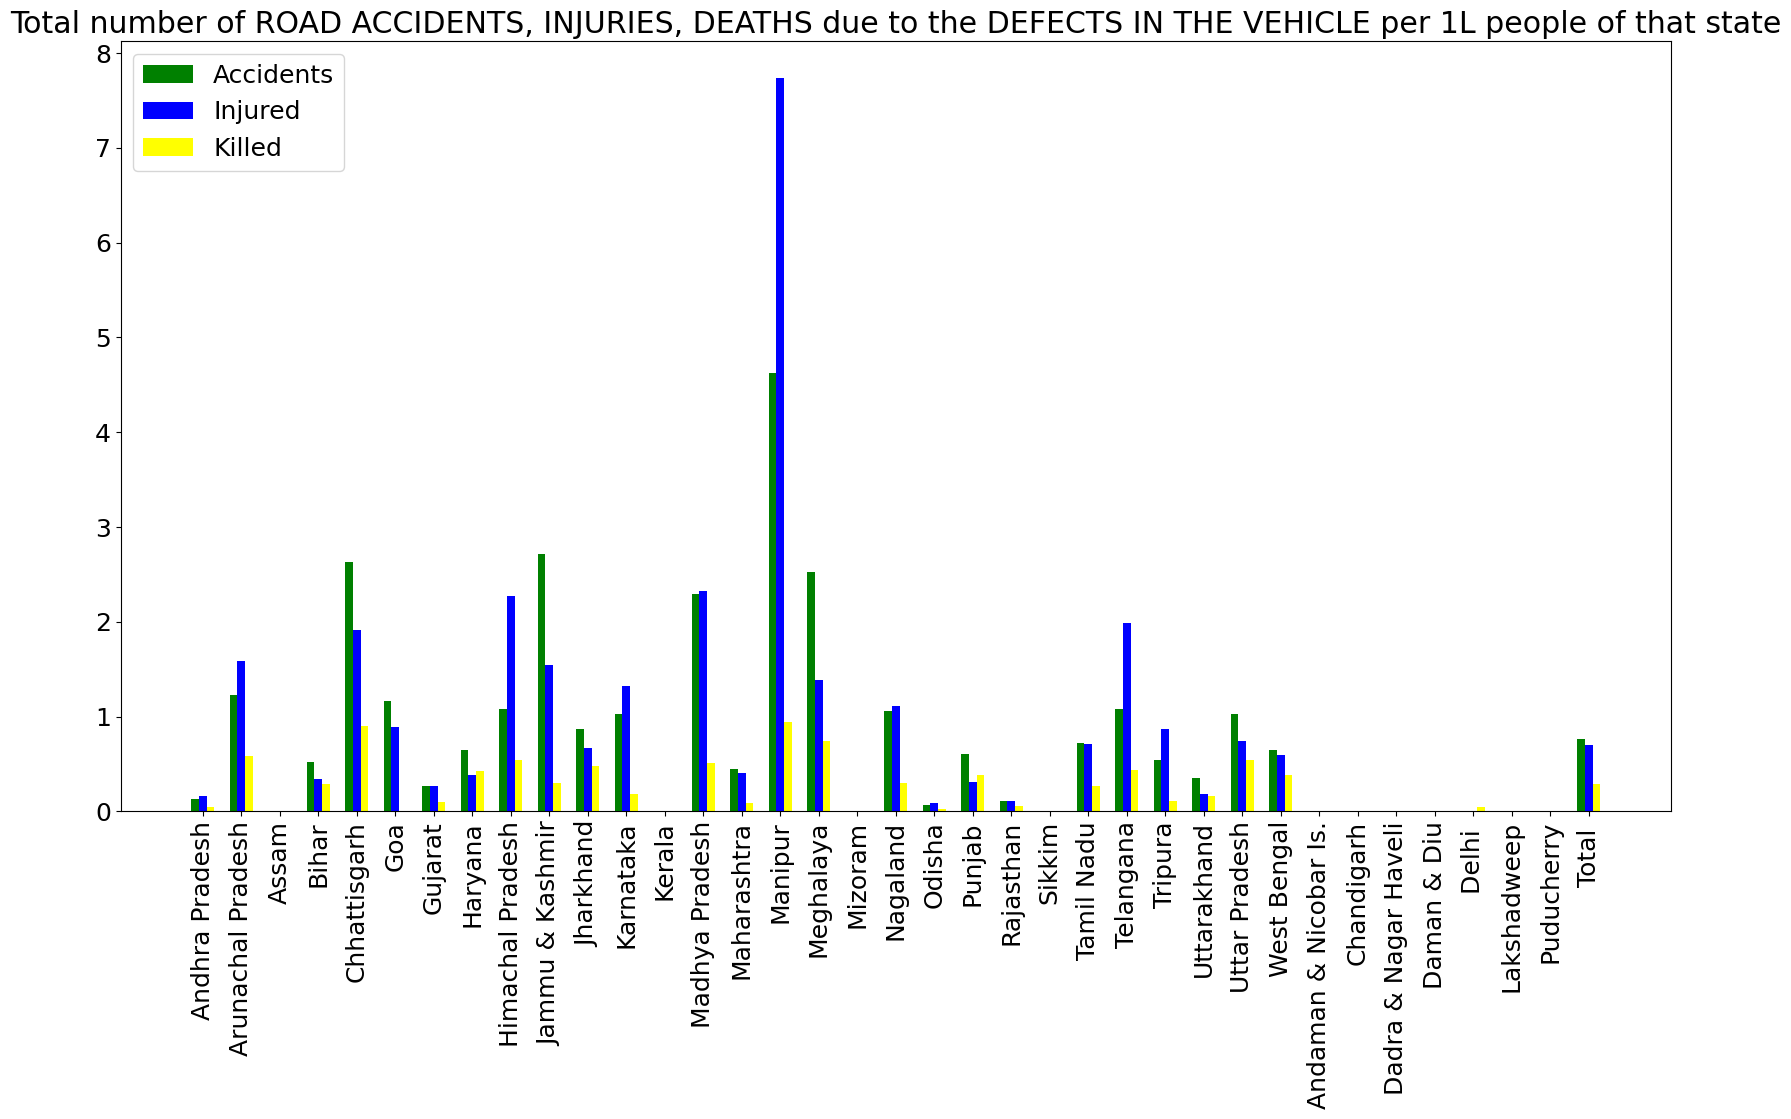

In [289]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':18})
plt.bar(UT-0.2,df5['Defect in Condition of Motor Vehicle-Total No. of Road Accidents - 2014 per 1L people'],width=0.2,color='g',align='center',label='Accidents')
plt.bar(UT,df5['Defect in Condition of Motor Vehicle-Number of Persons-Injured - 2014 per 1L people'],width=0.2,color='b',align='center',label='Injured')
plt.bar(UT+0.2,df5['Defect in Condition of Motor Vehicle-Number of Persons-Killed - 2014 per 1L people'],width=0.2,color='yellow',align='center',label='Killed')
plt.xticks(UT,df5['States/UTs'],rotation='vertical')
plt.legend(loc="best")
plt.title("Total number of ROAD ACCIDENTS, INJURIES, DEATHS due to the DEFECTS IN THE VEHICLE per 1L people of that state")
plt.show()

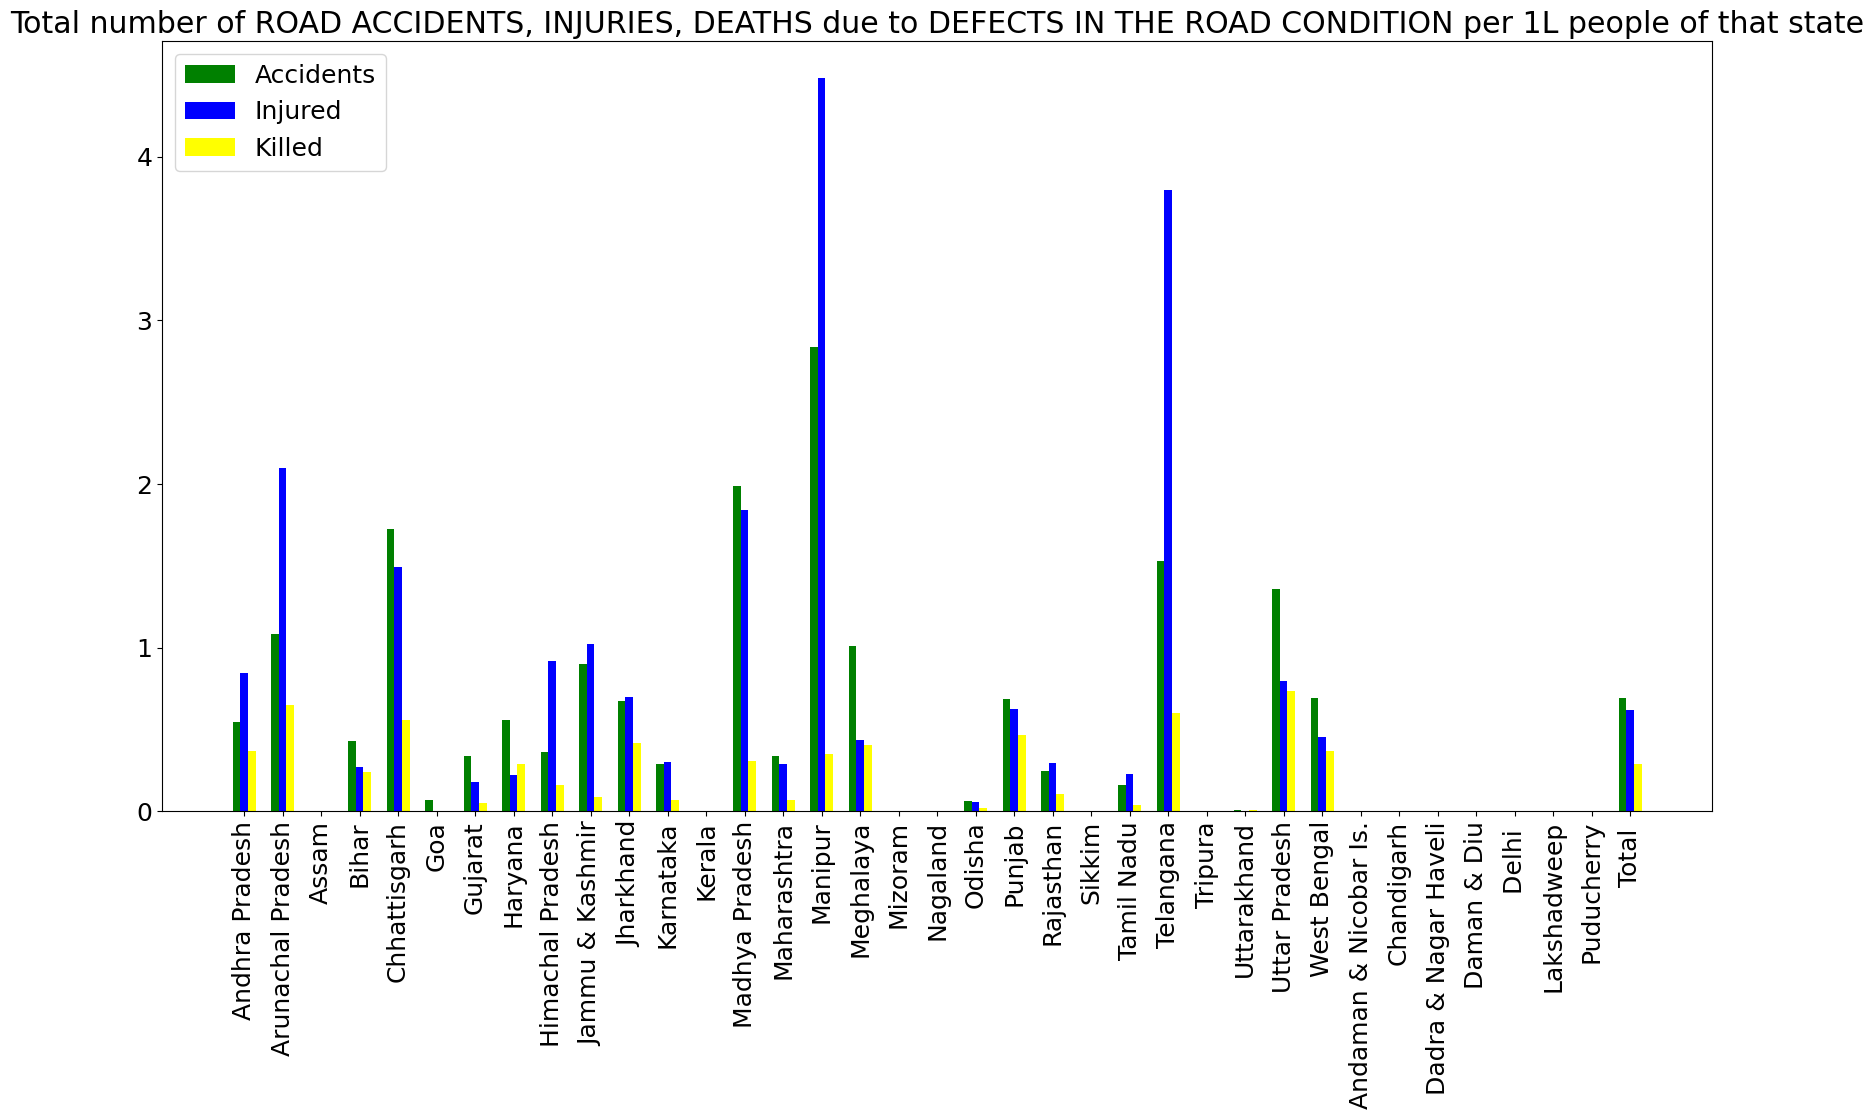

In [290]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':18})
plt.bar(UT-0.2,df5['Defect in Road Condition-Total No. of Road Accidents - 2014 per 1L people'],width=0.2,color='g',align='center',label='Accidents')
plt.bar(UT,df5['Defect in Road Condition-Number of Persons-Injured - 2014 per 1L people'],width=0.2,color='b',align='center',label='Injured')
plt.bar(UT+0.2,df5['Defect in Road Condition-Number of Persons-Killed - 2014 per 1L people'],width=0.2,color='yellow',align='center',label='Killed')
plt.xticks(UT,df5['States/UTs'],rotation='vertical')
plt.legend(loc="best")
plt.title("Total number of ROAD ACCIDENTS, INJURIES, DEATHS due to DEFECTS IN THE ROAD CONDITION per 1L people of that state")
plt.show()

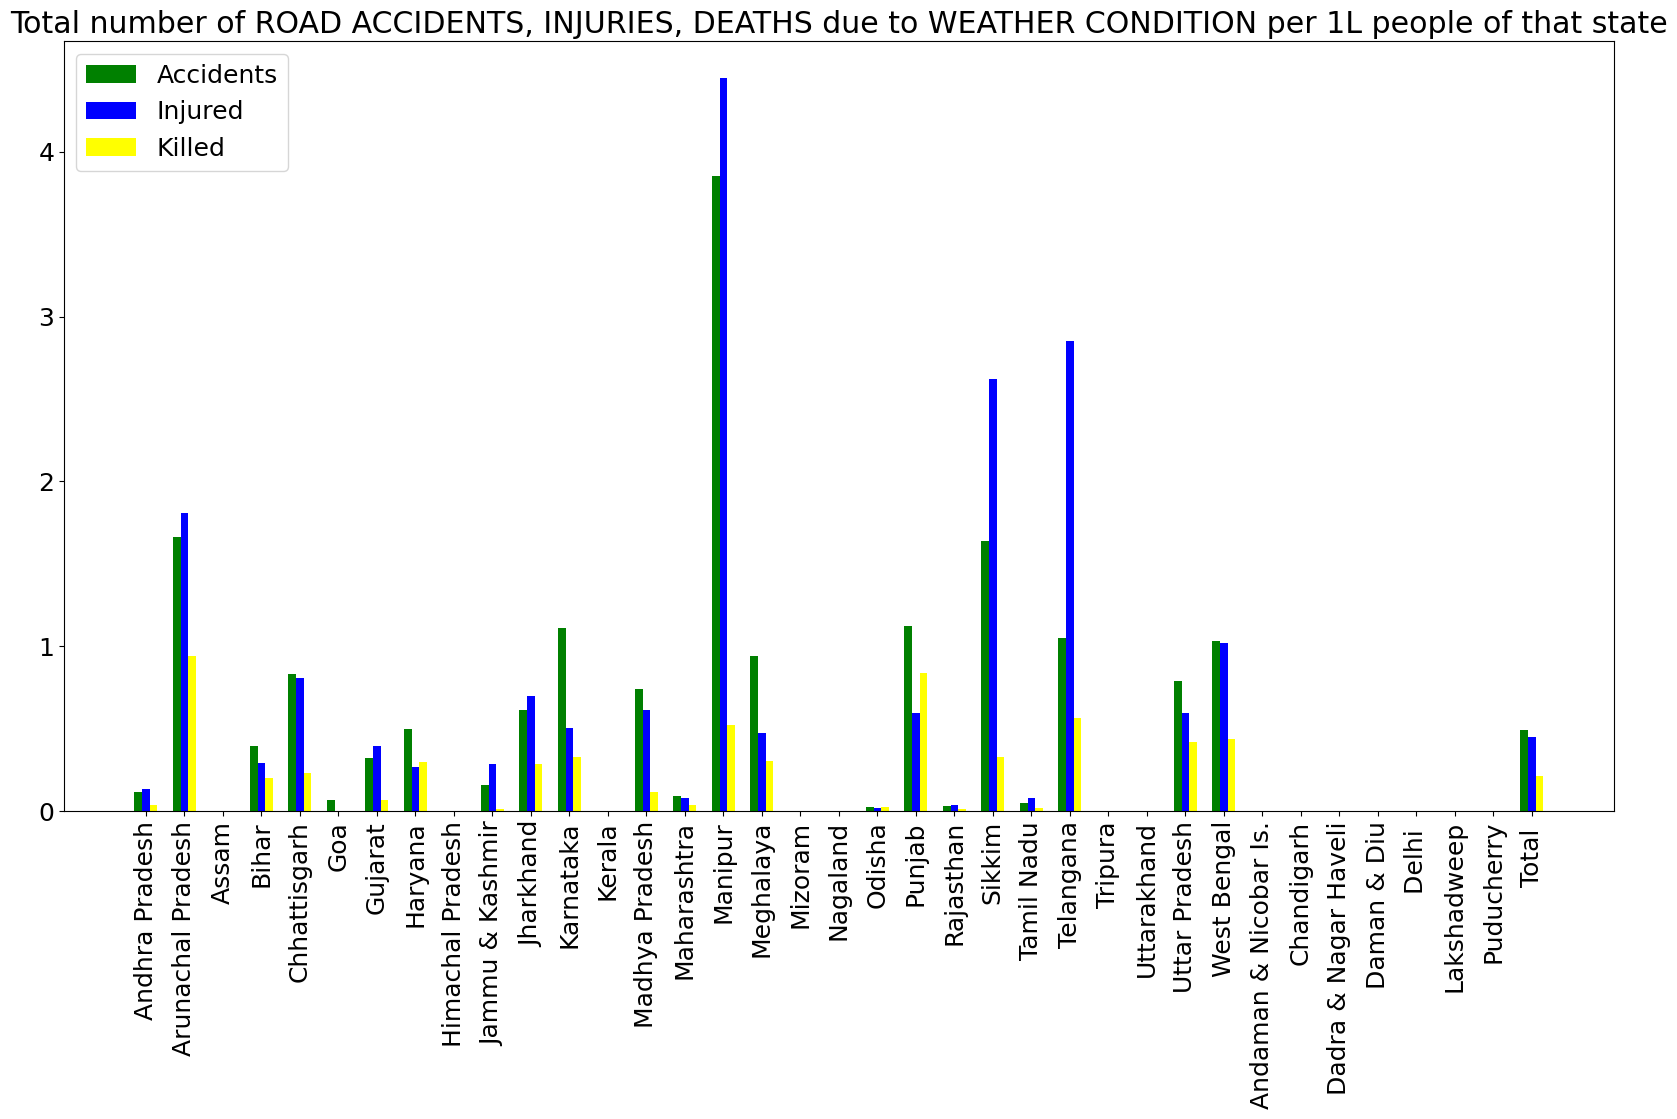

In [291]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':18})
plt.bar(UT-0.2,df5['Weather Condition-Total No. of Road Accidents - 2014 per 1L people'],width=0.2,color='g',align='center',label='Accidents')
plt.bar(UT,df5['Weather Condition-Number of Persons-Injured - 2014 per 1L people'],width=0.2,color='b',align='center',label='Injured')
plt.bar(UT+0.2,df5['Weather Condition-Number of Persons-Killed - 2014 per 1L people'],width=0.2,color='yellow',align='center',label='Killed')
plt.xticks(UT,df5['States/UTs'],rotation='vertical')
plt.legend(loc="best")
plt.title("Total number of ROAD ACCIDENTS, INJURIES, DEATHS due to WEATHER CONDITION per 1L people of that state")
plt.show()


### This dataset tells about the number of accidents happening along **different types of vehicles.**

In [292]:
df6 = pd.read_csv('typeOfVehicle.csv')
df6.head()

Sl. No.         States/UTs  \
0       1     Andhra Pradesh   
1       2  Arunachal Pradesh   
2       3              Assam   
3       4              Bihar   
4       5       Chhattisgarh   

   Two-Wheelers - Number of Road Accidents - Fatal - 2014  \
0                                               1961        
1                                                 15        
2                                                489        
3                                                769        
4                                               1074        

   Two-Wheelers - Number of Road Accidents - Fatal - 2014 per 1L people  \
0                                           3.741606                      
1                                           1.084029                      
2                                           1.567028                      
3                                           0.738717                      
4                                           4.204313                      

   Two-Wheelers - Number of Road Accidents - Total - 2014  \
0                                               7239        
1                                                 34        
2                                               1508        
3                                               1750        
4                                               4787        

   Two-Wheelers - Number of Road Accidents - Total - 2014 per 1L people  \
0                                          13.812077                      
1                                           2.457132                      
2                                           4.832470                      
3                                           1.681085                      
4                                          18.739334                      

   Two-Wheelers - Number of Persons - Killed - 2014  \
0                                              2003   
1                                                21   
2                                               537   
3                                               820   
4                                              1126   

   Two-Wheelers - Number of Persons - Killed - 2014 per 1L people  \
0                                           3.821742                
1                                           1.517640                
2                                           1.720846                
3                                           0.787708                
4                                           4.407873                

   Two-Wheelers - Number of Persons - Injured - 2014  \
0                                               7333   
1                                                 30   
2                                               1342   
3                                               1131   
4                                               4295   

   Two-Wheelers - Number of Persons - Injured - 2014 per 1L people  ...  \
0                                          13.991430                ...   
1                                           2.168058                ...   
2                                           4.300513                ...   
3                                           1.086461                ...   
4                                          16.813336                ...   

   Other Motor Vehicles - Number of Persons - Injured - 2014 per 1L people  \
0                                           2.520480                         
1                                           0.000000                         
2                                           2.868077                         
3                                           0.425555                         
4                                           4.662324                         

   Other Vehicles/Objects - Number of Road Accidents - Fatal - 2014  \
0                                                466                  
1                           

In [293]:
row,column=df6.shape
round(((row-df6.isnull().sum())/row)*100)

Sl. No.                                                                                 100.0
States/UTs                                                                              100.0
Two-Wheelers - Number of Road Accidents - Fatal - 2014                                  100.0
Two-Wheelers - Number of Road Accidents - Fatal - 2014 per 1L people                    100.0
Two-Wheelers - Number of Road Accidents - Total - 2014                                  100.0
Two-Wheelers - Number of Road Accidents - Total - 2014 per 1L people                    100.0
Two-Wheelers - Number of Persons - Killed - 2014                                        100.0
Two-Wheelers - Number of Persons - Killed - 2014 per 1L people                          100.0
Two-Wheelers - Number of Persons - Injured - 2014                                       100.0
Two-Wheelers - Number of Persons - Injured - 2014 per 1L people                         100.0
Auto-Rickshaws - Number of Road Accidents - Fatal - 2014    

In [294]:
df6.dropna(axis=0,how='any',inplace=True)

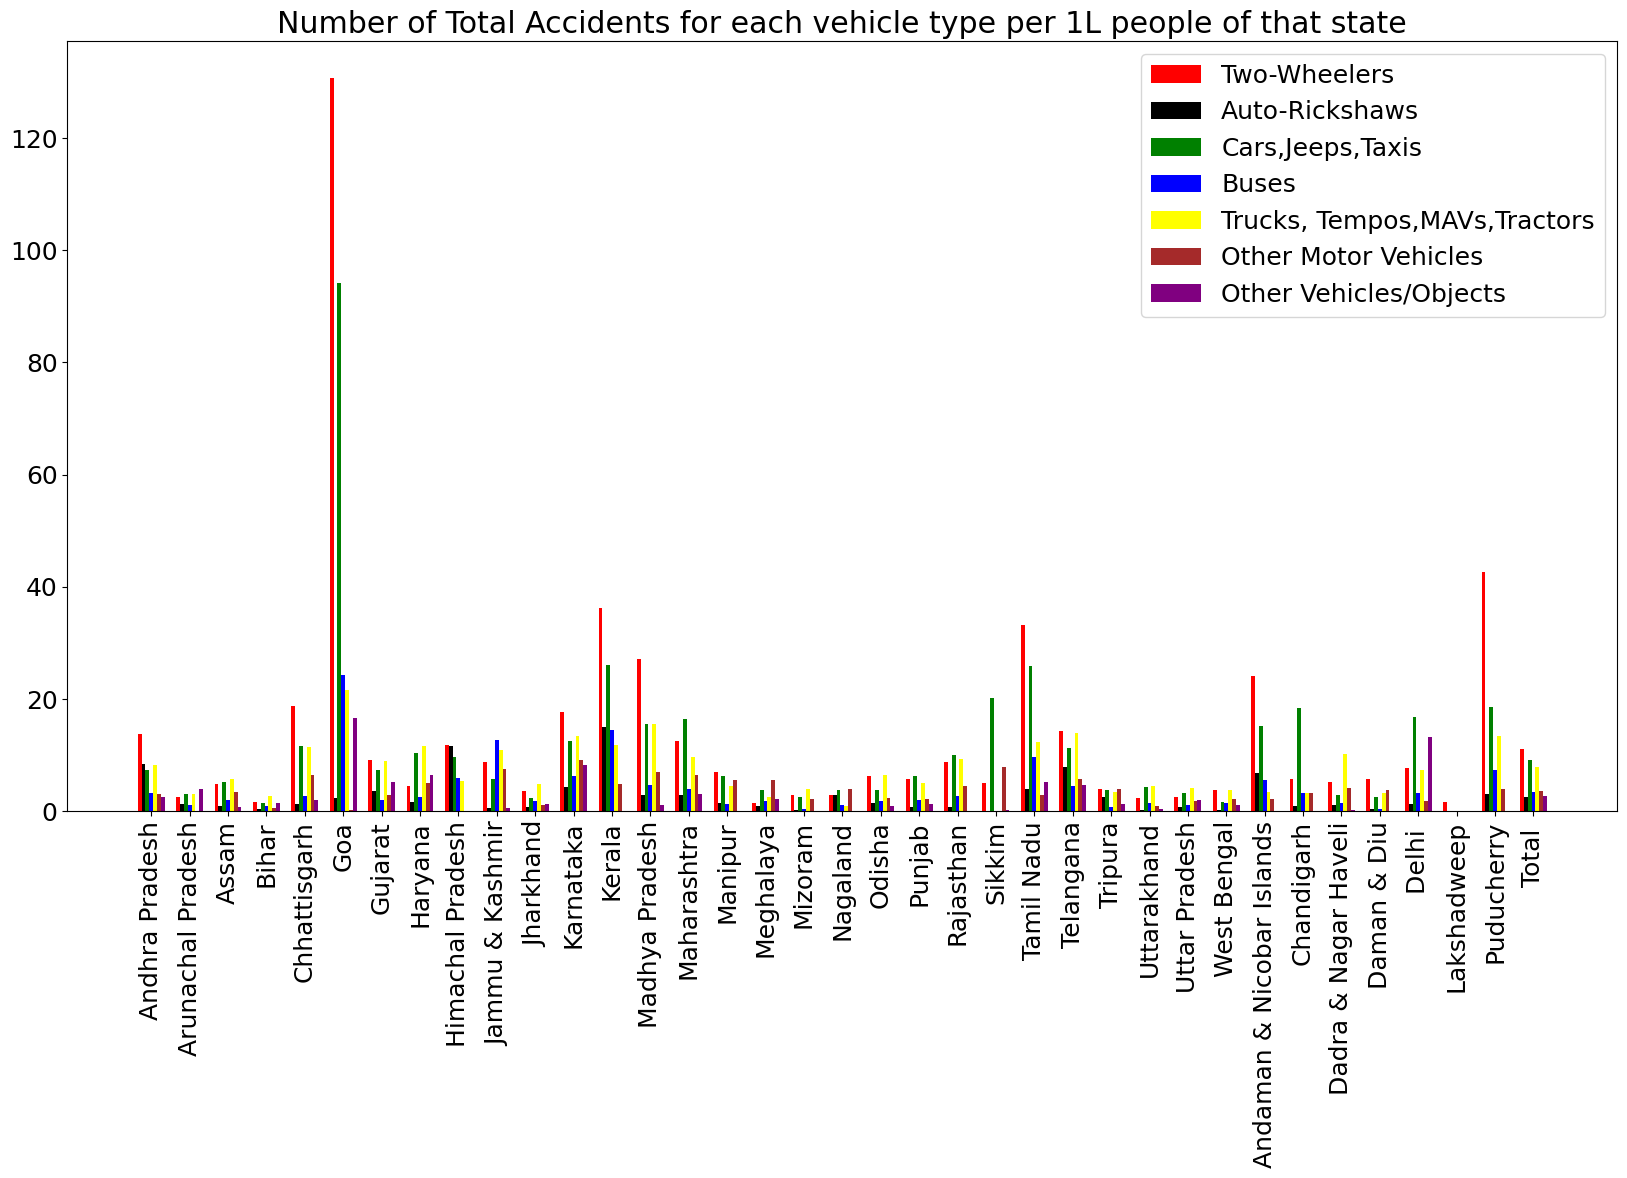

In [295]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':18})
UT=np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37])
UT=UT*2
plt.bar(UT-0.6,df6['Two-Wheelers - Number of Road Accidents - Total - 2014 per 1L people'],width=0.2,color='r',align='center',label='Two-Wheelers')
plt.bar(UT-0.4,df6['Auto-Rickshaws - Number of Road Accidents - Total - 2014 per 1L people'],width=0.2,color='black',align='center',label='Auto-Rickshaws')
plt.bar(UT-0.2,df6['Cars, Jeeps,Taxis - Number of Road Accidents - Total - 2014 per 1L people'],width=0.2,color='g',align='center',label='Cars,Jeeps,Taxis')
plt.bar(UT,df6['Buses - Number of Road Accidents - Total - 2014 per 1L people'],width=0.2,color='b',align='center',label='Buses')
plt.bar(UT+0.2,df6['Trucks, Tempos,MAVs,Tractors - Number of Road Accidents - Total - 2014 per 1L people'],width=0.2,color='yellow',align='center',label='Trucks, Tempos,MAVs,Tractors')
plt.bar(UT+0.4,df6['Other Motor Vehicles - Number of Road Accidents - Total - 2014 per 1L people'],width=0.2,color='brown',align='center',label='Other Motor Vehicles')
plt.bar(UT+0.6,df6['Other Vehicles/Objects - Number of Road Accidents - Total - 2014 per 1L people'],width=0.2,color='purple',align='center',label='Other Vehicles/Objects')
plt.xticks(UT,df6['States/UTs'],rotation='vertical')
plt.legend(loc="best")
plt.title("Number of Total Accidents for each vehicle type per 1L people of that state")
plt.show()


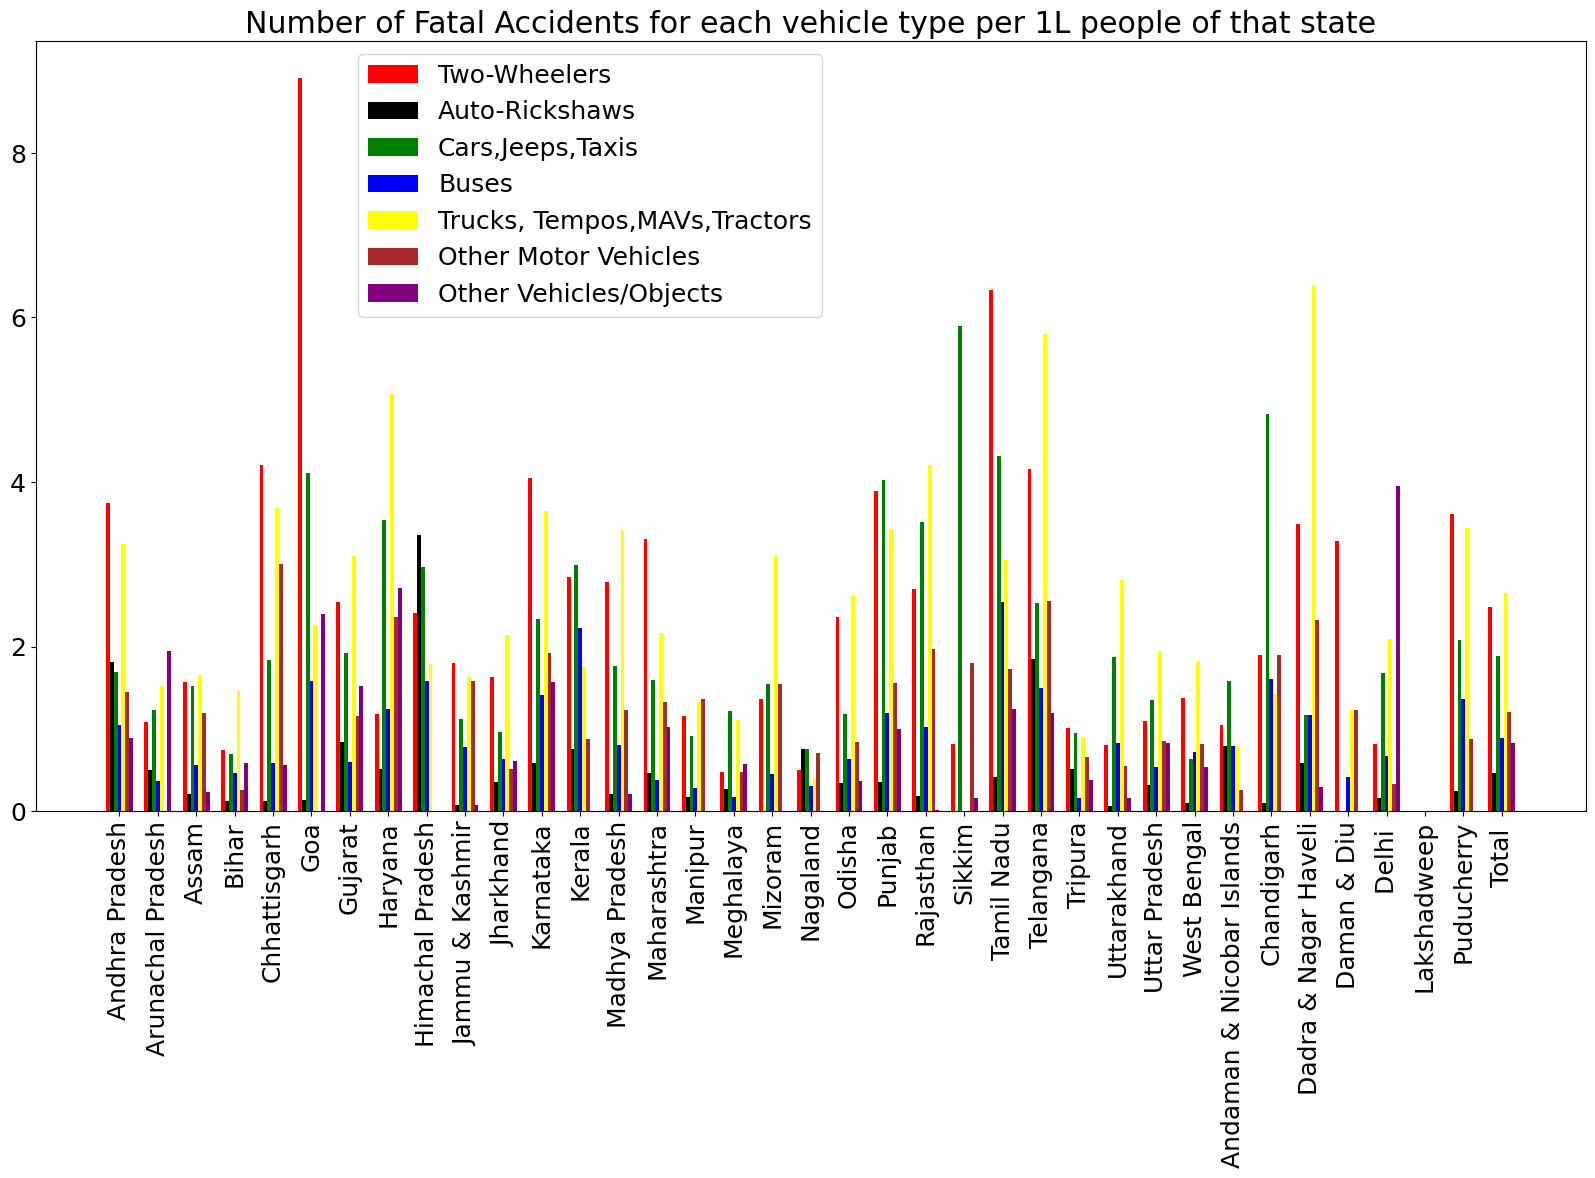

In [296]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':18})
plt.bar(UT-0.6,df6['Two-Wheelers - Number of Road Accidents - Fatal - 2014 per 1L people'],width=0.2,color='r',align='center',label='Two-Wheelers')
plt.bar(UT-0.4,df6['Auto-Rickshaws - Number of Road Accidents - Fatal - 2014 per 1L people'],width=0.2,color='black',align='center',label='Auto-Rickshaws')
plt.bar(UT-0.2,df6['Cars, Jeeps,Taxis - Number of Road Accidents - Fatal - 2014 per 1L people'],width=0.2,color='g',align='center',label='Cars,Jeeps,Taxis')
plt.bar(UT,df6['Buses - Number of Road Accidents - Fatal - 2014 per 1L people'],width=0.2,color='b',align='center',label='Buses')
plt.bar(UT+0.2,df6['Trucks, Tempos,MAVs,Tractors - Number of Road Accidents - Fatal - 2014 per 1L people'],width=0.2,color='yellow',align='center',label='Trucks, Tempos,MAVs,Tractors')
plt.bar(UT+0.4,df6['Other Motor Vehicles - Number of Road Accidents - Fatal - 2014 per 1L people'],width=0.2,color='brown',align='center',label='Other Motor Vehicles')
plt.bar(UT+0.6,df6['Other Vehicles/Objects - Number of Road Accidents - Fatal - 2014 per 1L people'],width=0.2,color='purple',align='center',label='Other Vehicles/Objects')
plt.xticks(UT,df6['States/UTs'],rotation='vertical')
plt.legend(loc='upper left', bbox_to_anchor=(0.2,1))
plt.title("Number of Fatal Accidents for each vehicle type per 1L people of that state")
plt.show()


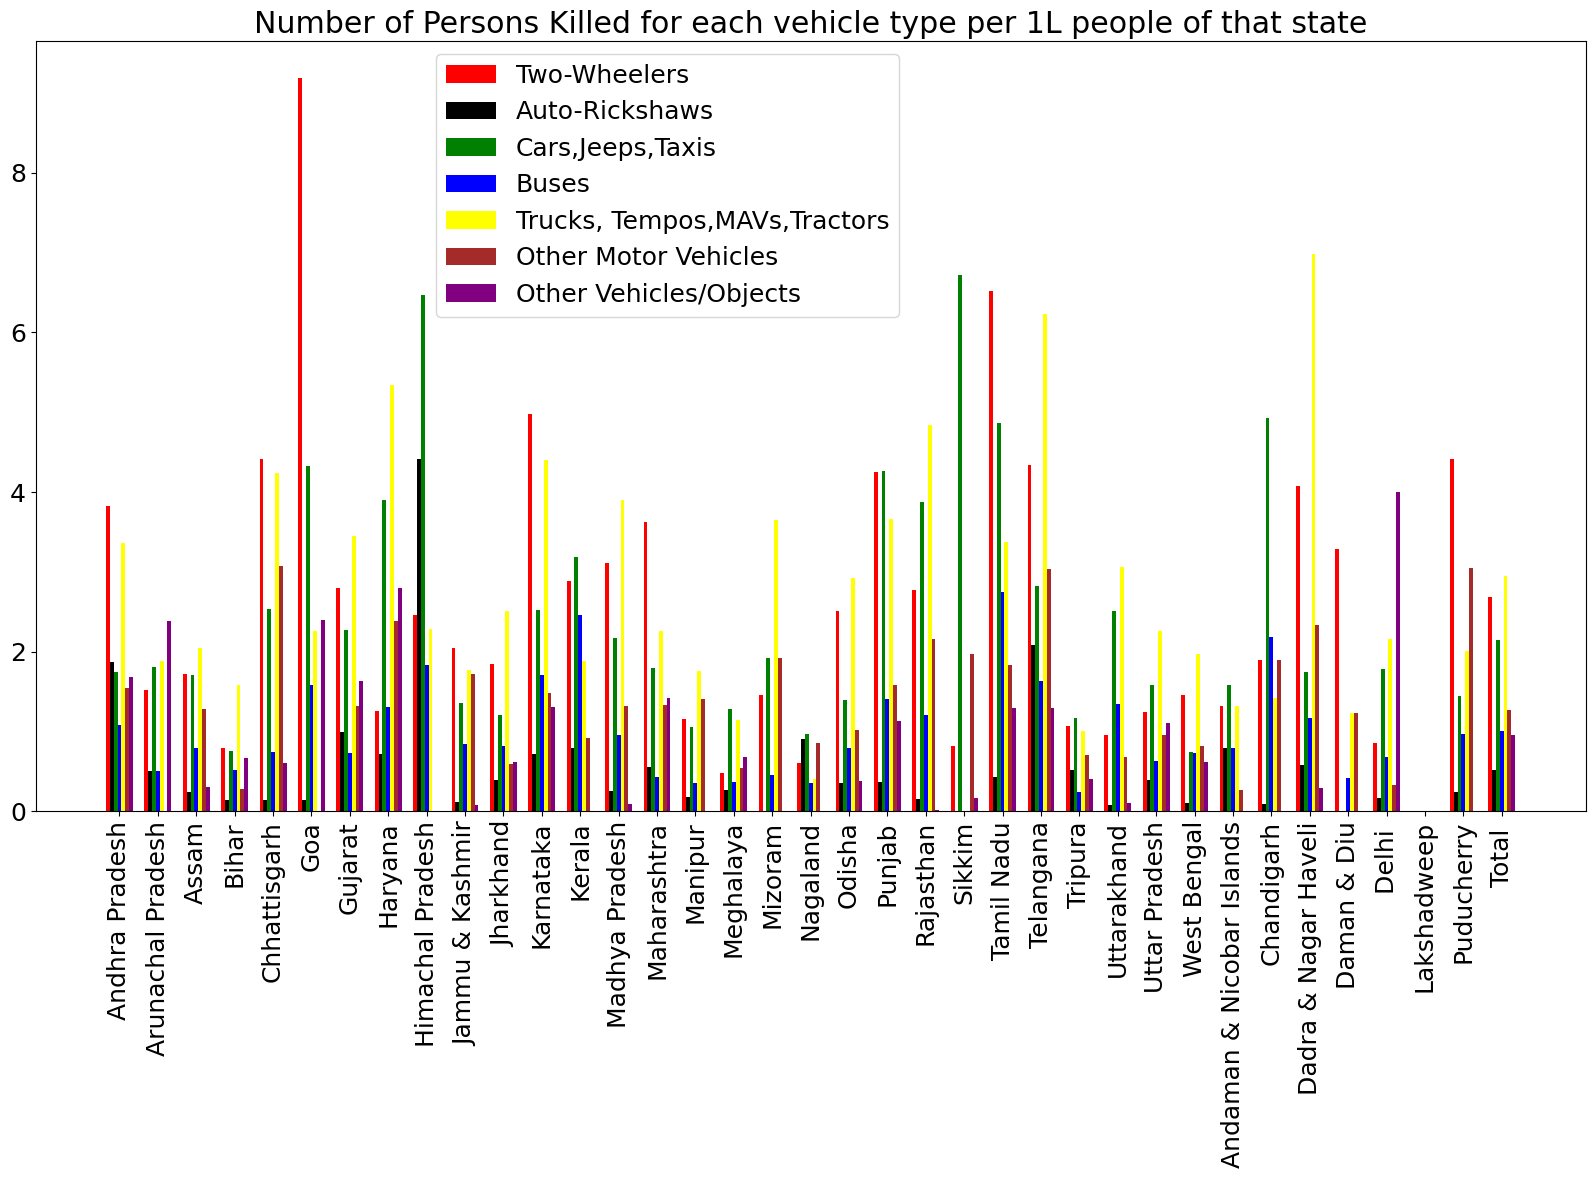

In [297]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':18})
plt.bar(UT-0.6,df6['Two-Wheelers - Number of Persons - Killed - 2014 per 1L people'],width=0.2,color='r',align='center',label='Two-Wheelers')
plt.bar(UT-0.4,df6['Auto-Rickshaws - Number of Persons - Killed - 2014 per 1L people'],width=0.2,color='black',align='center',label='Auto-Rickshaws')
plt.bar(UT-0.2,df6['Cars, Jeeps,Taxis - Number of Persons - Killed - 2014 per 1L people'],width=0.2,color='g',align='center',label='Cars,Jeeps,Taxis')
plt.bar(UT,df6['Buses - Number of Persons - Killed - 2014 per 1L people'],width=0.2,color='b',align='center',label='Buses')
plt.bar(UT+0.2,df6['Trucks, Tempos,MAVs,Tractors - Number of Persons - Killed - 2014 per 1L people'],width=0.2,color='yellow',align='center',label='Trucks, Tempos,MAVs,Tractors')
plt.bar(UT+0.4,df6['Other Motor Vehicles - Number of Persons - Killed - 2014 per 1L people'],width=0.2,color='brown',align='center',label='Other Motor Vehicles')
plt.bar(UT+0.6,df6['Other Vehicles/Objects - Number of Persons - Killed - 2014 per 1L people'],width=0.2,color='purple',align='center',label='Other Vehicles/Objects')
plt.xticks(UT,df6['States/UTs'],rotation='vertical')
plt.legend(loc='upper left', bbox_to_anchor=(0.25,1))
plt.title("Number of Persons Killed for each vehicle type per 1L people of that state")
plt.show()

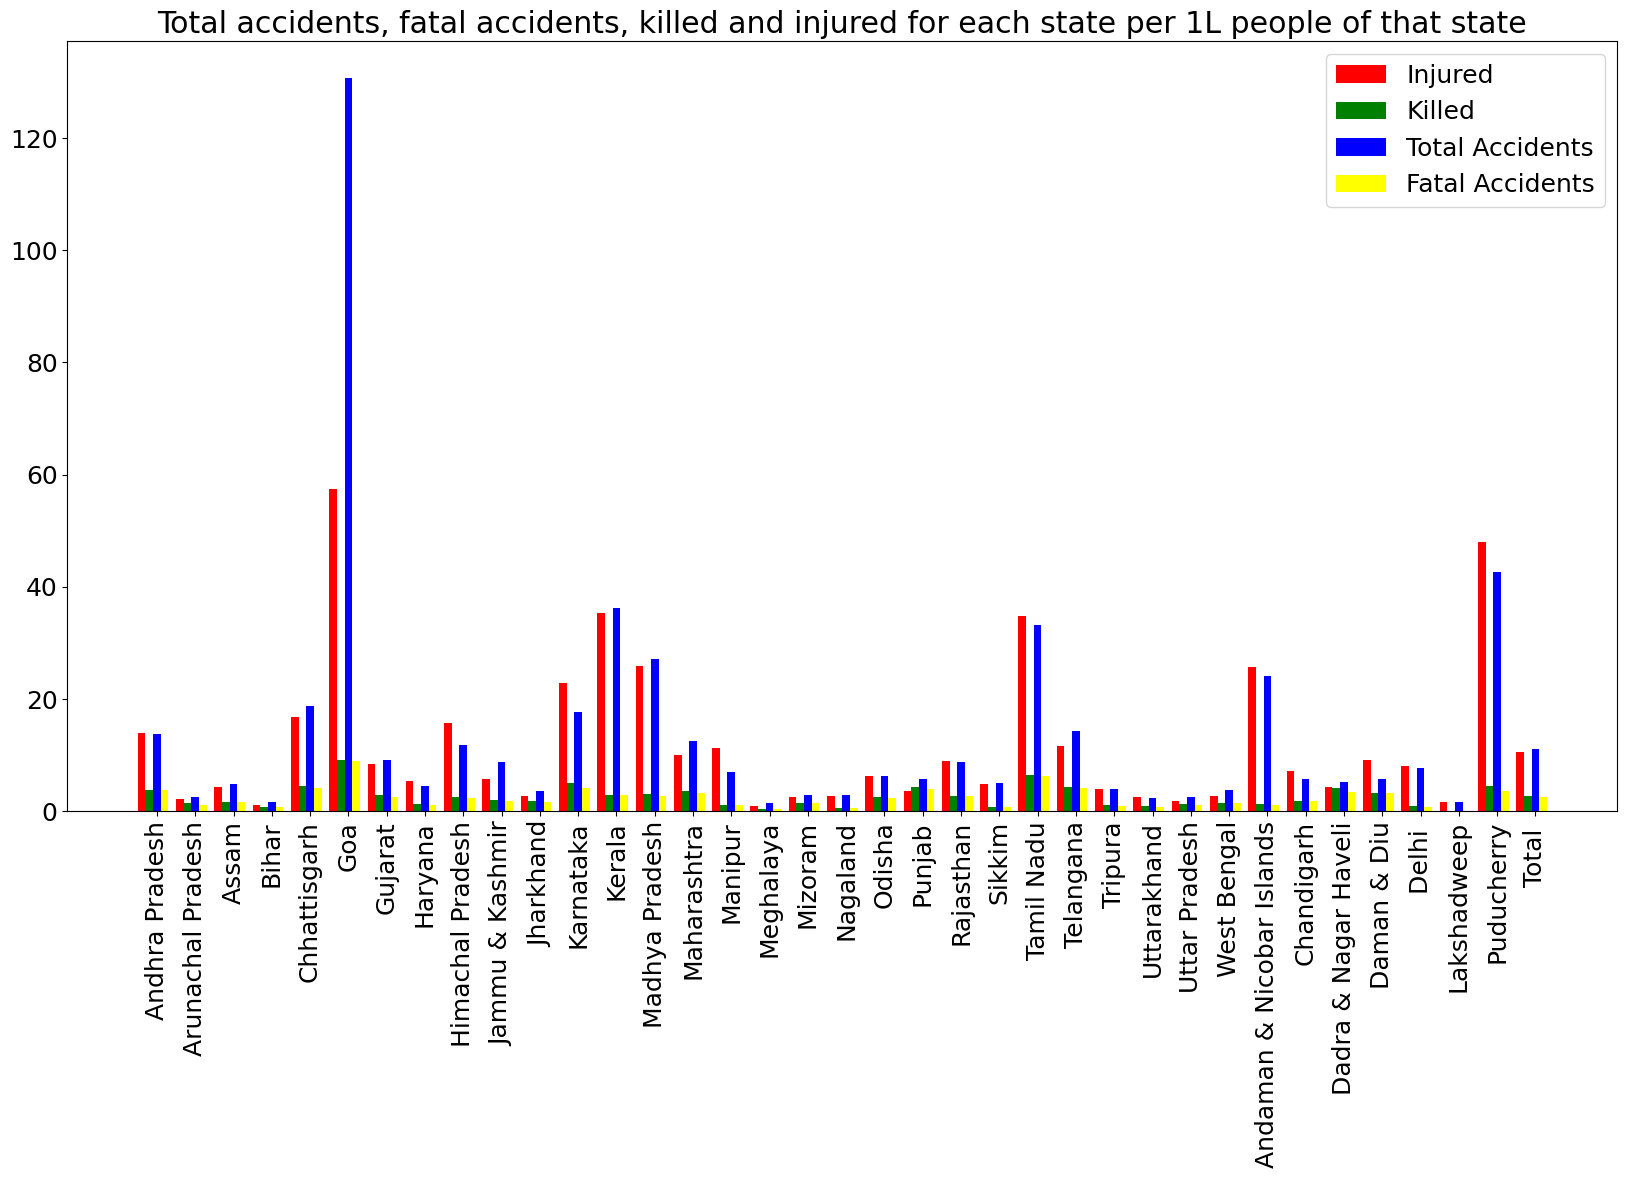

In [298]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':18})
UT=np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37])
plt.bar(UT-0.4,df6['Two-Wheelers - Number of Persons - Injured - 2014 per 1L people'],width=0.2,color='r',align='center',label='Injured')
plt.bar(UT-0.2,df6['Two-Wheelers - Number of Persons - Killed - 2014 per 1L people'],width=0.2,color='g',align='center',label='Killed')
plt.bar(UT,df6['Two-Wheelers - Number of Road Accidents - Total - 2014 per 1L people'],width=0.2,color='b',align='center',label='Total Accidents')
plt.bar(UT+0.2,df6['Two-Wheelers - Number of Road Accidents - Fatal - 2014 per 1L people'],width=0.2,color='yellow',align='center',label='Fatal Accidents')
plt.xticks(UT,df6['States/UTs'],rotation='vertical')
plt.legend(loc="best")
plt.title("Total accidents, fatal accidents, killed and injured for each state per 1L people of that state")
plt.show()

In [299]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':18})
plt.bar(UT-0.4,df6['Cars, Jeeps,Taxis - Number of Persons - Injured - 2014 per 1L people'],width=0.2,color='r',align='center',label='Injured')
plt.bar(UT-0.2,df6['Cars, Jeeps,Taxis - Number of Persons - Killed - 2014 per 1L people'],width=0.2,color='g',align='center',label='Killed')
plt.bar(UT,df6['Cars, Jeeps,Taxis - Number of Road Accidents - Total - 2014 per 1L people'],width=0.2,color='b',align='center',label='Total Accidents')
plt.bar(UT+0.2,df6['Cars, Jeeps,Taxis - Number of Road Accidents - Fatal - 2014 per 1L people'],width=0.2,color='yellow',align='center',label='Fatal Accidents')
plt.xticks(UT,df6['States/UTs'],rotation='vertical')
plt.legend(loc="best")
plt.title("Number of Persons Injured, Killed; Road Accidents Total and fatal for Cars, Jeeps and Taxis per 1L people of that state")
plt.show()

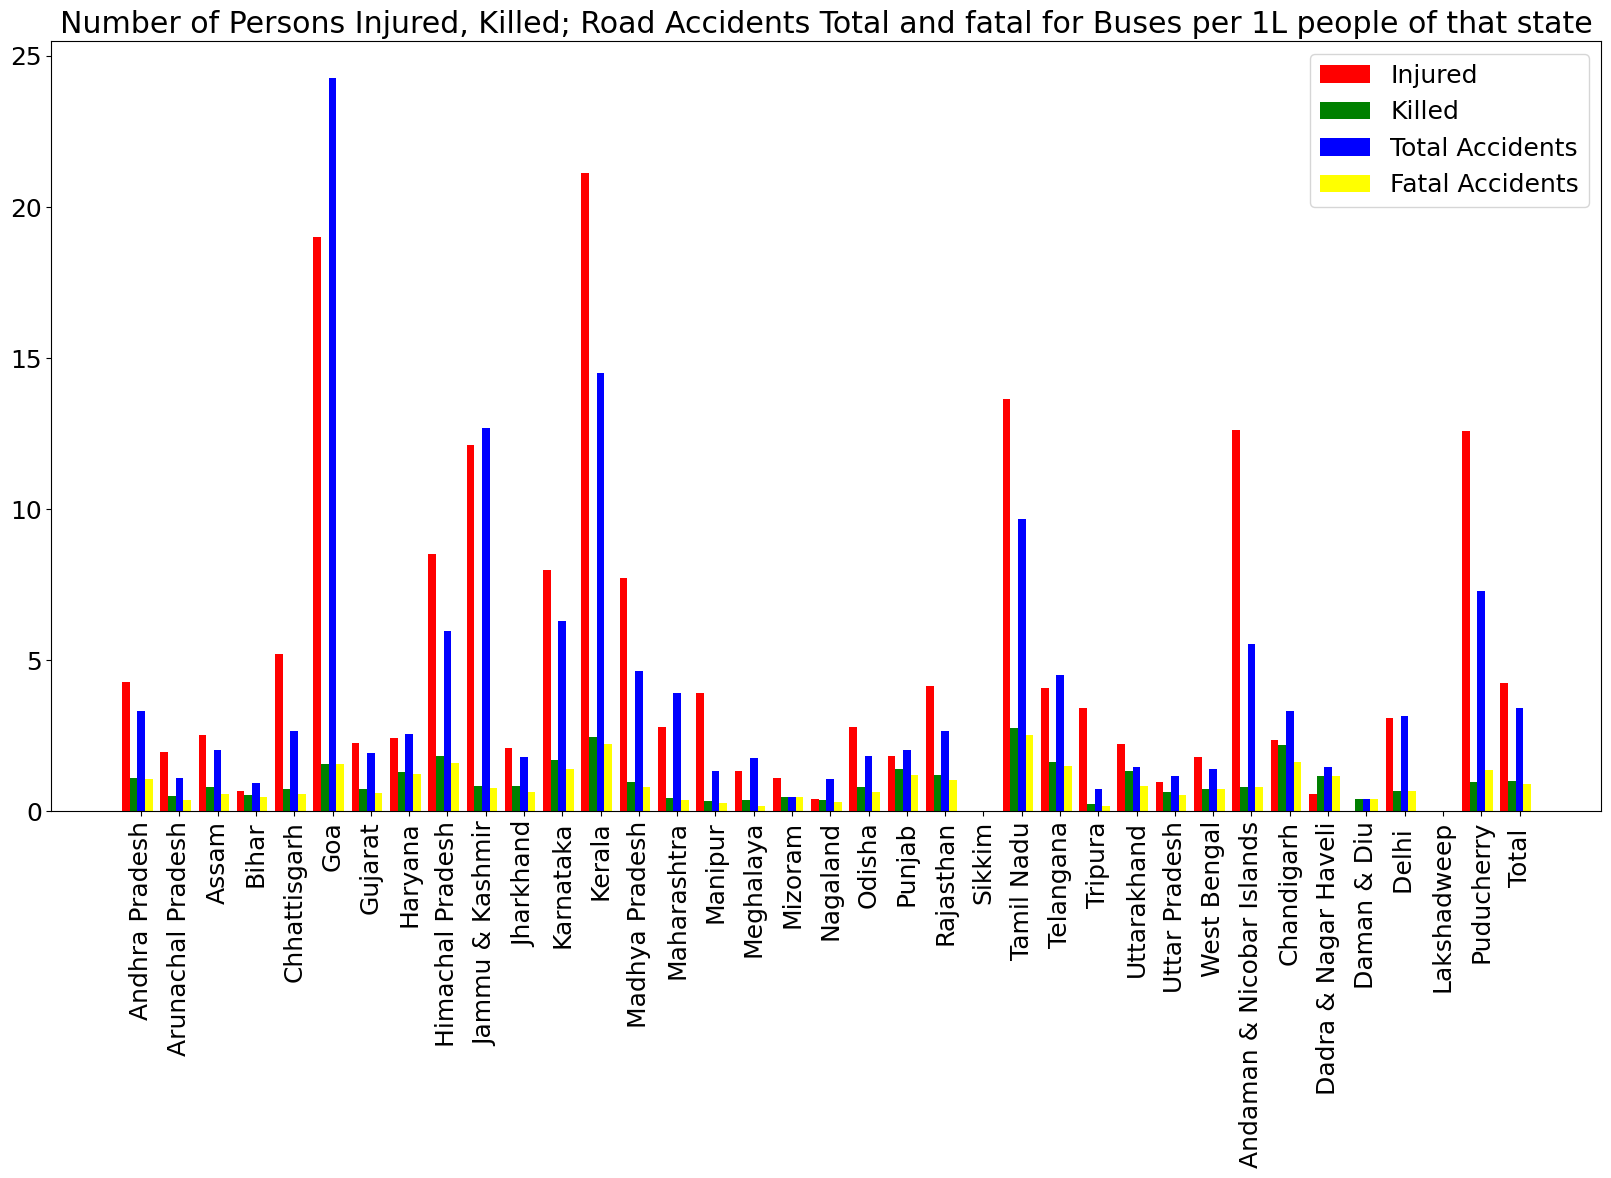

In [300]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':18})
plt.bar(UT-0.4,df6['Buses - Number of Persons - Injured - 2014 per 1L people'],width=0.2,color='r',align='center',label='Injured')
plt.bar(UT-0.2,df6['Buses - Number of Persons - Killed - 2014 per 1L people'],width=0.2,color='g',align='center',label='Killed')
plt.bar(UT,df6['Buses - Number of Road Accidents - Total - 2014 per 1L people'],width=0.2,color='b',align='center',label='Total Accidents')
plt.bar(UT+0.2,df6['Buses - Number of Road Accidents - Fatal - 2014 per 1L people'],width=0.2,color='yellow',align='center',label='Fatal Accidents')
plt.xticks(UT,df6['States/UTs'],rotation='vertical')
plt.legend(loc="best")
plt.title("Number of Persons Injured, Killed; Road Accidents Total and fatal for Buses per 1L people of that state")
plt.show()

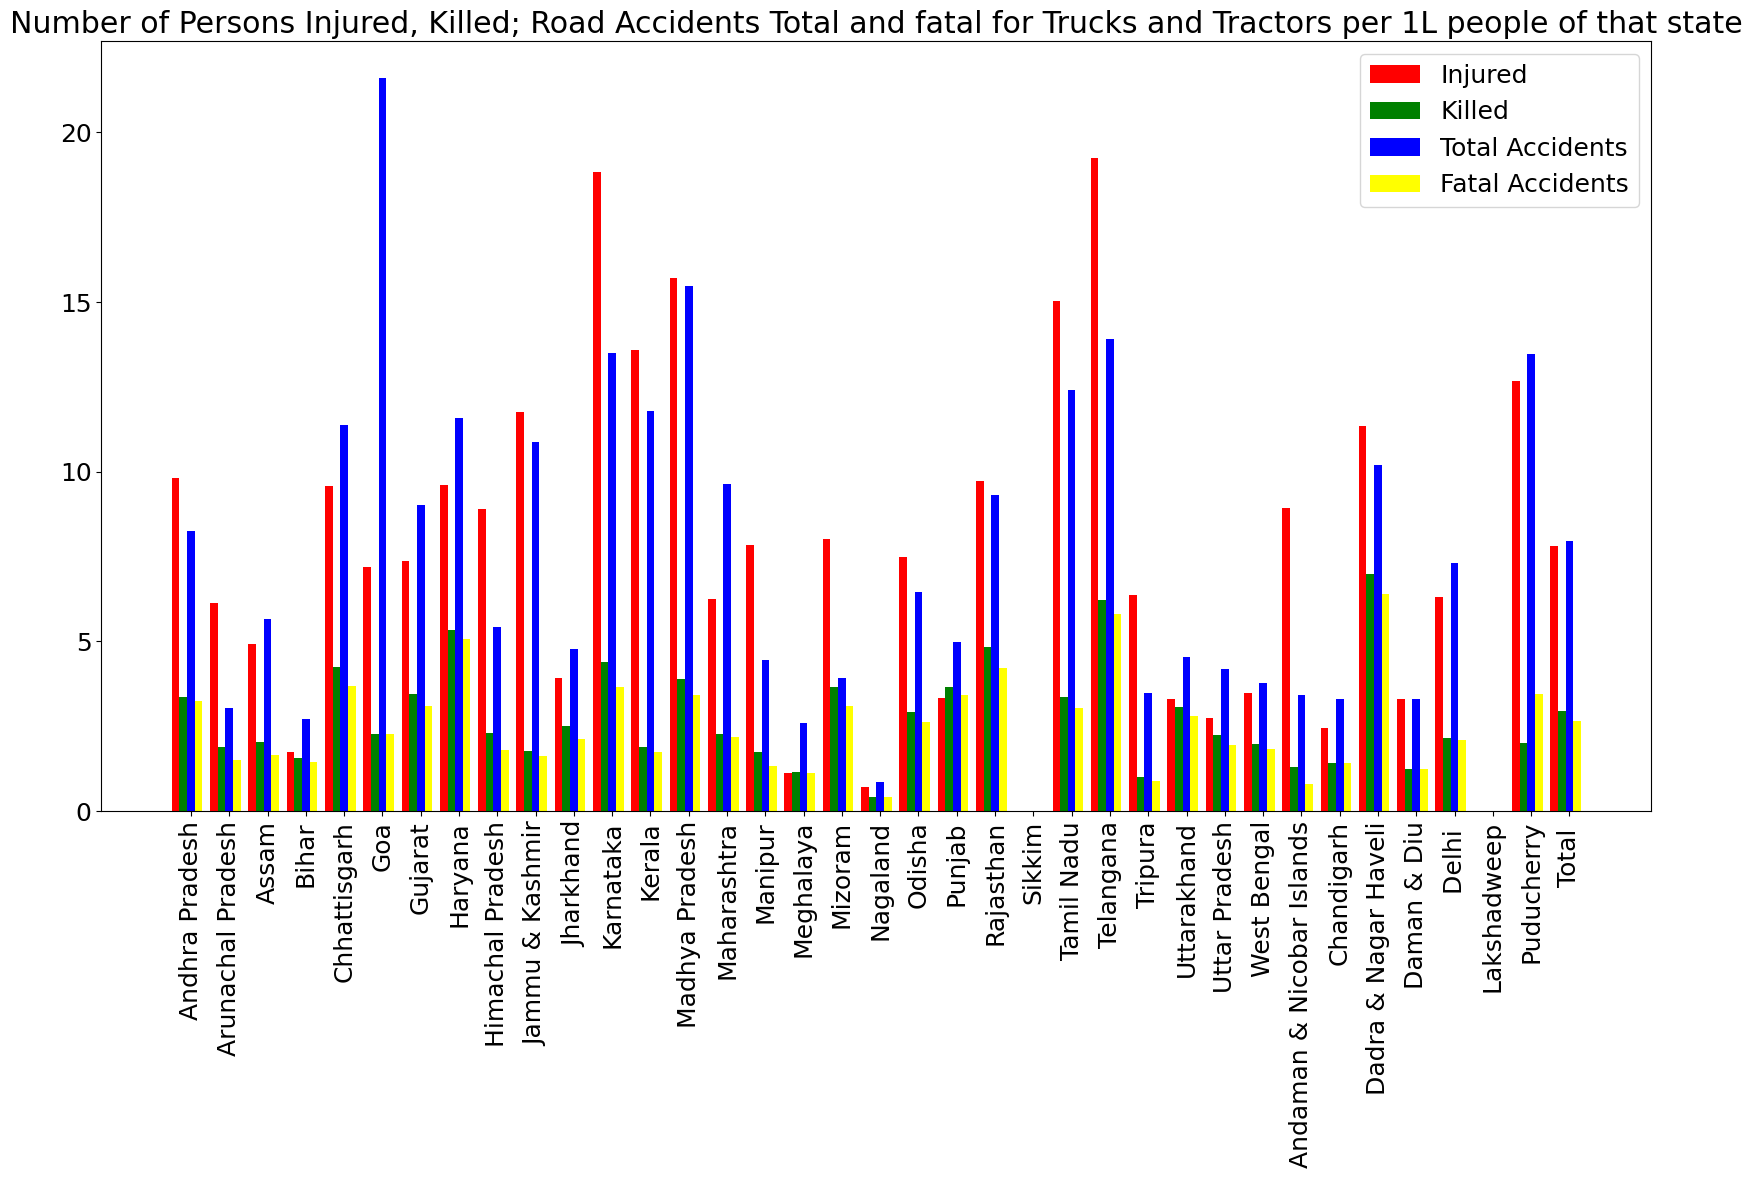

In [301]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':18})
plt.bar(UT-0.4,df6['Trucks, Tempos,MAVs,Tractors - Number of Persons - Injured - 2014 per 1L people'],width=0.2,color='r',align='center',label='Injured')
plt.bar(UT-0.2,df6['Trucks, Tempos,MAVs,Tractors - Number of Persons - Killed - 2014 per 1L people'],width=0.2,color='g',align='center',label='Killed')
plt.bar(UT,df6['Trucks, Tempos,MAVs,Tractors - Number of Road Accidents - Total - 2014 per 1L people'],width=0.2,color='b',align='center',label='Total Accidents')
plt.bar(UT+0.2,df6['Trucks, Tempos,MAVs,Tractors - Number of Road Accidents - Fatal - 2014 per 1L people'],width=0.2,color='yellow',align='center',label='Fatal Accidents')
plt.xticks(UT,df6['States/UTs'],rotation='vertical')
plt.legend(loc="best")
plt.title("Number of Persons Injured, Killed; Road Accidents Total and fatal for Trucks and Tractors per 1L people of that state")
plt.show()

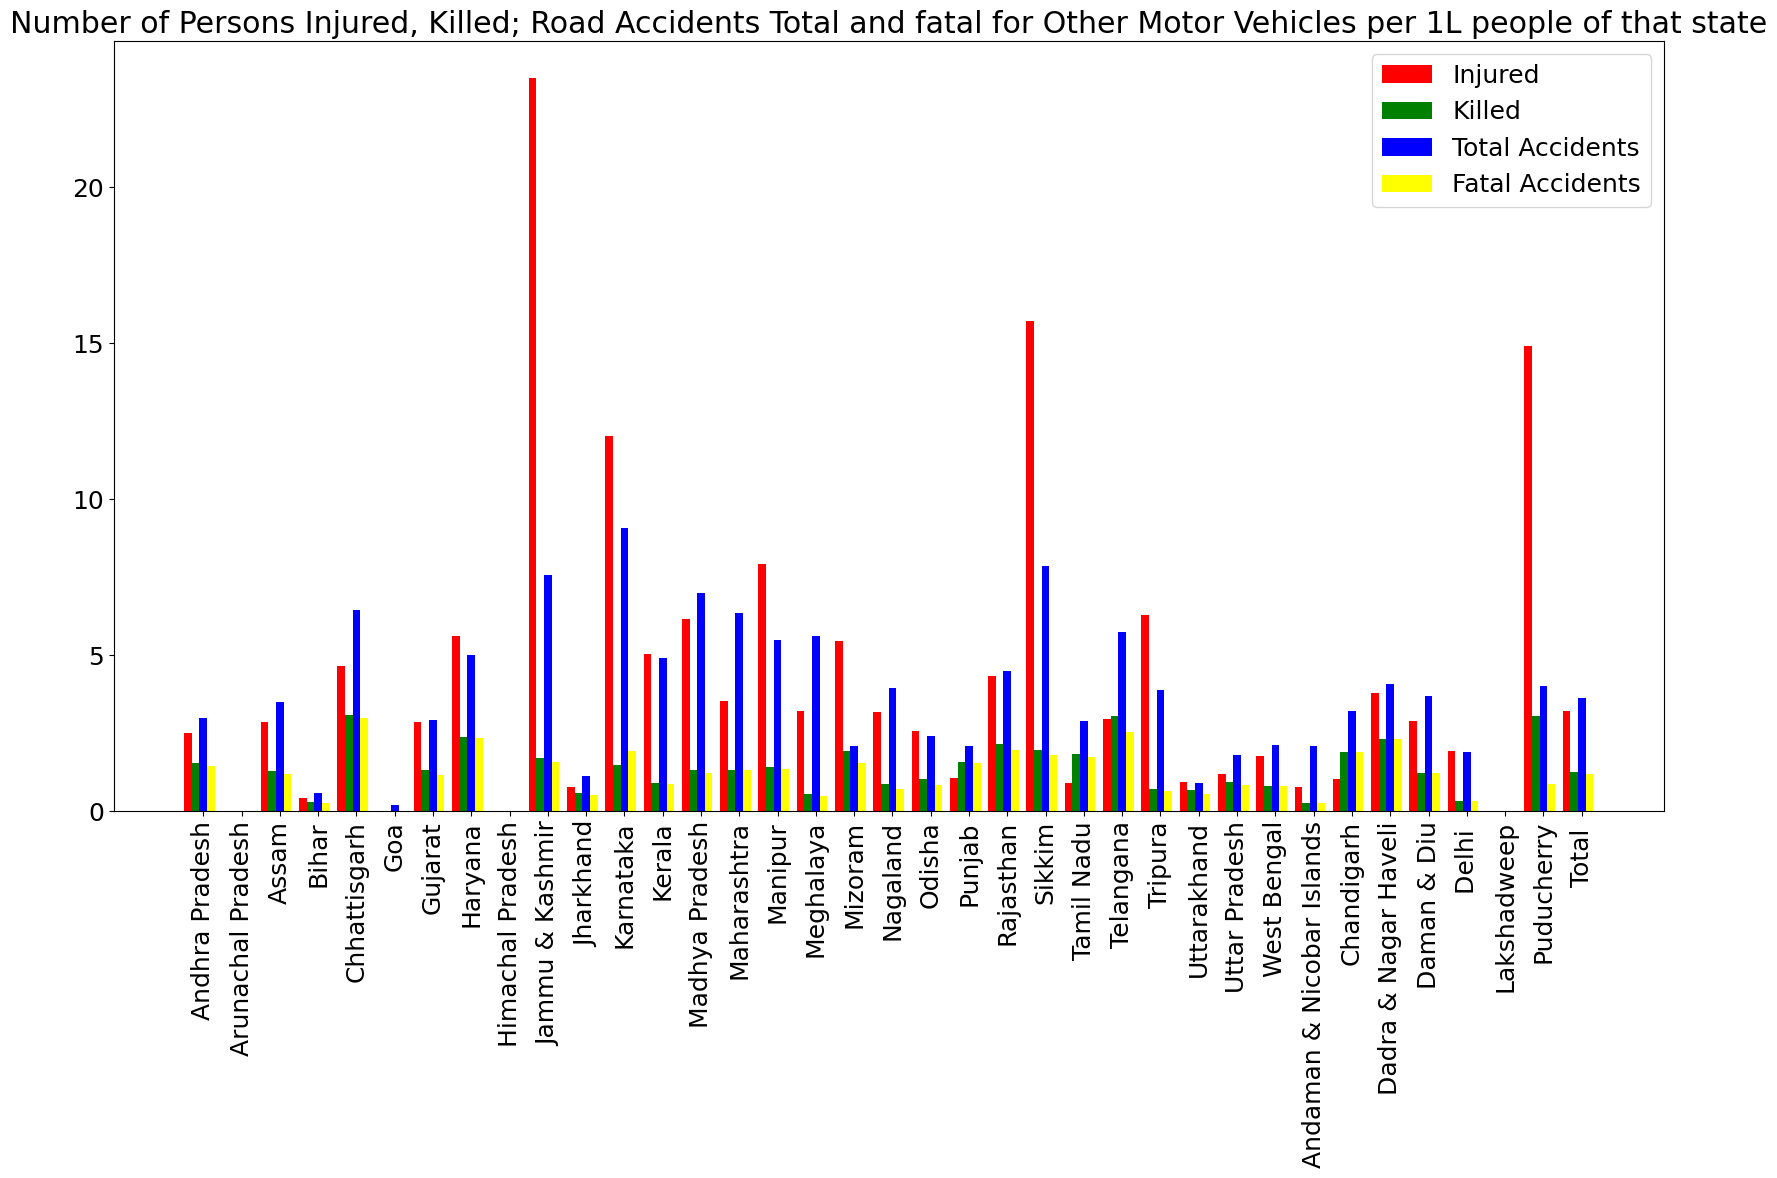

In [302]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':18})

plt.bar(UT-0.4,df6['Other Motor Vehicles - Number of Persons - Injured - 2014 per 1L people'],width=0.2,color='r',align='center',label='Injured')
plt.bar(UT-0.2,df6['Other Motor Vehicles - Number of Persons - Killed - 2014 per 1L people'],width=0.2,color='g',align='center',label='Killed')
plt.bar(UT,df6['Other Motor Vehicles - Number of Road Accidents - Total - 2014 per 1L people'],width=0.2,color='b',align='center',label='Total Accidents')
plt.bar(UT+0.2,df6['Other Motor Vehicles - Number of Road Accidents - Fatal - 2014 per 1L people'],width=0.2,color='yellow',align='center',label='Fatal Accidents')

plt.xticks(UT,df6['States/UTs'],rotation='vertical')
plt.legend(loc="best")
plt.title("Number of Persons Injured, Killed; Road Accidents Total and fatal for Other Motor Vehicles per 1L people of that state")
plt.show()

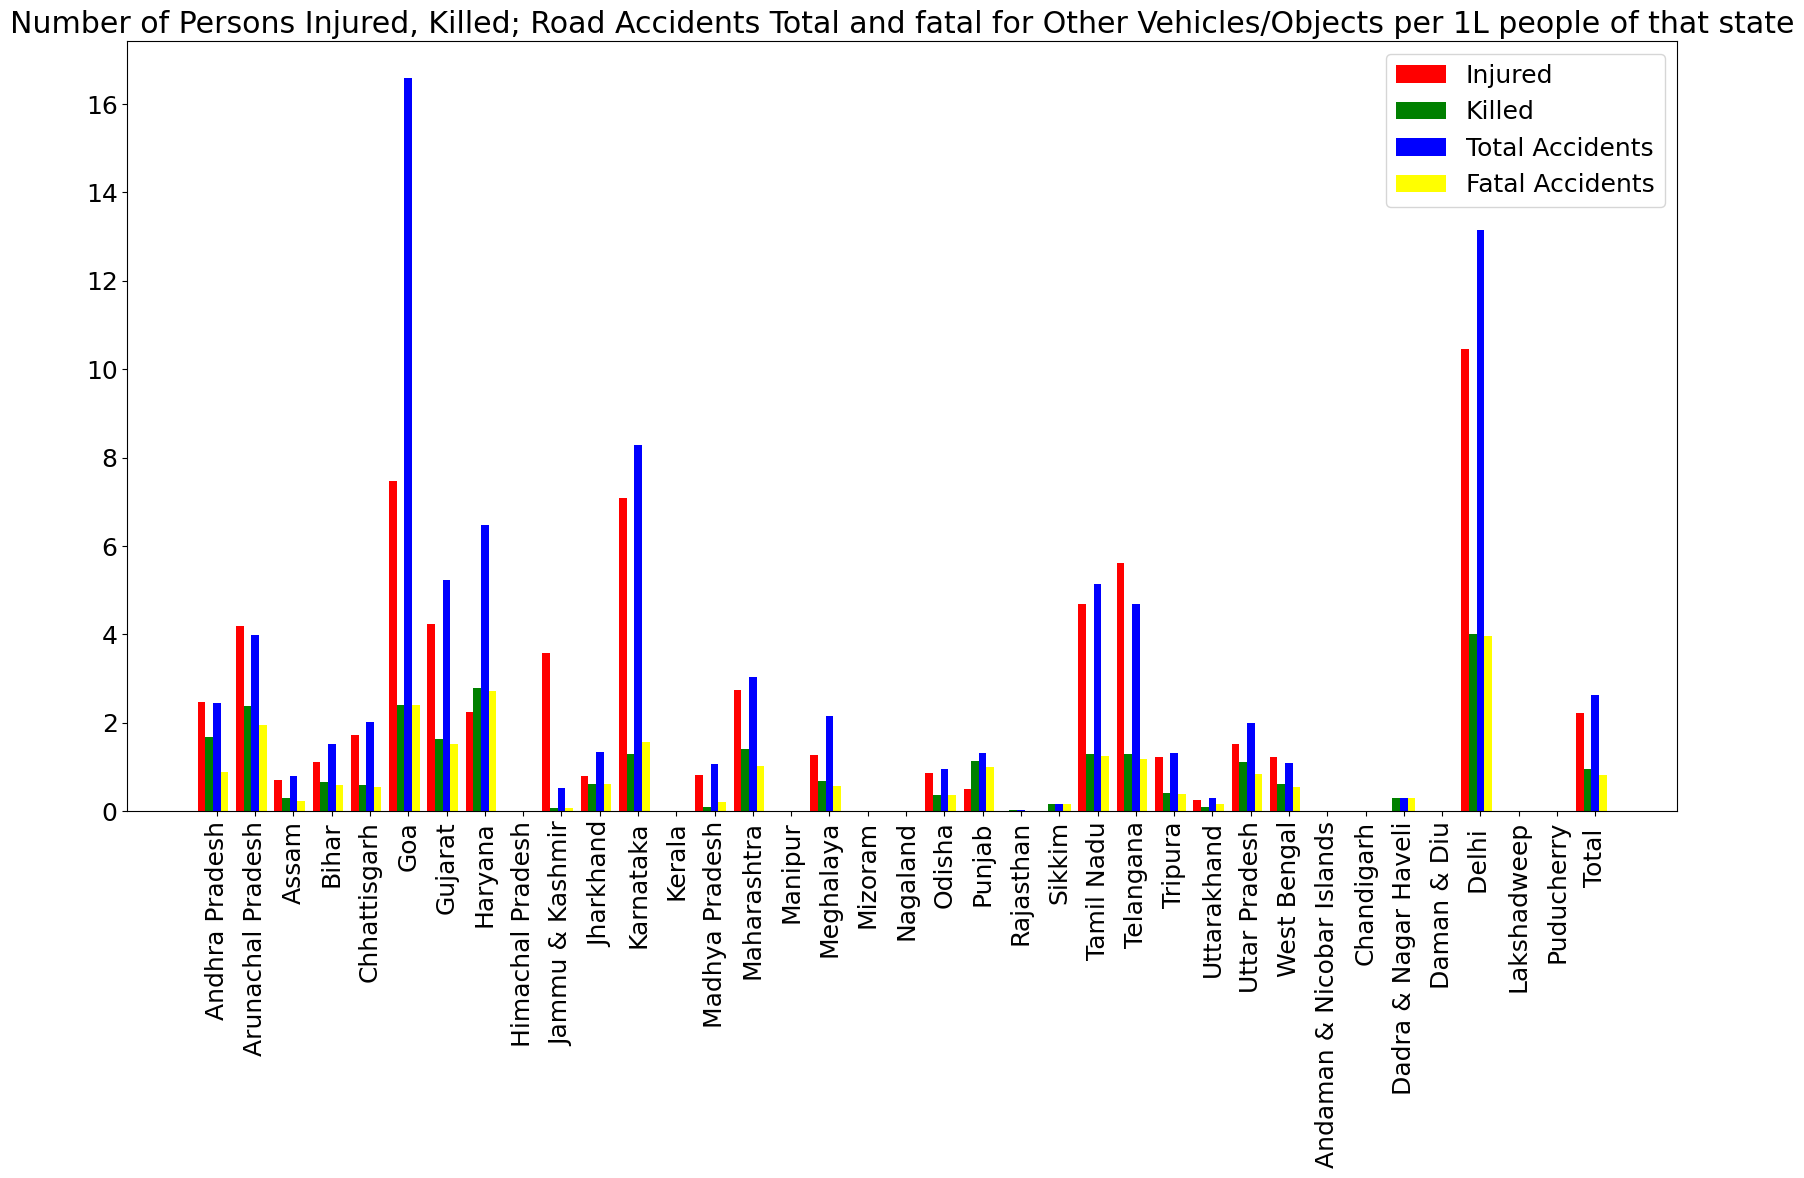

In [303]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':18})

plt.bar(UT-0.4,df6['Other Vehicles/Objects - Number of Persons - Injured - 2014 per 1L people'],width=0.2,color='r',align='center',label='Injured')
plt.bar(UT-0.2,df6['Other Vehicles/Objects - Number of Persons - Killed - 2014 per 1L people'],width=0.2,color='g',align='center',label='Killed')
plt.bar(UT,df6['Other Vehicles/Objects - Number of Road Accidents - Total - 2014 per 1L people'],width=0.2,color='b',align='center',label='Total Accidents')
plt.bar(UT+0.2,df6['Other Vehicles/Objects - Number of Road Accidents - Fatal - 2014 per 1L people'],width=0.2,color='yellow',align='center',label='Fatal Accidents')

plt.xticks(UT,df6['States/UTs'],rotation='vertical')
plt.legend(loc="best")
plt.title("Number of Persons Injured, Killed; Road Accidents Total and fatal for Other Vehicles/Objects per 1L people of that state")
plt.show()

In [305]:
df6['Sum Total Road Accidents - 2014 per 1L people']=df6['Two-Wheelers - Number of Road Accidents - Total - 2014 per 1L people']+df6['Auto-Rickshaws - Number of Road Accidents - Total - 2014 per 1L people']+df6['Cars, Jeeps,Taxis - Number of Road Accidents - Total - 2014 per 1L people']+\
    df6['Buses - Number of Road Accidents - Total - 2014 per 1L people']+df6['Trucks, Tempos,MAVs,Tractors - Number of Road Accidents - Total - 2014 per 1L people']+df6['Other Motor Vehicles - Number of Road Accidents - Total - 2014 per 1L people']+\
    df6['Other Vehicles/Objects - Number of Road Accidents - Total - 2014 per 1L people']

df6['Sum Total Number of Persons Killed - 2014 per 1L people']=df6['Two-Wheelers - Number of Persons - Killed - 2014 per 1L people']+df6['Auto-Rickshaws - Number of Persons - Killed - 2014 per 1L people']+df6['Cars, Jeeps,Taxis - Number of Persons - Killed - 2014 per 1L people']+\
    df6['Buses - Number of Persons - Killed - 2014 per 1L people']+df6['Trucks, Tempos,MAVs,Tractors - Number of Persons - Killed - 2014 per 1L people']+df6['Other Motor Vehicles - Number of Persons - Killed - 2014 per 1L people']+\
    df6['Other Vehicles/Objects - Number of Persons - Killed - 2014 per 1L people']

df6['Sum Total Number of Persons Injured - 2014 per 1L people']=df6['Two-Wheelers - Number of Persons - Injured - 2014 per 1L people']+df6['Auto-Rickshaws - Number of Persons - Injured - 2014 per 1L people']+df6['Cars, Jeeps,Taxis - Number of Persons - Injured - 2014 per 1L people']+\
    df6['Buses - Number of Persons - Injured - 2014 per 1L people']+df6['Trucks, Tempos,MAVs,Tractors - Number of Persons - Injured - 2014 per 1L people']+df6['Other Motor Vehicles - Number of Persons - Injured - 2014 per 1L people']+\
    df6['Other Vehicles/Objects - Number of Persons - Injured - 2014 per 1L people']

df6['Sum Total Fatal Road Accidents - 2014 per 1L people']=df6['Two-Wheelers - Number of Road Accidents - Fatal - 2014 per 1L people']+df6['Auto-Rickshaws - Number of Road Accidents - Fatal - 2014 per 1L people']+df6['Cars, Jeeps,Taxis - Number of Road Accidents - Fatal - 2014 per 1L people']+\
    df6['Buses - Number of Road Accidents - Fatal - 2014 per 1L people']+df6['Trucks, Tempos,MAVs,Tractors - Number of Road Accidents - Fatal - 2014 per 1L people']+df6['Other Motor Vehicles - Number of Road Accidents - Fatal - 2014 per 1L people']+\
    df6['Other Vehicles/Objects - Number of Road Accidents - Fatal - 2014 per 1L people']


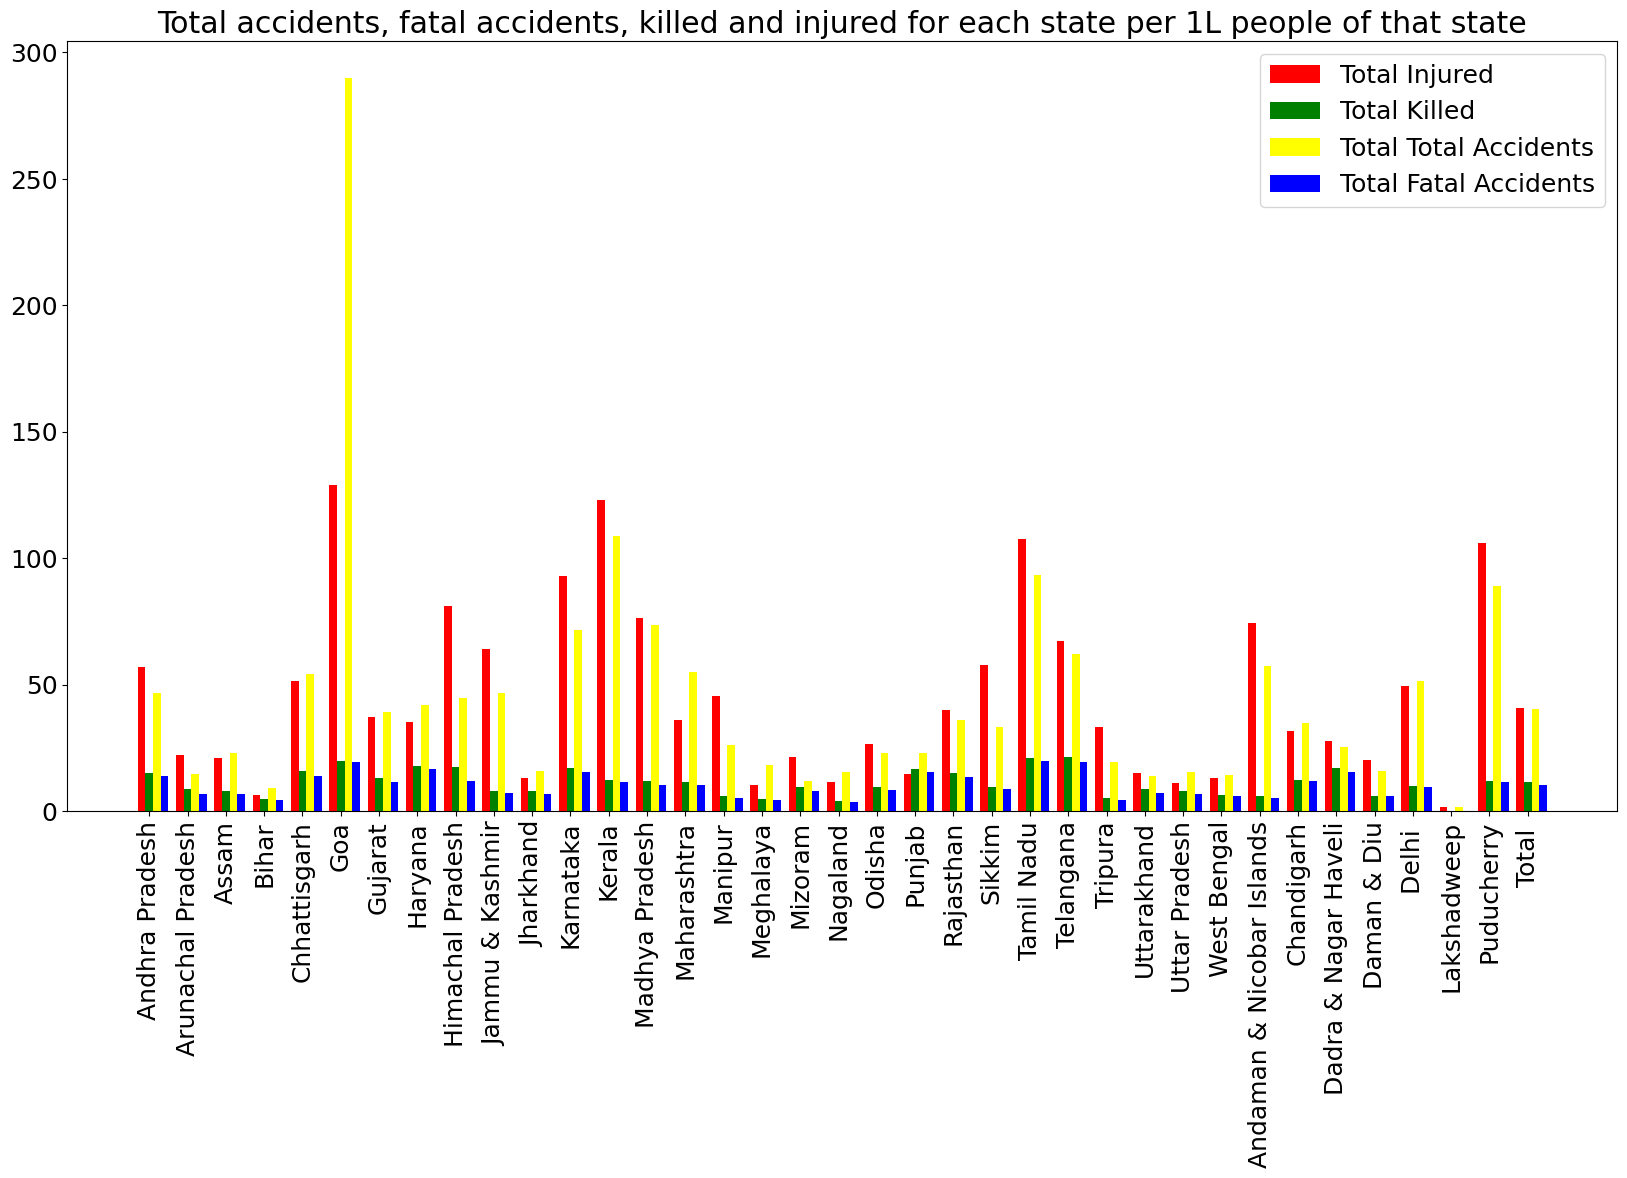

In [306]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':18})

plt.bar(UT-0.2,df6['Sum Total Number of Persons Injured - 2014 per 1L people'],width=0.2,color='r',align='center',label='Total Injured')
plt.bar(UT,df6['Sum Total Number of Persons Killed - 2014 per 1L people'],width=0.2,color='g',align='center',label='Total Killed')
plt.bar(UT+0.2,df6['Sum Total Road Accidents - 2014 per 1L people'],width=0.2,color='yellow',align='center',label='Total Total Accidents')
plt.bar(UT+0.4,df6['Sum Total Fatal Road Accidents - 2014 per 1L people'],width=0.2,color='b',align='center',label='Total Fatal Accidents')

plt.xticks(UT,df6['States/UTs'],rotation='vertical')
plt.legend(loc="best")
plt.title("Total accidents, fatal accidents, killed and injured for each state per 1L people of that state")
plt.show()


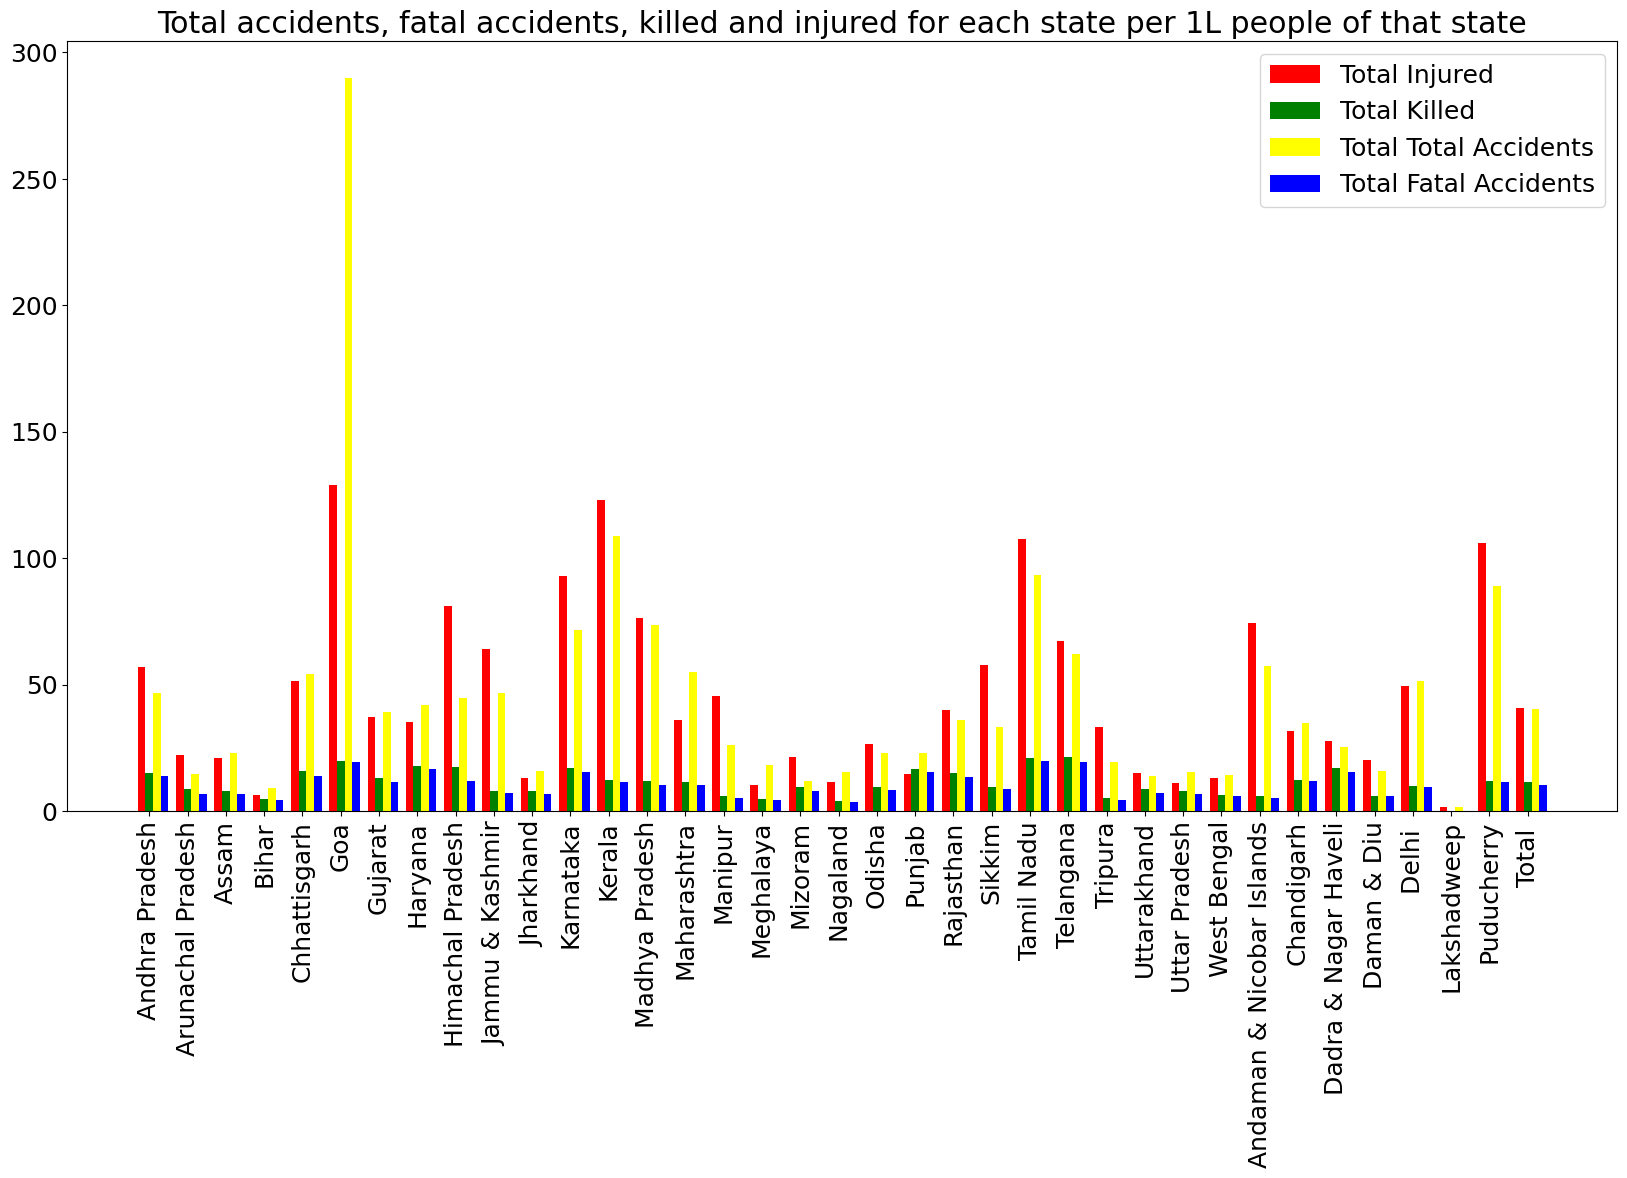

In [307]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':18})

plt.bar(UT-0.2,df6['Sum Total Number of Persons Injured - 2014 per 1L people'],width=0.2,color='r',align='center',label='Total Injured')
plt.bar(UT,df6['Sum Total Number of Persons Killed - 2014 per 1L people'],width=0.2,color='g',align='center',label='Total Killed')
plt.bar(UT+0.2,df6['Sum Total Road Accidents - 2014 per 1L people'],width=0.2,color='yellow',align='center',label='Total Total Accidents')
plt.bar(UT+0.4,df6['Sum Total Fatal Road Accidents - 2014 per 1L people'],width=0.2,color='b',align='center',label='Total Fatal Accidents')

plt.xticks(UT,df6['States/UTs'],rotation='vertical')
plt.legend(loc="best")
plt.title("Total accidents, fatal accidents, killed and injured for each state per 1L people of that state")
plt.show()



### This dataset tells how many accidents happen according to the time of occurence in different states.


In [311]:
df7 = pd.read_excel('timeOfOccurence.xls')
df7.head()


WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


S. No.         States/Uts  06-900hrs - Day - 2014  09-1200hrs - Day - 2014  \
0      1     Andhra Pradesh                    2548                     3448   
1      2  Arunachal Pradesh                      43                       30   
2      3              Assam                    1034                     1633   
3      4              Bihar                    1433                     1661   
4      5       Chhattisgarh                    1677                     2316   

   12-1500hrs - Day - 2014  15-1800hrs - Day - 2014  \
0                     3491                     3606   
1                       28                       20   
2                     1092                     1456   
3                     1484                     1485   
4                     2064                     2550   

   18-2100hrs - Night - 2014  21-2400hrs - Night - 2014  \
0                       4058                       2989   
1                         16                         23   
2                        979                        416   
3                       1092                        823   
4                       2256                       1394   

   00-300hrs - Night - 2014  03-600hrs - Night - 2014  Total Accidents - 2014  \
0                      2031                      2269                   24440   
1                        19                        26                     205   
2                       308                       226                    7144   
3                       677                       901                    9556   
4                       755                       809                   13821   

   06-900hrs - (Day) - 2016  09-1200hrs - (Day) - 2016  \
0                      2707                       3516   
1                        50                         37   
2                       940                       1354   
3                      1169                       1431   
4                      1592                       2269   

   12-1500hrs - (Day) - 2016  15-1800hrs - (Day) - 2016  \
0                       3617                       4348   
1                         33                         38   
2                       1280                       1219   
3                       1268                       1244   
4                       2221                       2441   

   18-2100hrs - (Night) - 2016  21-2400hrs - (Night) - 2016  \
0                         4742                         2774   
1                           25                           20   
2                         1114                          683   
3                         1073                          689   
4                         2657                         1242   

   00-300hrs - (Night) - 2016  03-600hrs - (Night) - 2016  \
0                        1461                        1723   
1                          19                          27   
2                         378                         467   
3                         466                         882   
4                         619                         539   

   Total Accidents - 2016  
0                   24888  
1                     249  
2                    7435  
3                    8222  
4                   13580

In [319]:
dayTime2014 = df7['03-600hrs - Night - 2014']+ df7['06-900hrs - Day - 2014'] + df7['09-1200hrs - Day - 2014']+df7['12-1500hrs - Day - 2014']+df7['15-1800hrs - Day - 2014']
nightTime2014 = df7['00-300hrs - Night - 2014'] + df7['18-2100hrs - Night - 2014']+df7['21-2400hrs - Night - 2014']

In [322]:
dayTime2016 = df7['03-600hrs - (Night) - 2016']+ df7['06-900hrs - (Day) - 2016'] + df7['09-1200hrs - (Day) - 2016']+df7['12-1500hrs - (Day) - 2016']+df7['15-1800hrs - (Day) - 2016']
nightTime2016 = df7['00-300hrs - (Night) - 2016'] + df7['18-2100hrs - (Night) - 2016']+df7['21-2400hrs - (Night) - 2016']

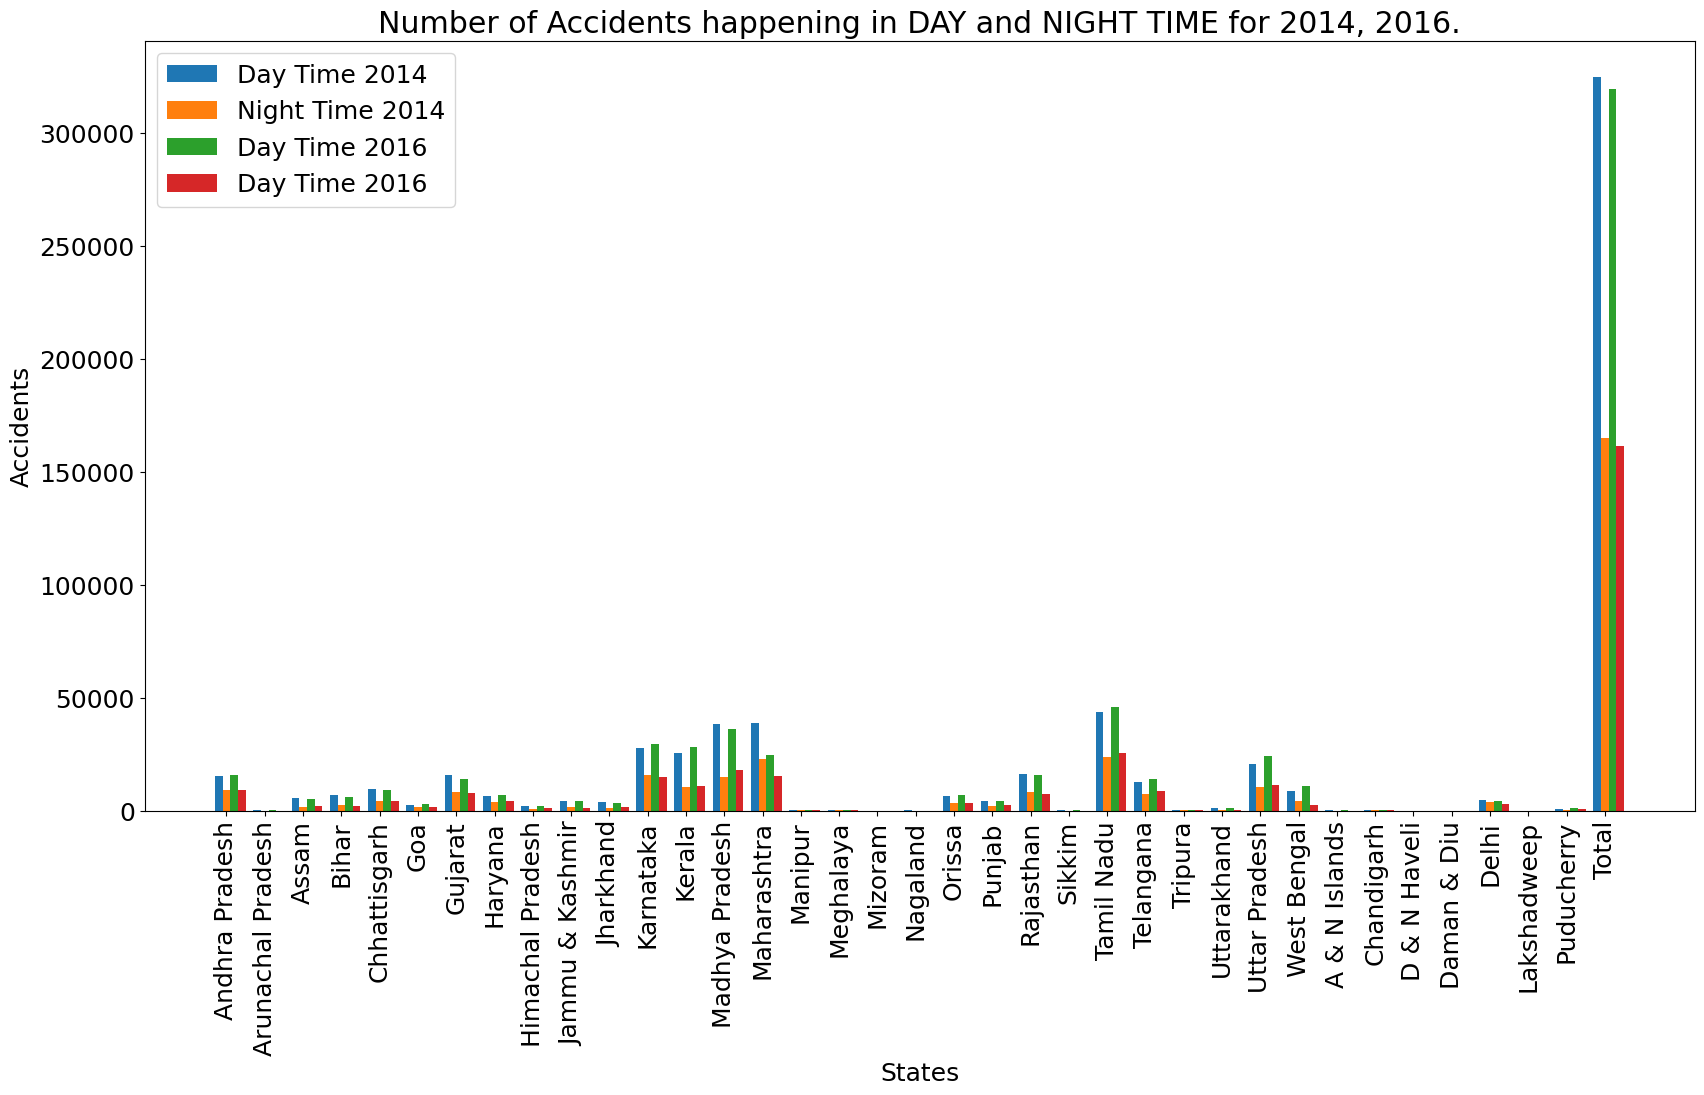

In [323]:
plt.rcParams.update({'font.size'  : 18})
plt.figure(figsize = (20,10))
UT = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37])
plt.bar(UT-0.2, dayTime2014, width = 0.2,label = 'Day Time 2014')
plt.bar(UT, nightTime2014, width = 0.2, label = 'Night Time 2014')
plt.bar(UT+0.2, dayTime2016, width = 0.2, label = 'Day Time 2016')
plt.bar(UT+0.4, nightTime2016, width = 0.2, label = 'Day Time 2016')
plt.xlabel("States")
plt.ylabel("Accidents")
plt.legend(loc = 'best')
plt.title("Number of Accidents happening in DAY and NIGHT TIME for 2014, 2016.")
plt.xticks(UT, df7['States/Uts'], rotation=90)
plt.show()